Starting grid plot creation...
Found 4 result files
Loaded 804 individual results

Processed 804 data points with 4 learning rates, 2 hidden sizes, 5 dimensions, and 3 k-ranges
Creating grid for LR=5e-05, H=256
Dimensions: [np.int64(4), np.int64(8), np.int64(10), np.int64(20), np.int64(25)]
k-ranges: ['10-15', '2-5', '5-10']
Saved plot to ./result_plots_SH_grid/grid_H256_LR5e-05.png


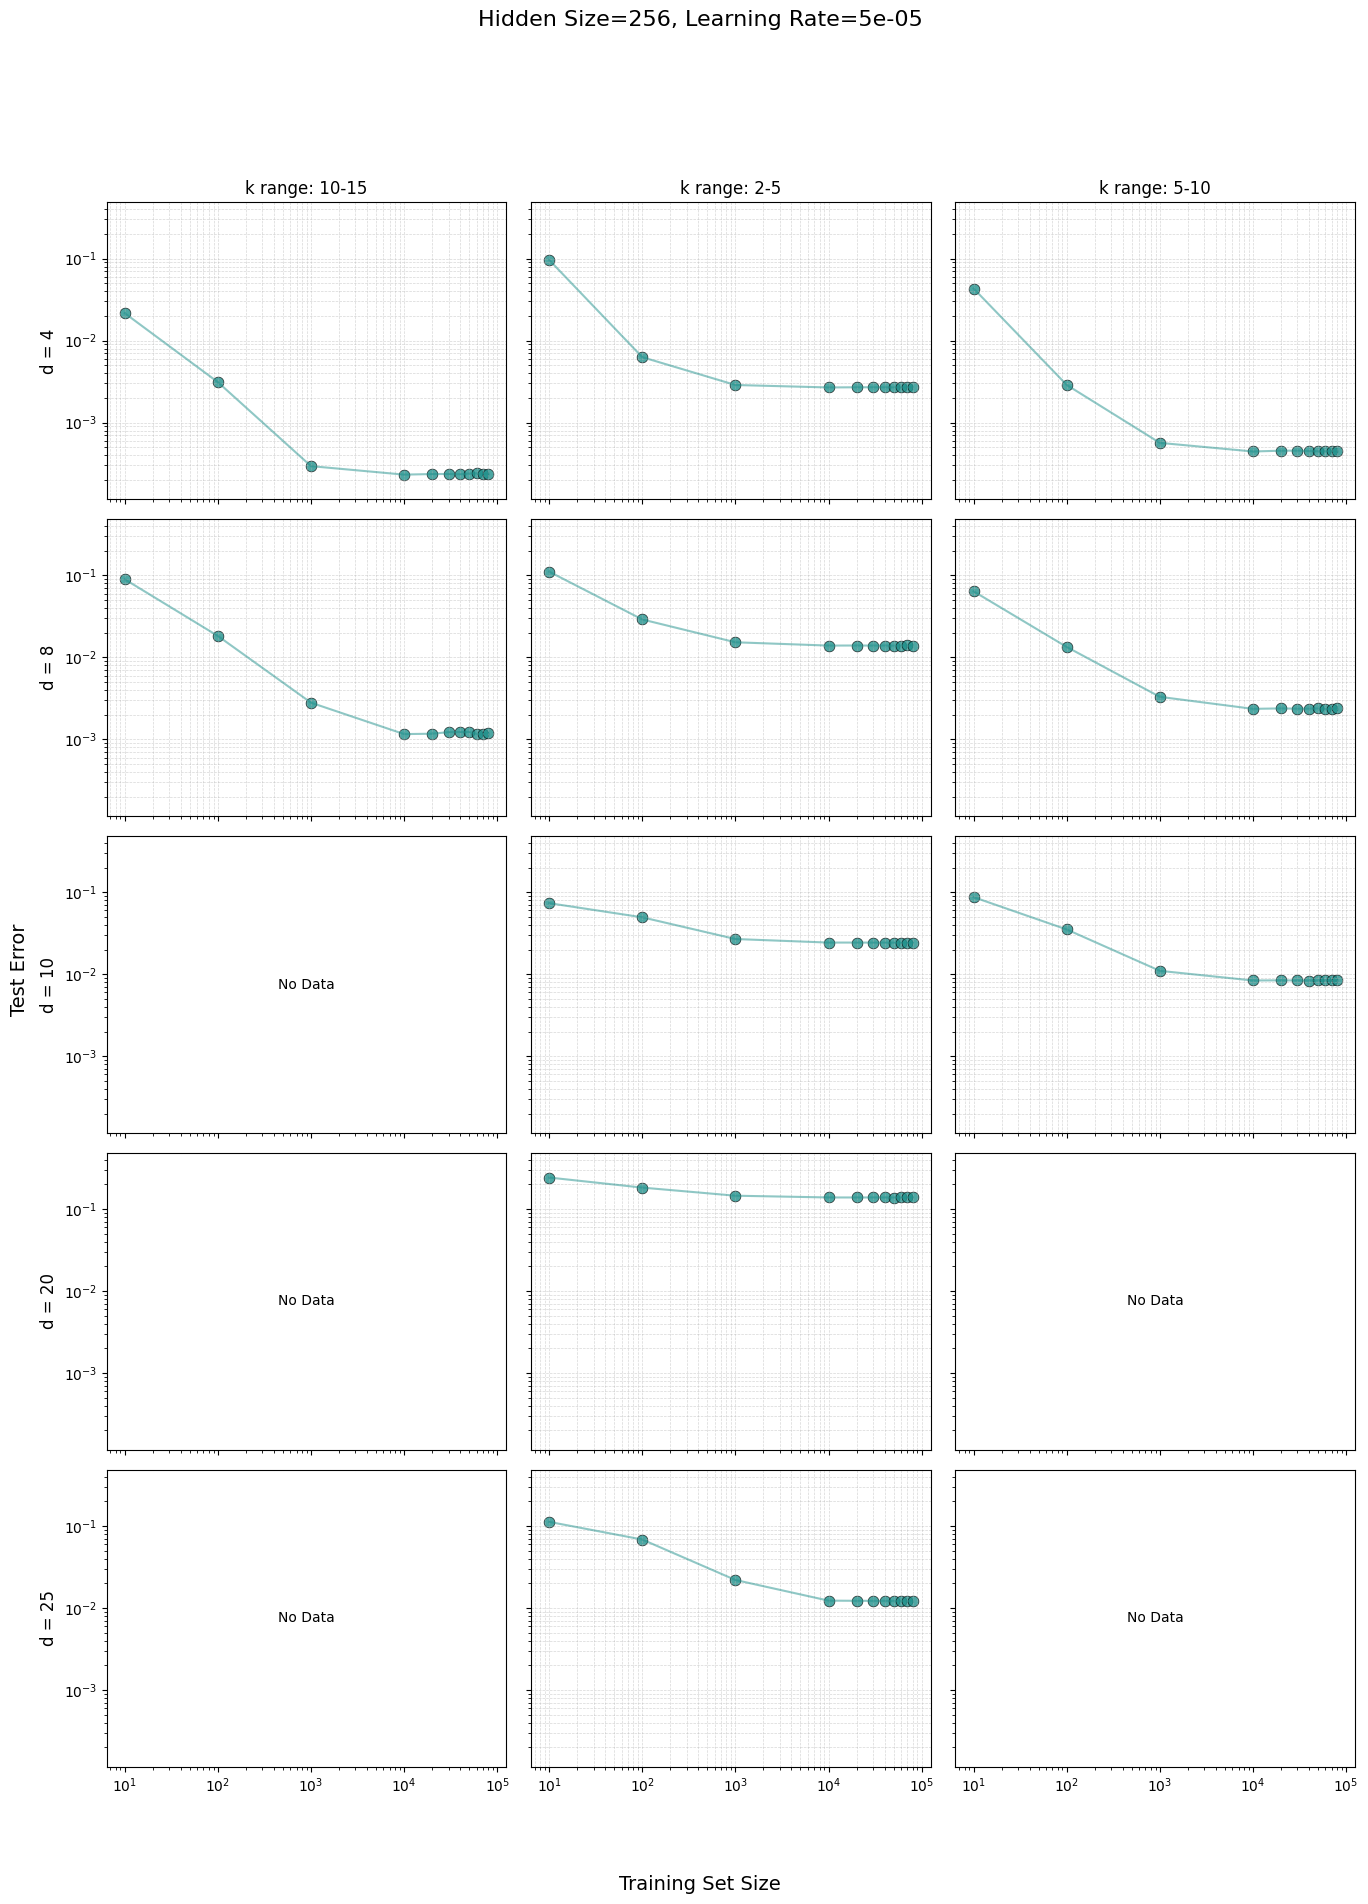

Creating grid for LR=5e-05, H=512
Dimensions: [np.int64(4), np.int64(8), np.int64(10), np.int64(20), np.int64(25)]
k-ranges: ['10-15', '2-5', '5-10']
Saved plot to ./result_plots_SH_grid/grid_H512_LR5e-05.png


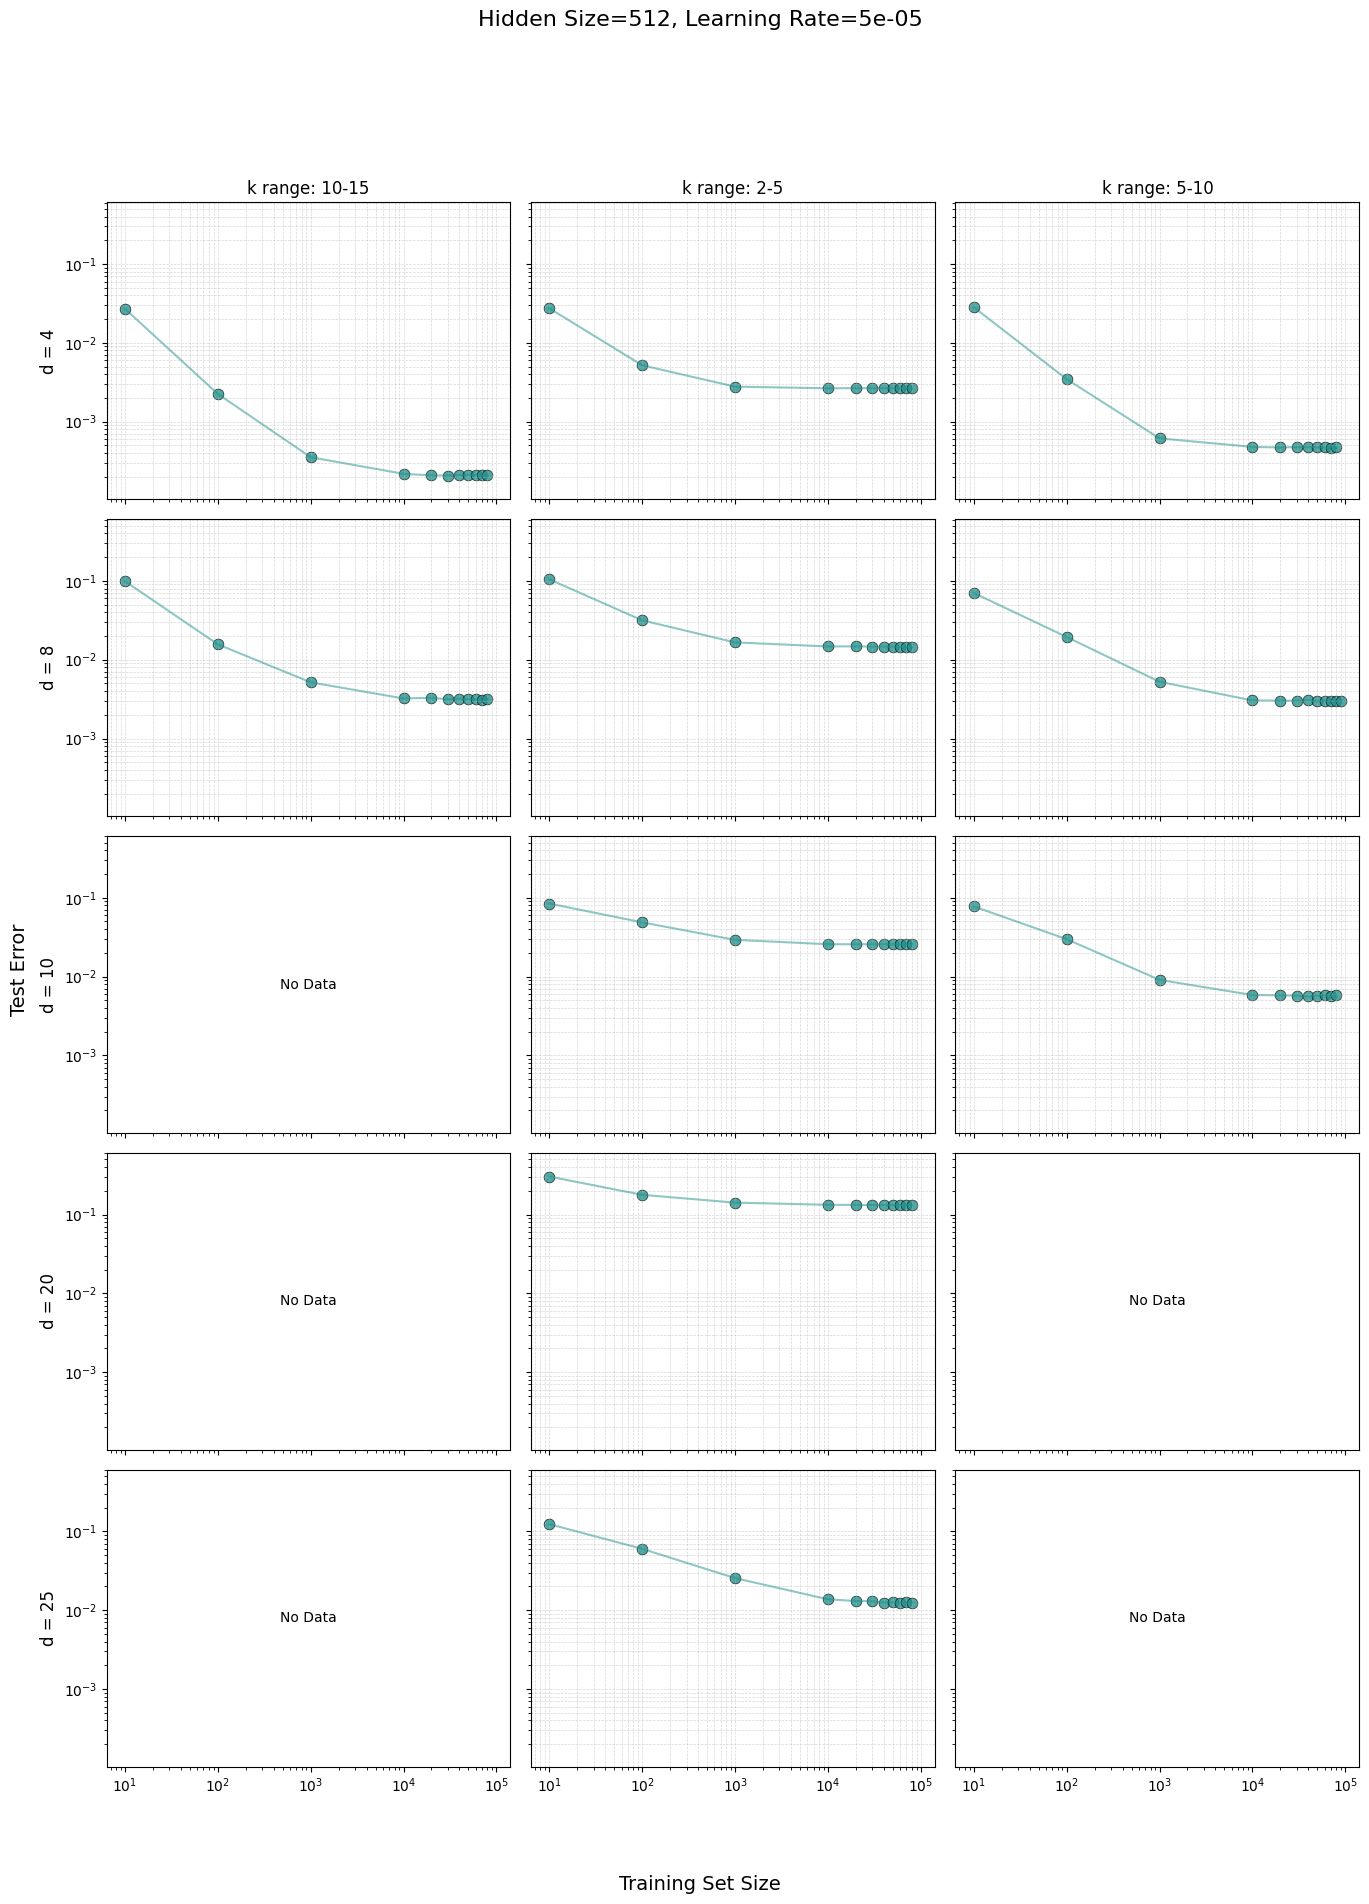

Creating grid for LR=0.0001, H=256
Dimensions: [np.int64(4), np.int64(8), np.int64(10), np.int64(20), np.int64(25)]
k-ranges: ['10-15', '2-5', '5-10']
Saved plot to ./result_plots_SH_grid/grid_H256_LR0p0001.png


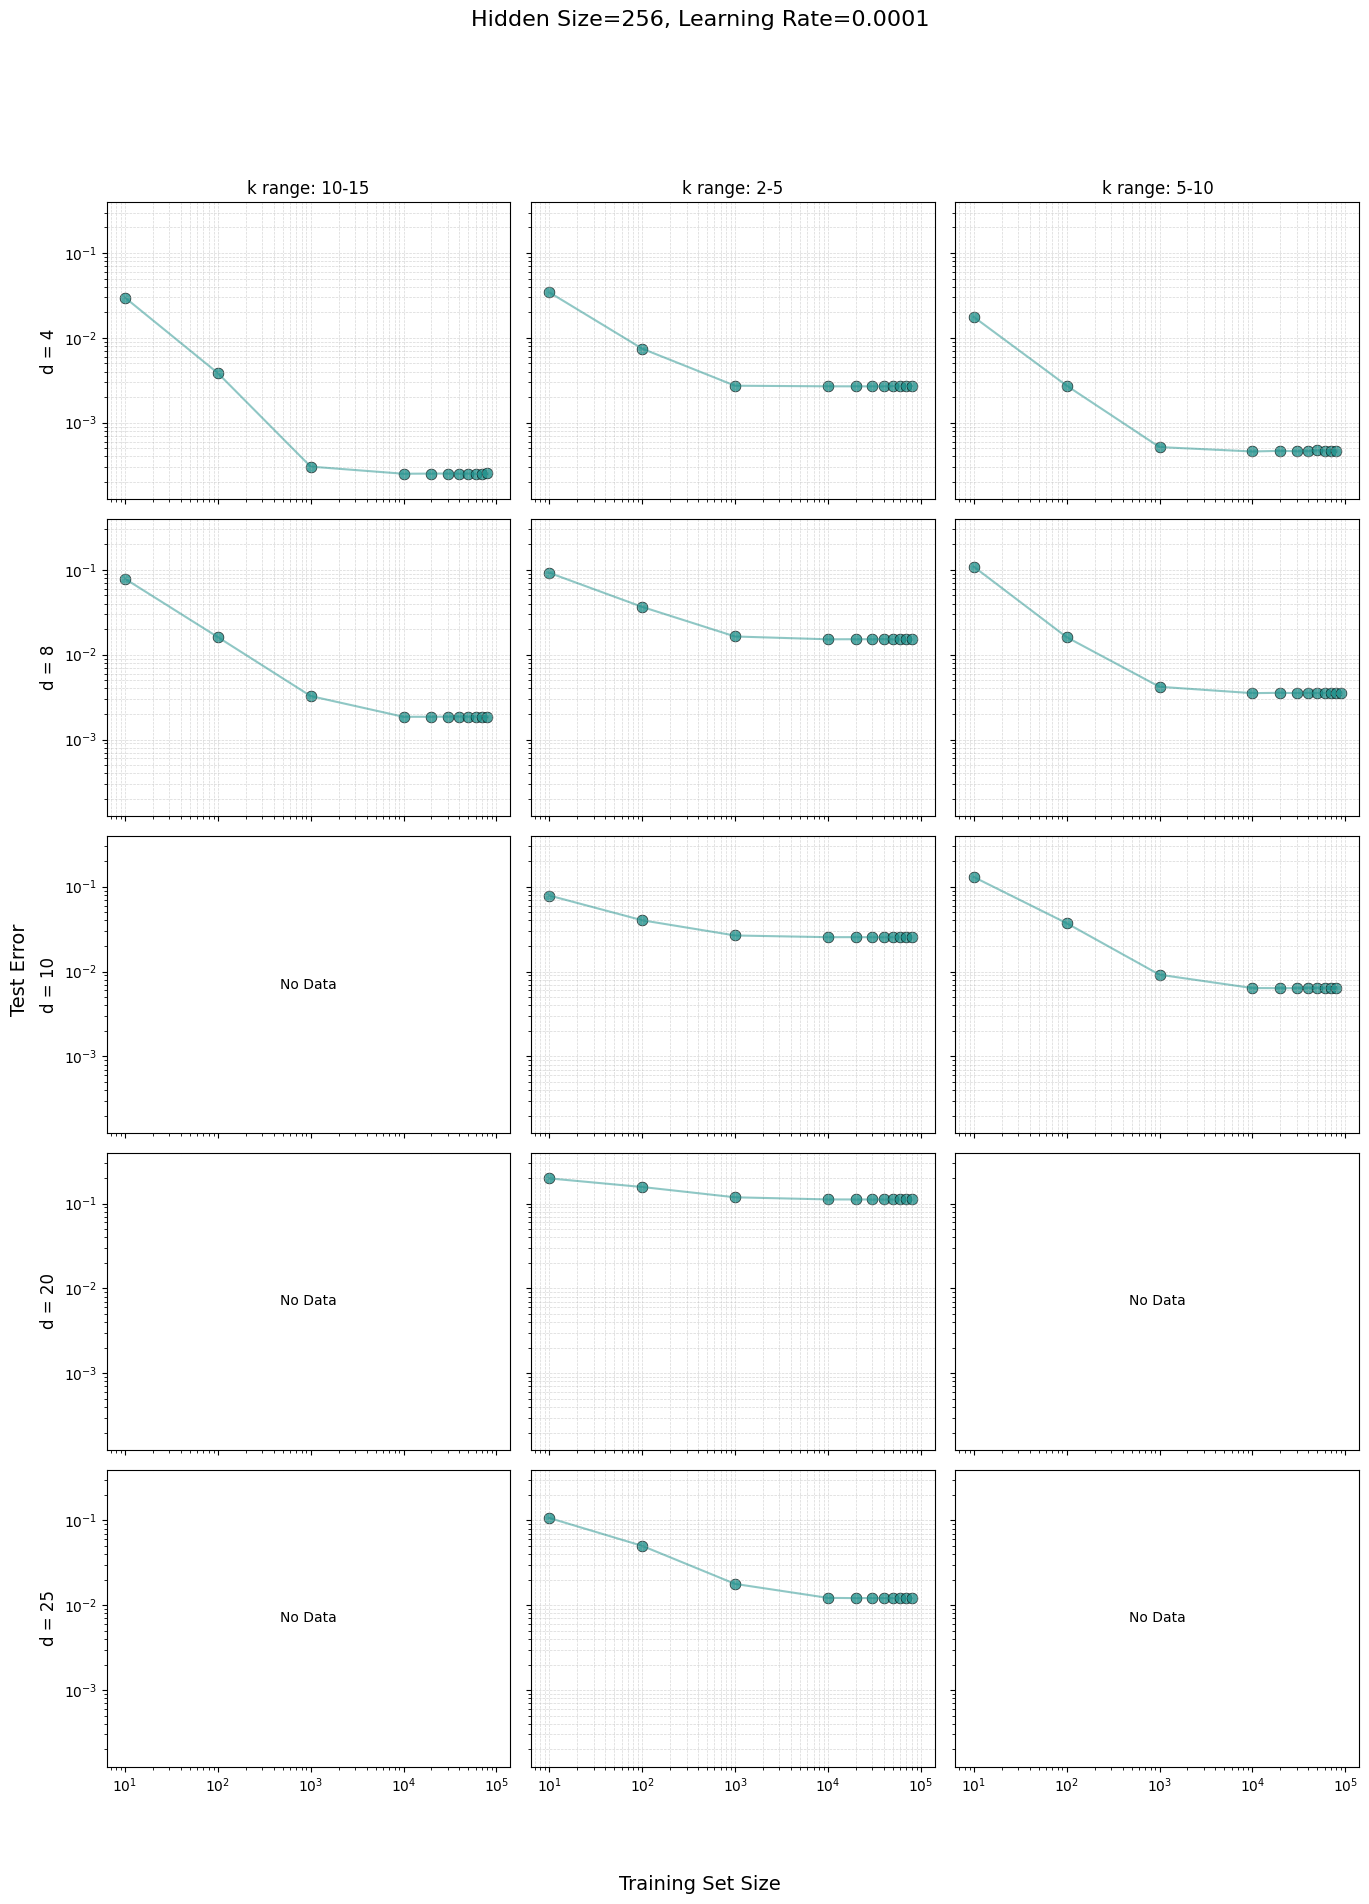

Creating grid for LR=0.0001, H=512
Dimensions: [np.int64(4), np.int64(8), np.int64(10), np.int64(20), np.int64(25)]
k-ranges: ['10-15', '2-5', '5-10']
Saved plot to ./result_plots_SH_grid/grid_H512_LR0p0001.png


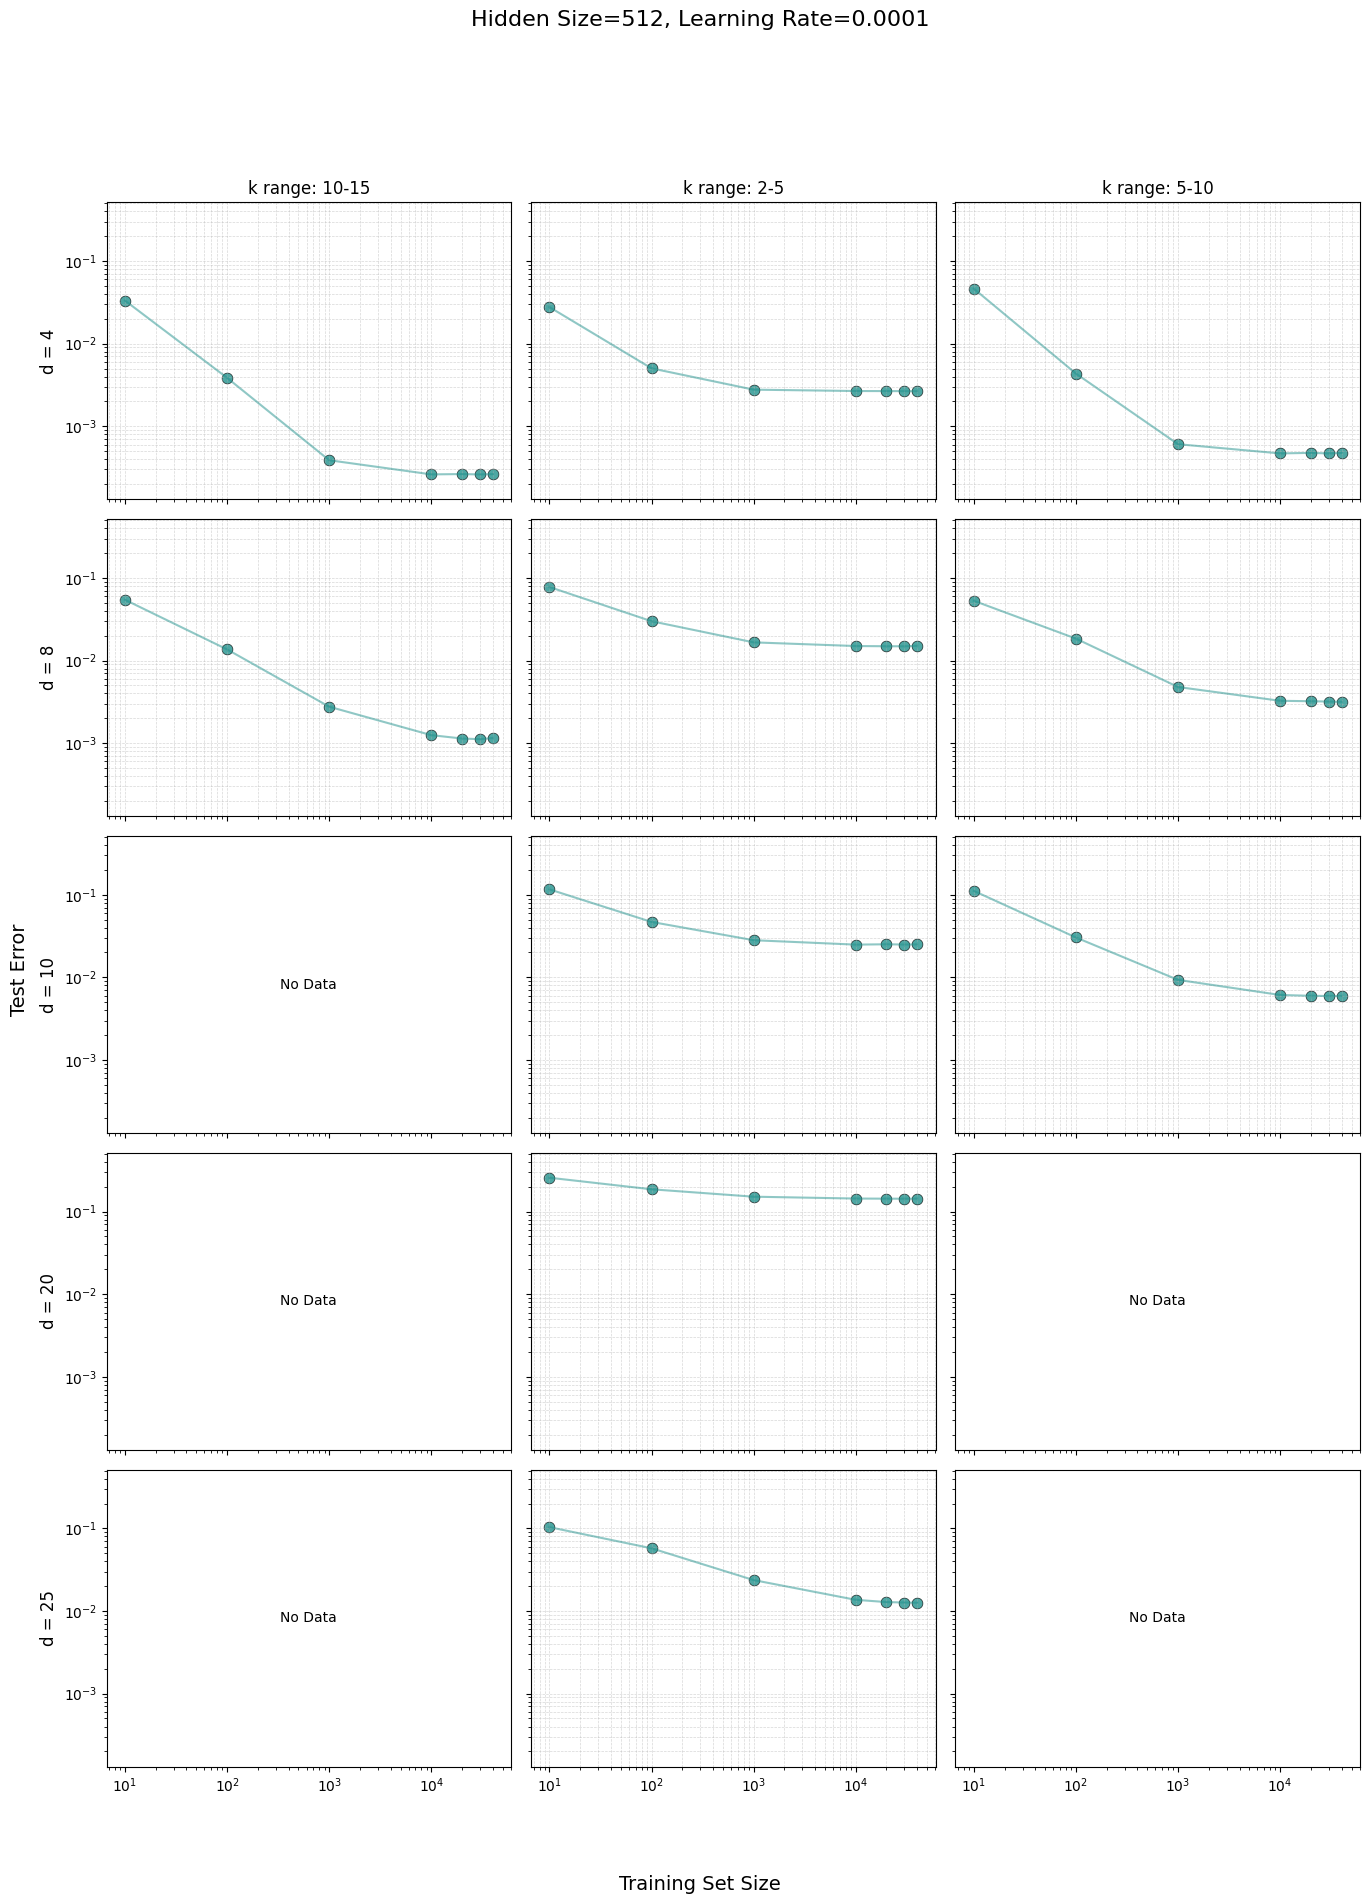

Creating grid for LR=0.0005, H=256
Dimensions: [np.int64(4), np.int64(8), np.int64(10), np.int64(20), np.int64(25)]
k-ranges: ['10-15', '2-5', '5-10']
Saved plot to ./result_plots_SH_grid/grid_H256_LR0p0005.png


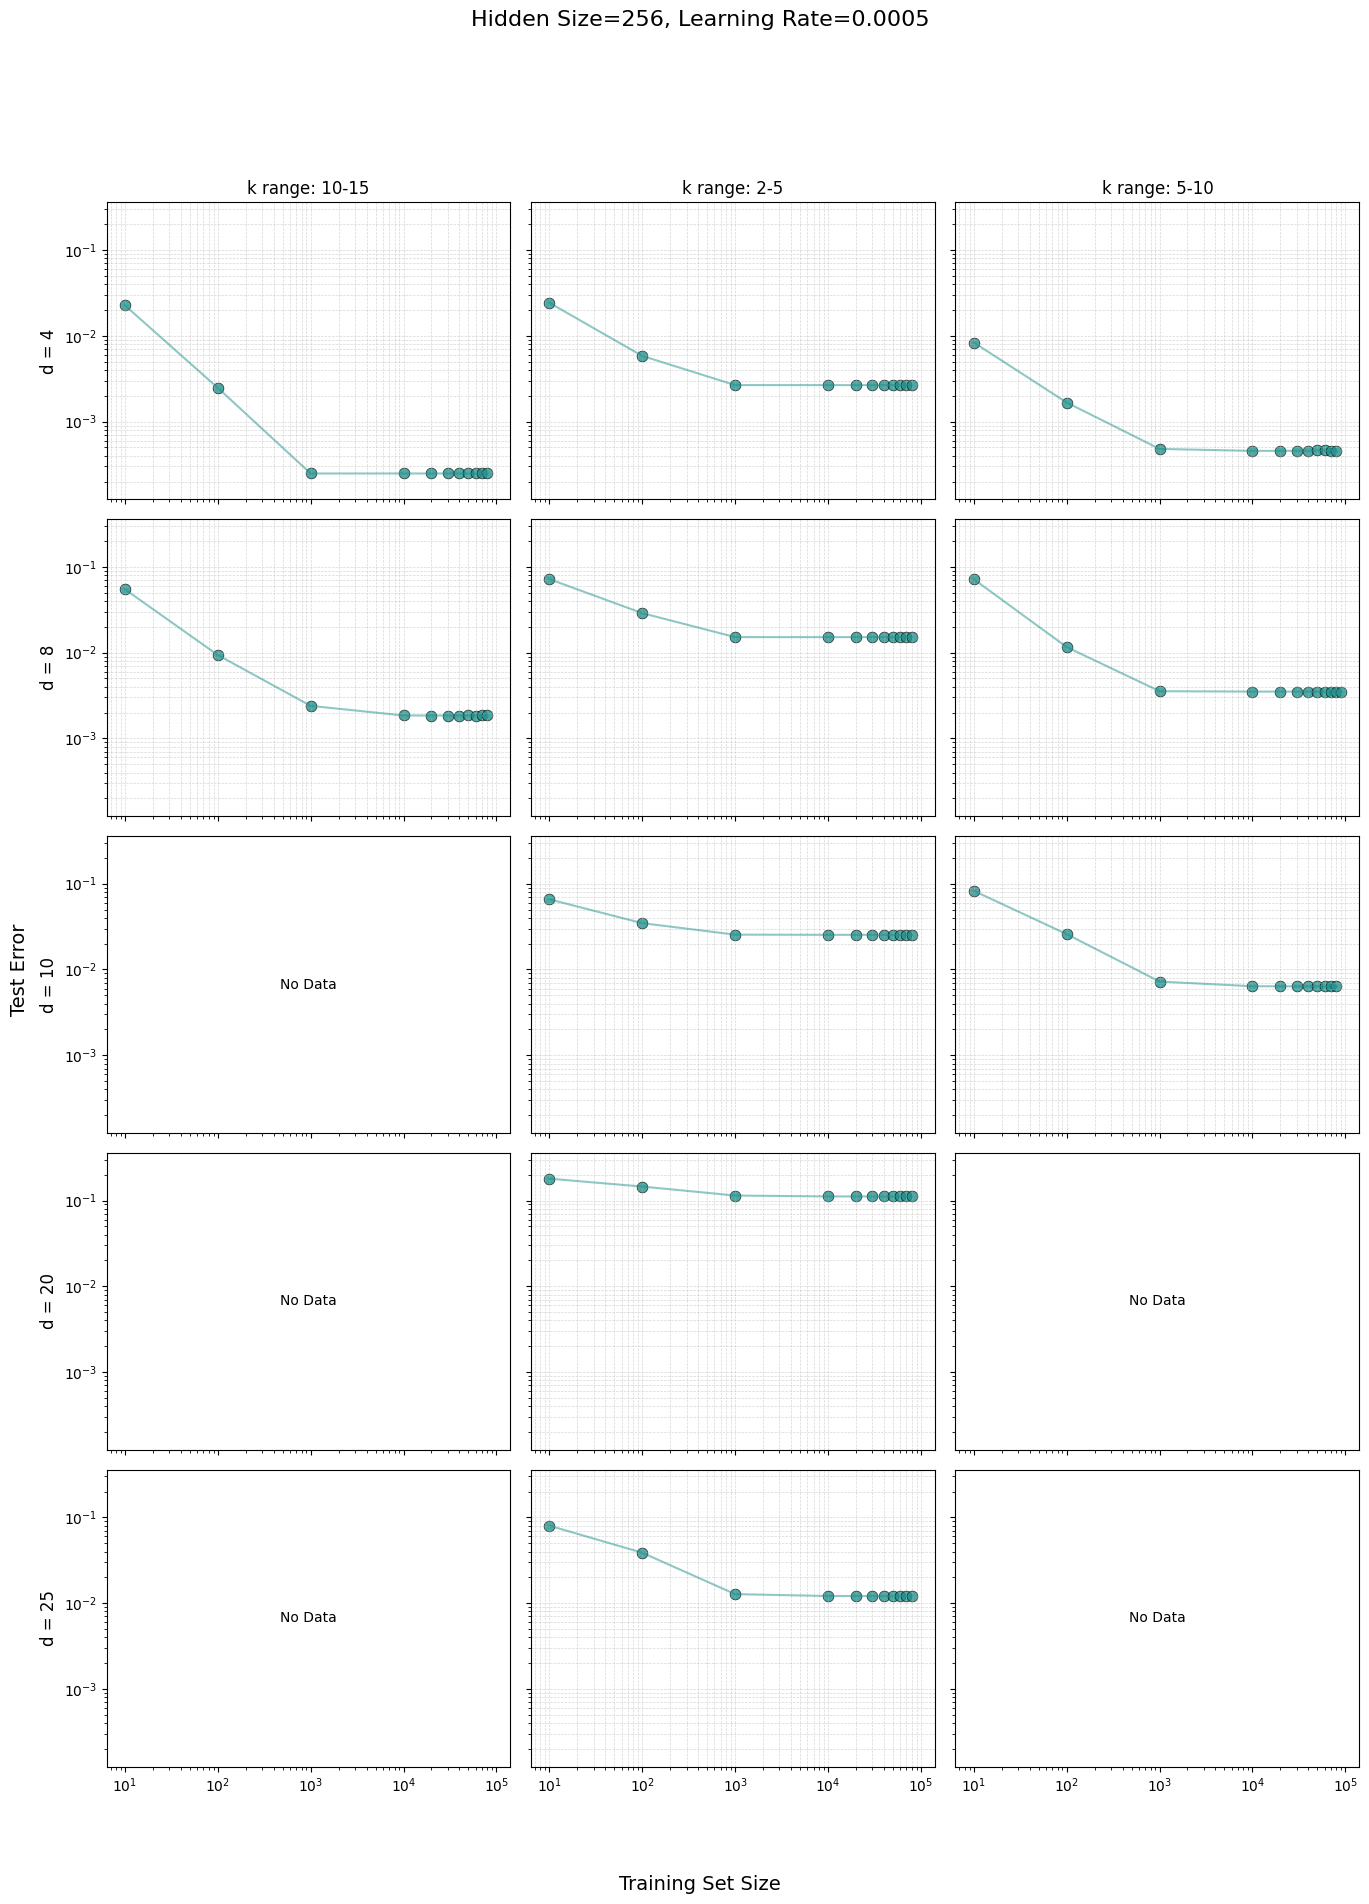

Creating grid for LR=0.0005, H=512
Dimensions: [np.int64(4), np.int64(8), np.int64(10), np.int64(20), np.int64(25)]
k-ranges: ['10-15', '2-5', '5-10']
Saved plot to ./result_plots_SH_grid/grid_H512_LR0p0005.png


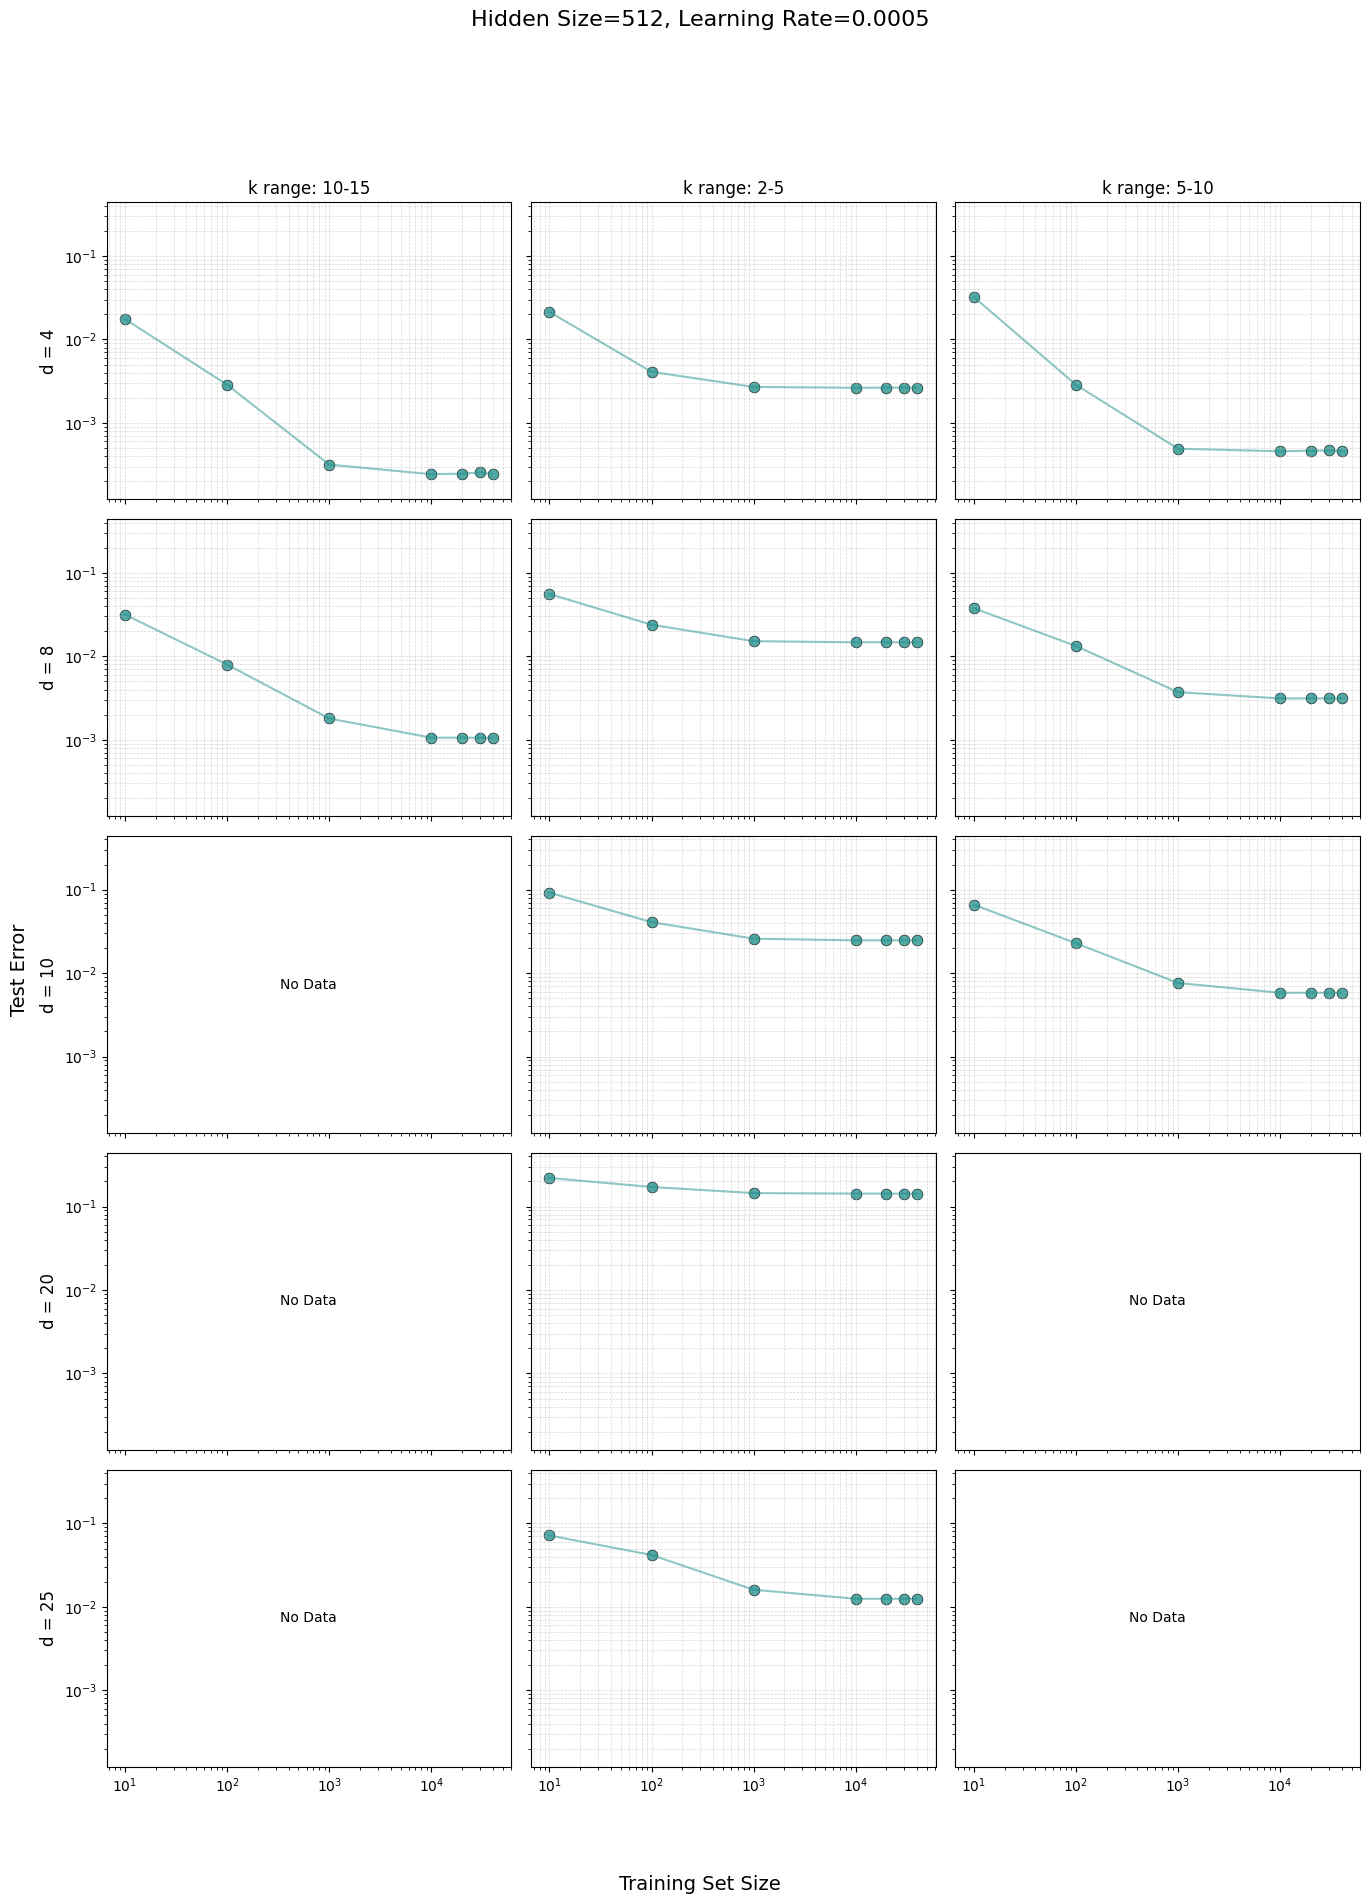

Creating grid for LR=0.001, H=256
Dimensions: [np.int64(4), np.int64(8), np.int64(10), np.int64(20), np.int64(25)]
k-ranges: ['10-15', '2-5', '5-10']
Saved plot to ./result_plots_SH_grid/grid_H256_LR0p001.png


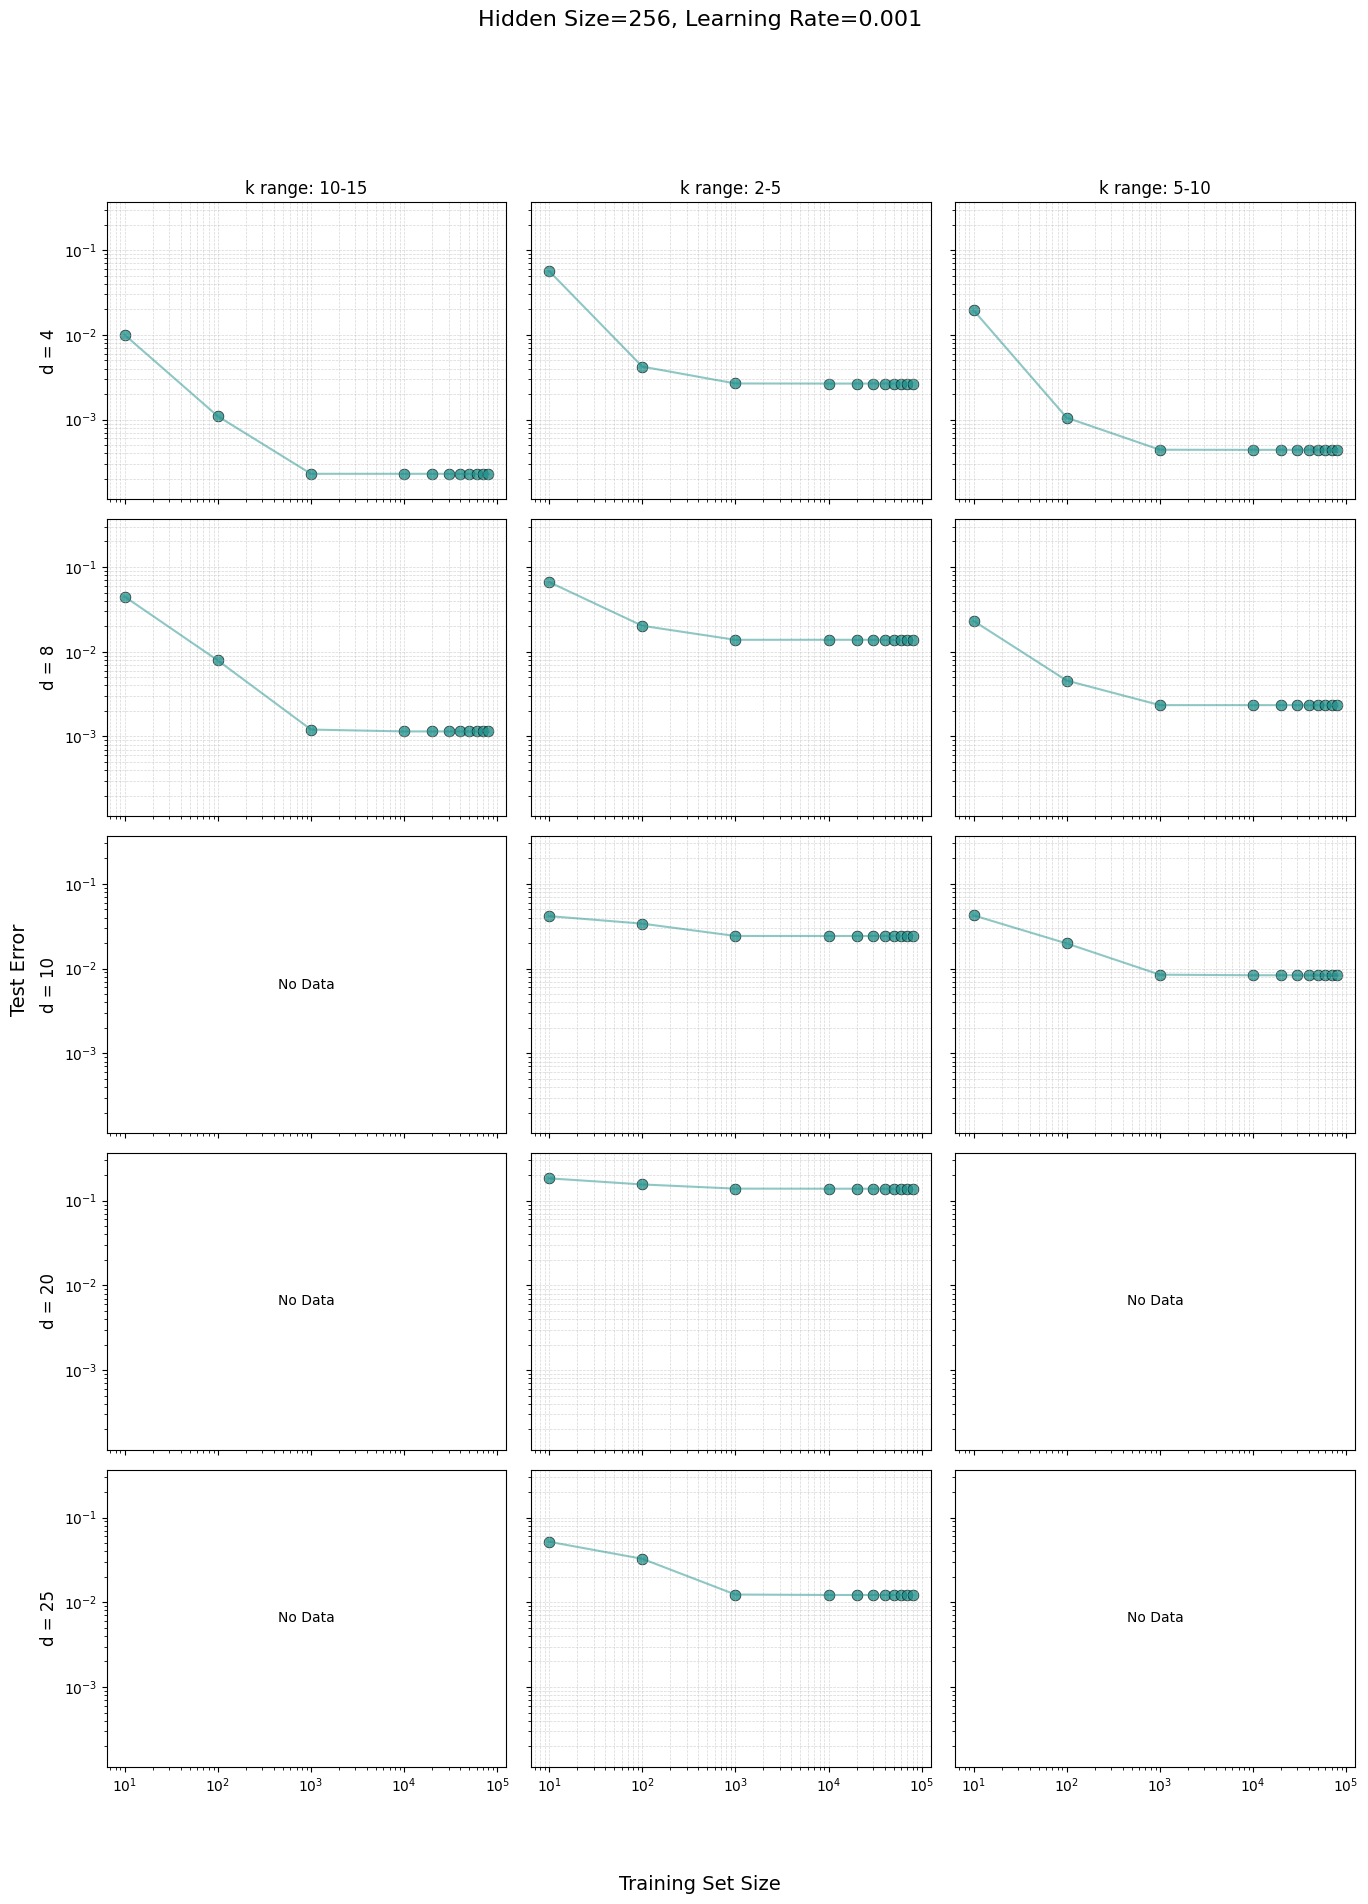

Creating grid for LR=0.001, H=512
Dimensions: [np.int64(4), np.int64(8), np.int64(10), np.int64(20), np.int64(25)]
k-ranges: ['10-15', '2-5', '5-10']
Saved plot to ./result_plots_SH_grid/grid_H512_LR0p001.png


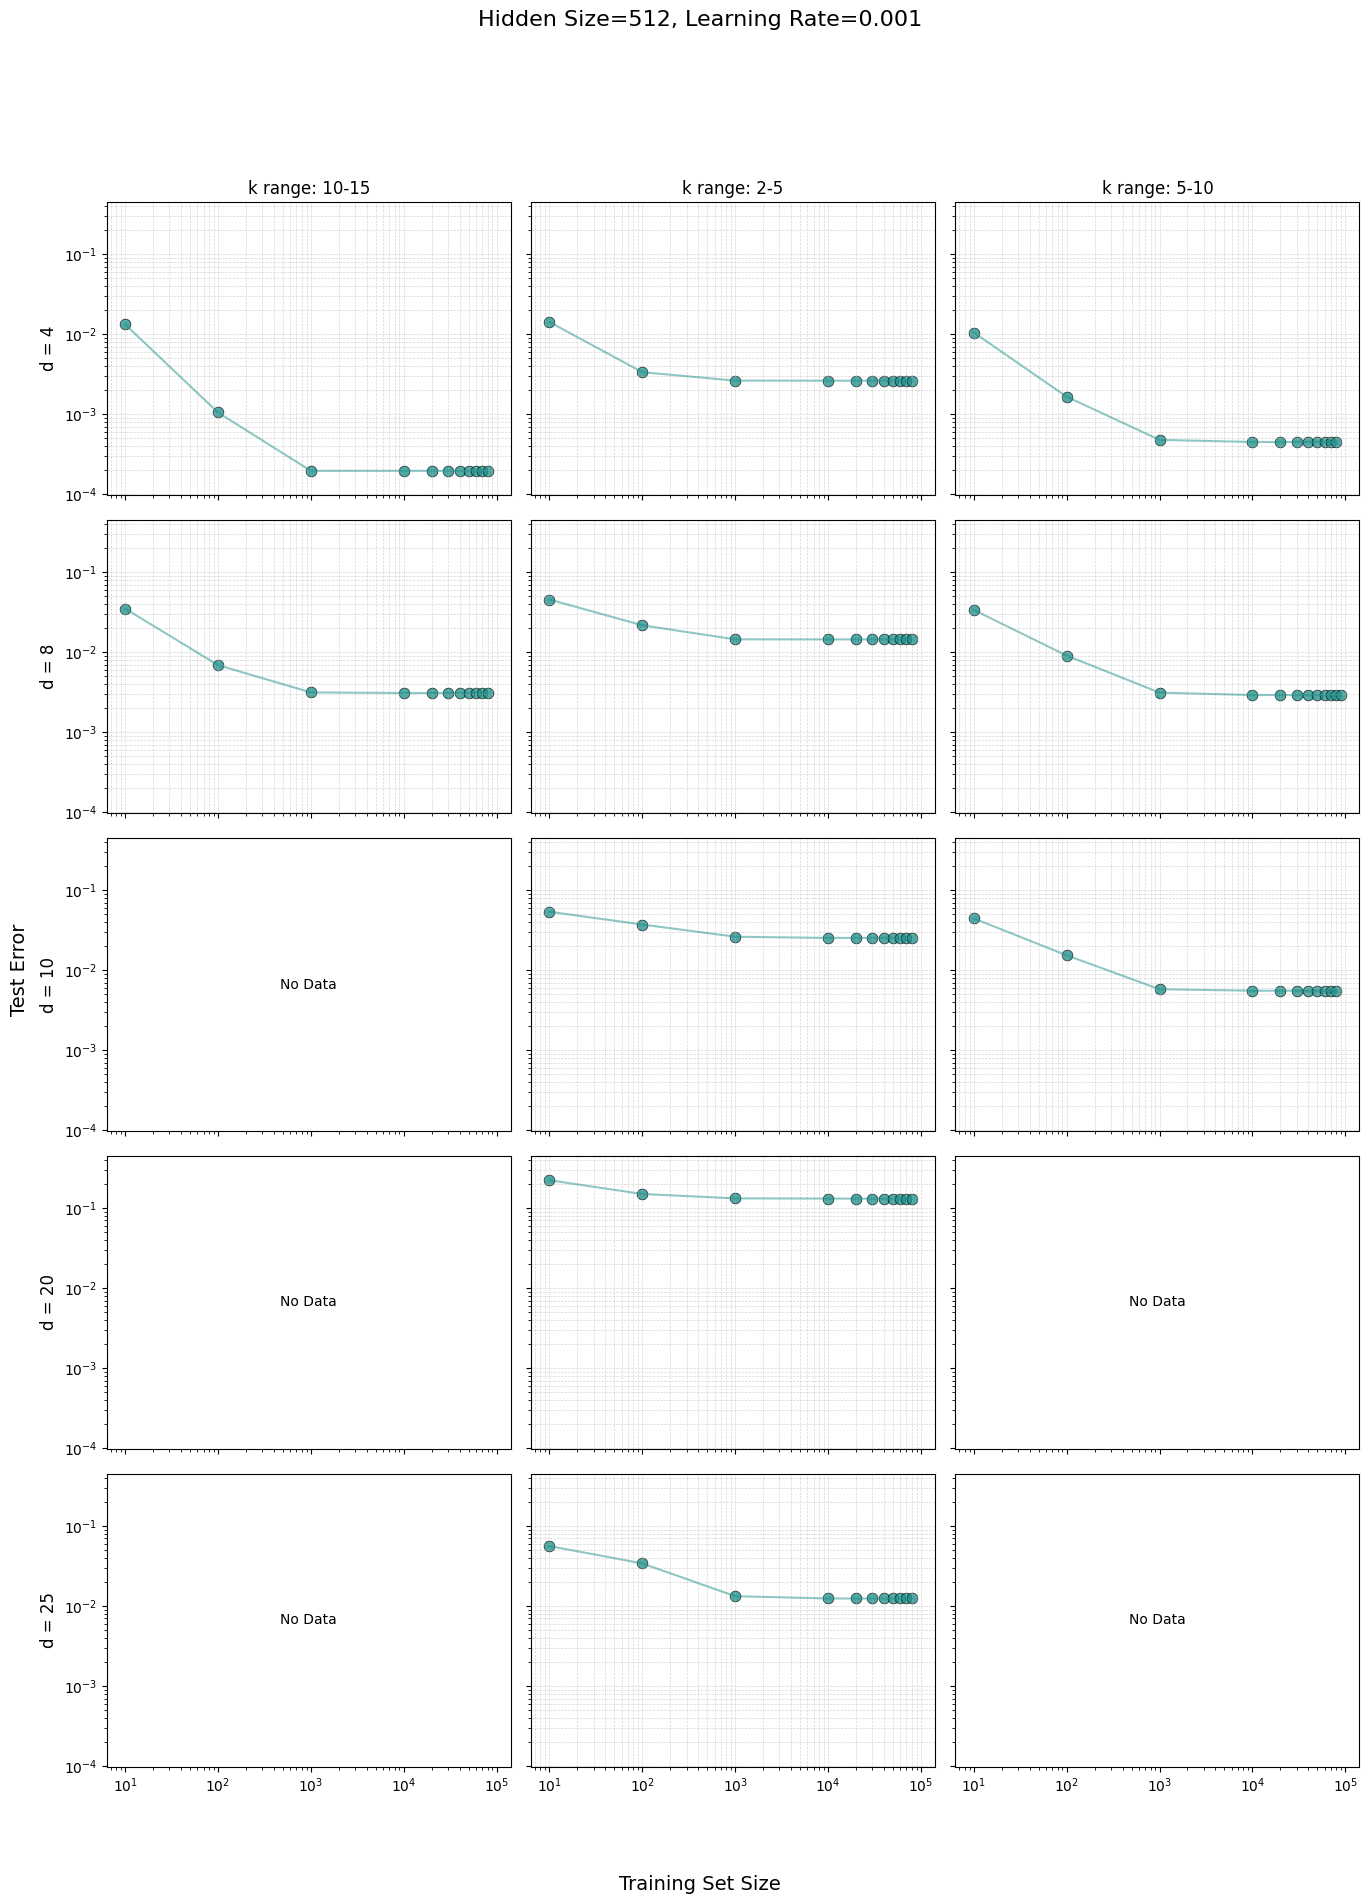

Creating heatmap with 5 dimensions, 3 k-ranges, and 12 training sizes
Saved heatmap to ./result_plots_SH_grid/heatmap_n10.png


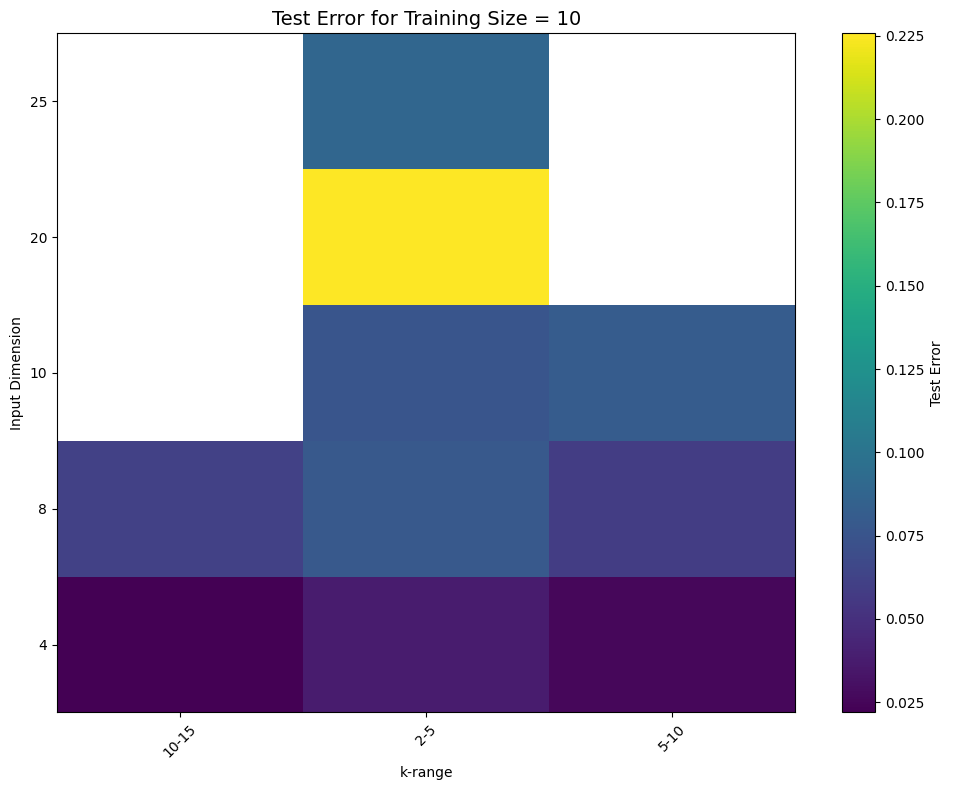

Saved heatmap to ./result_plots_SH_grid/heatmap_n100.png


Saved heatmap to ./result_plots_SH_grid/heatmap_n1000.png


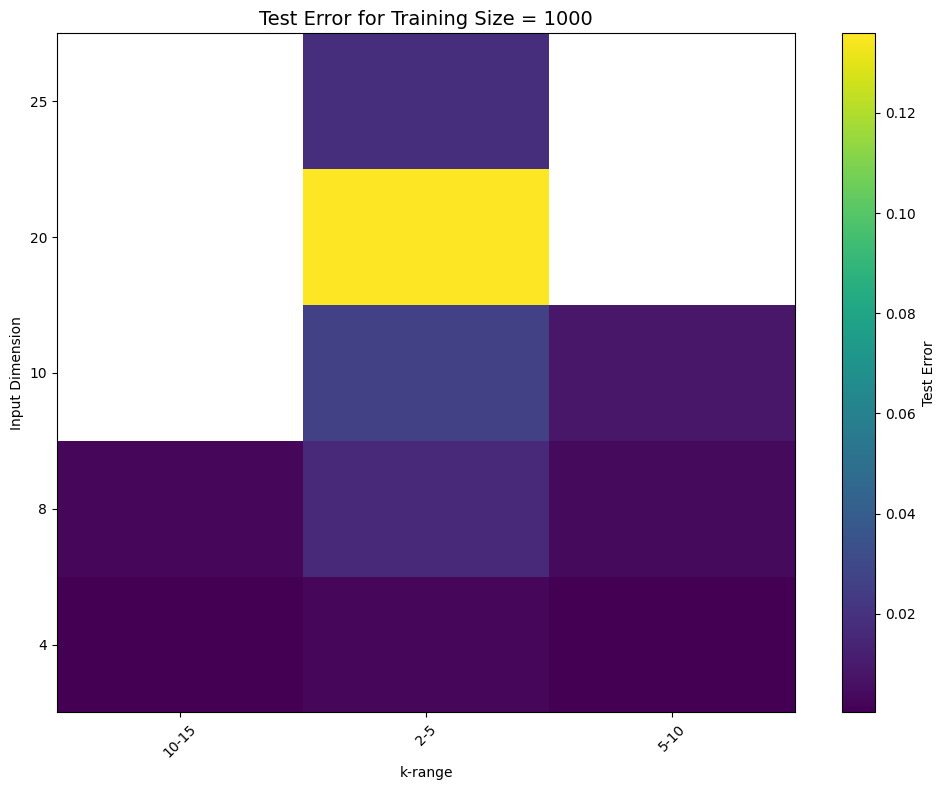

Saved heatmap to ./result_plots_SH_grid/heatmap_n10000.png


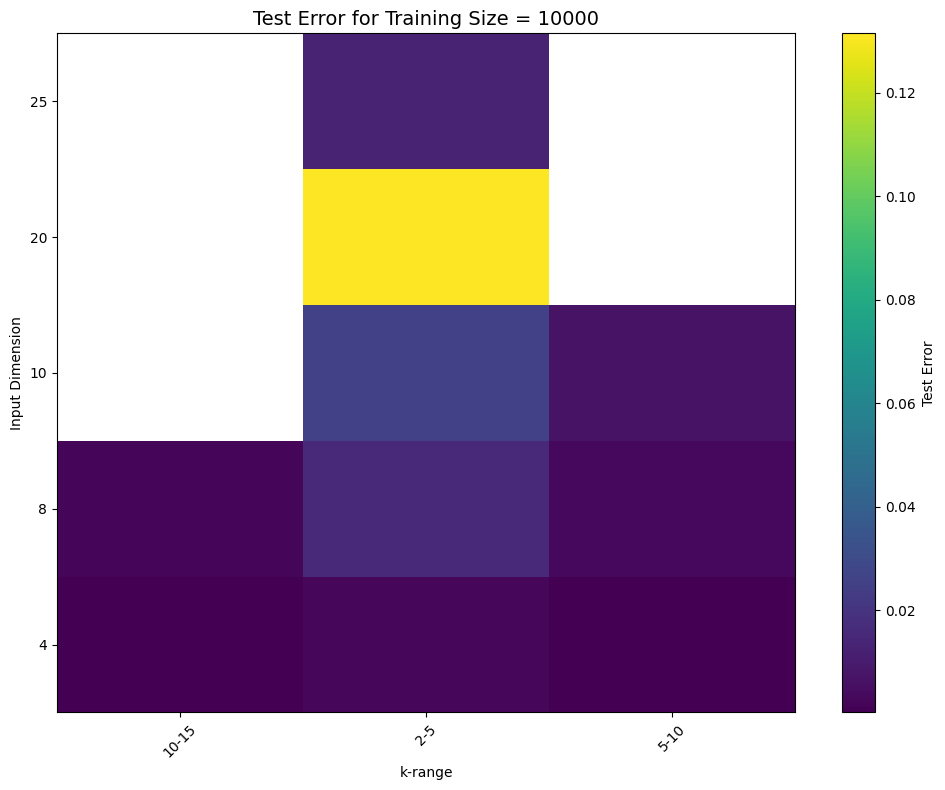

Saved heatmap to ./result_plots_SH_grid/heatmap_n20000.png


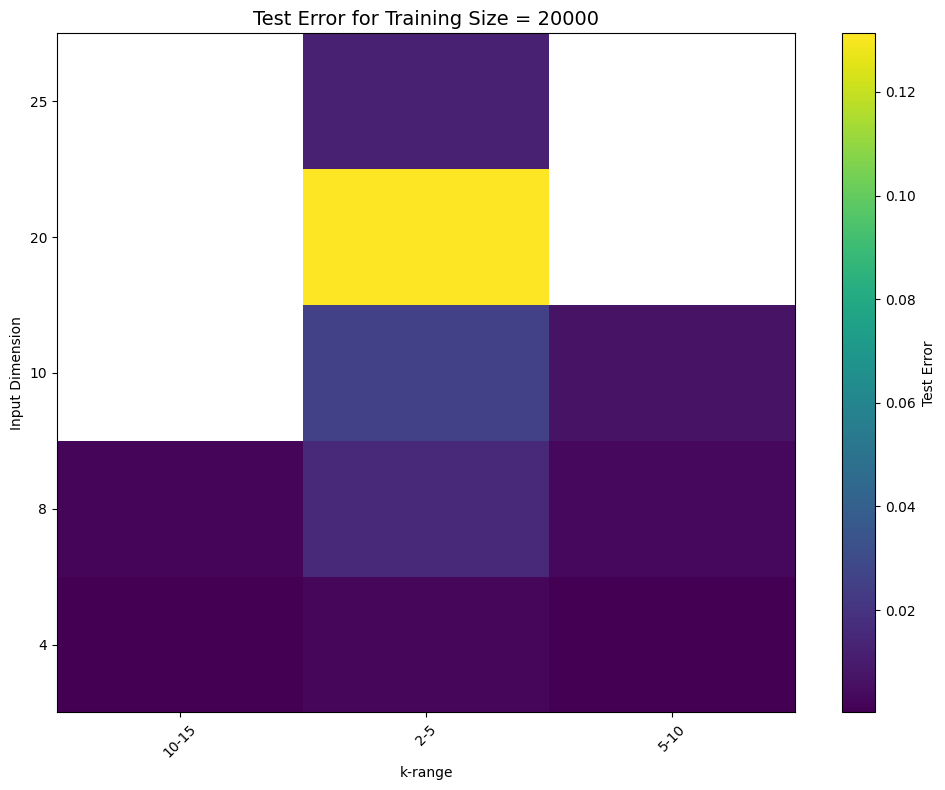

Saved heatmap to ./result_plots_SH_grid/heatmap_n30000.png


Saved heatmap to ./result_plots_SH_grid/heatmap_n40000.png


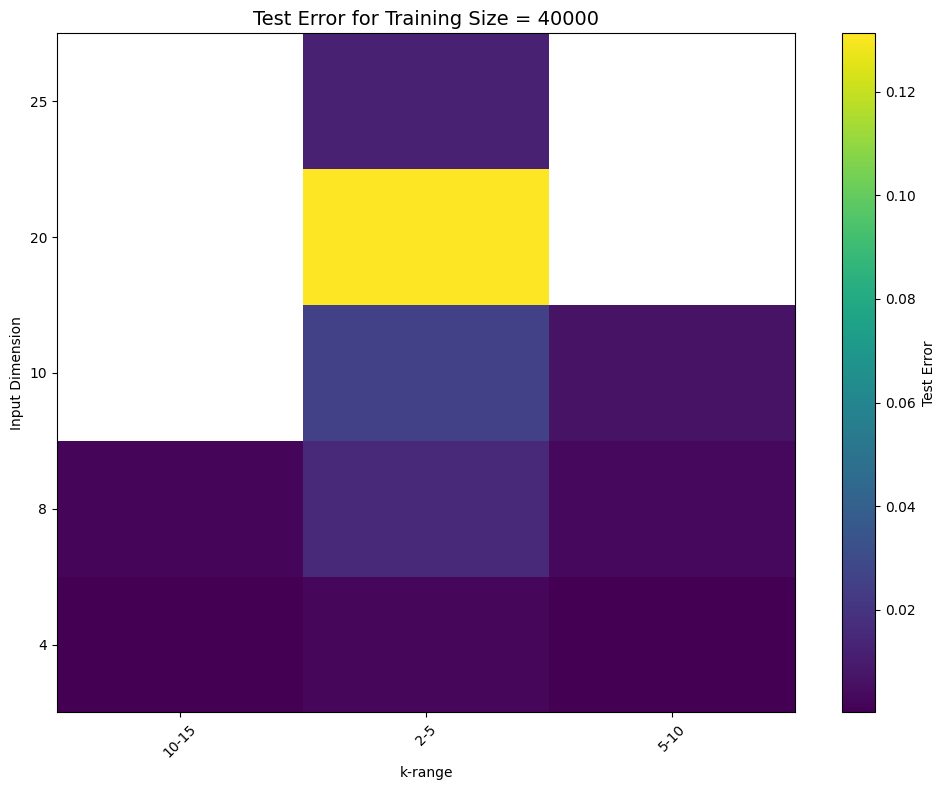

Saved heatmap to ./result_plots_SH_grid/heatmap_n50000.png


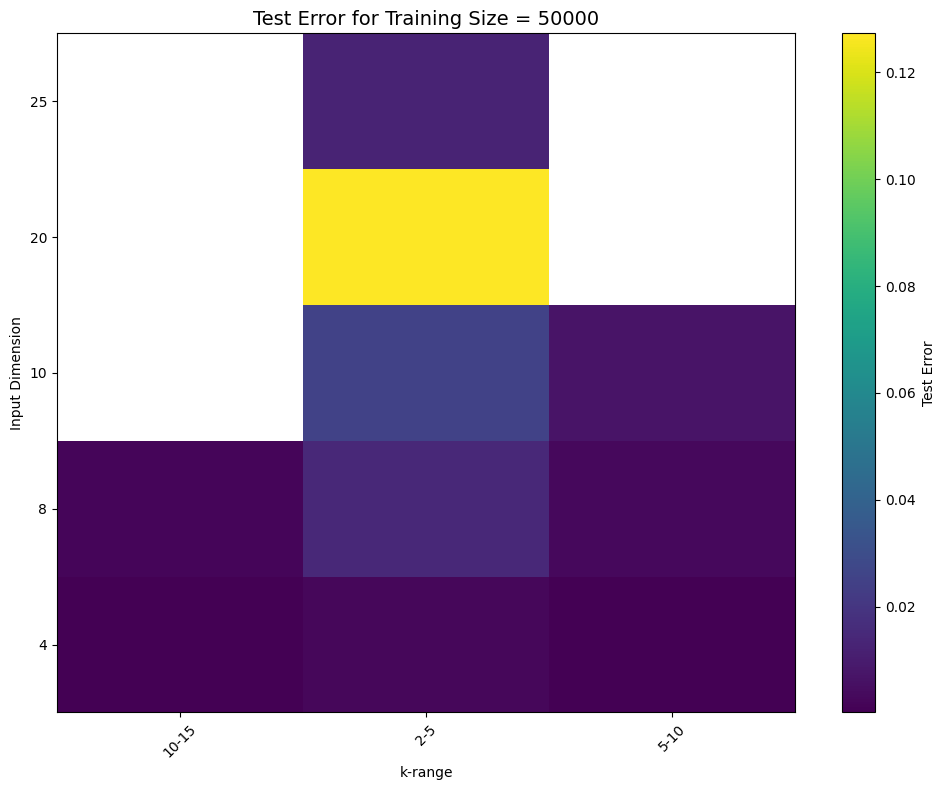

Saved heatmap to ./result_plots_SH_grid/heatmap_n60000.png


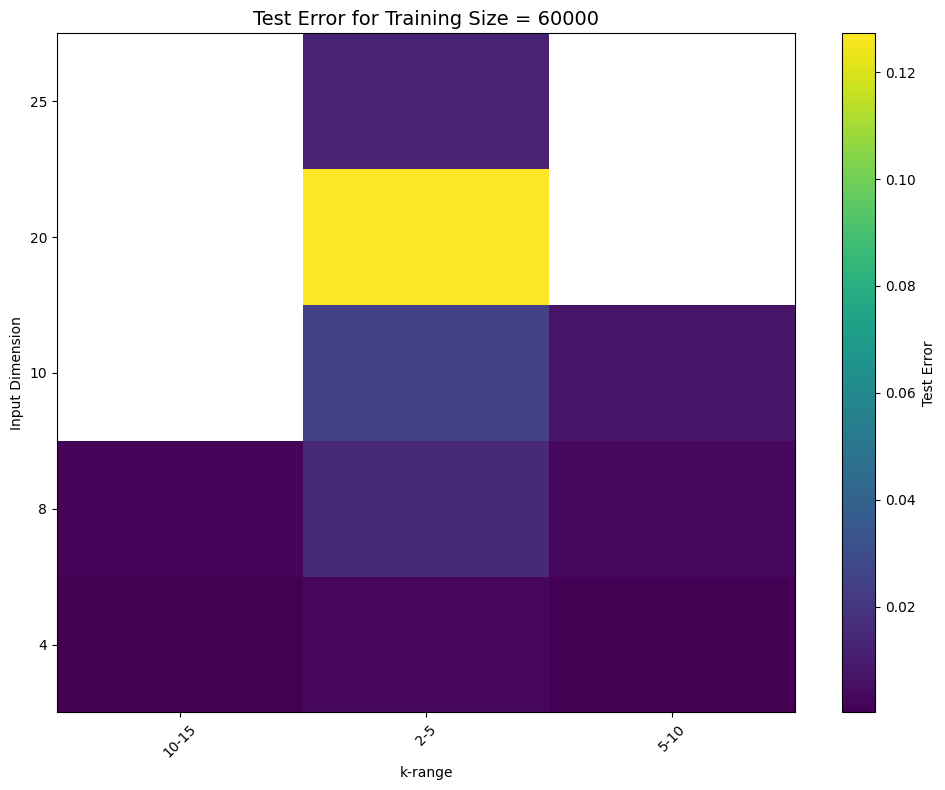

Saved heatmap to ./result_plots_SH_grid/heatmap_n70000.png


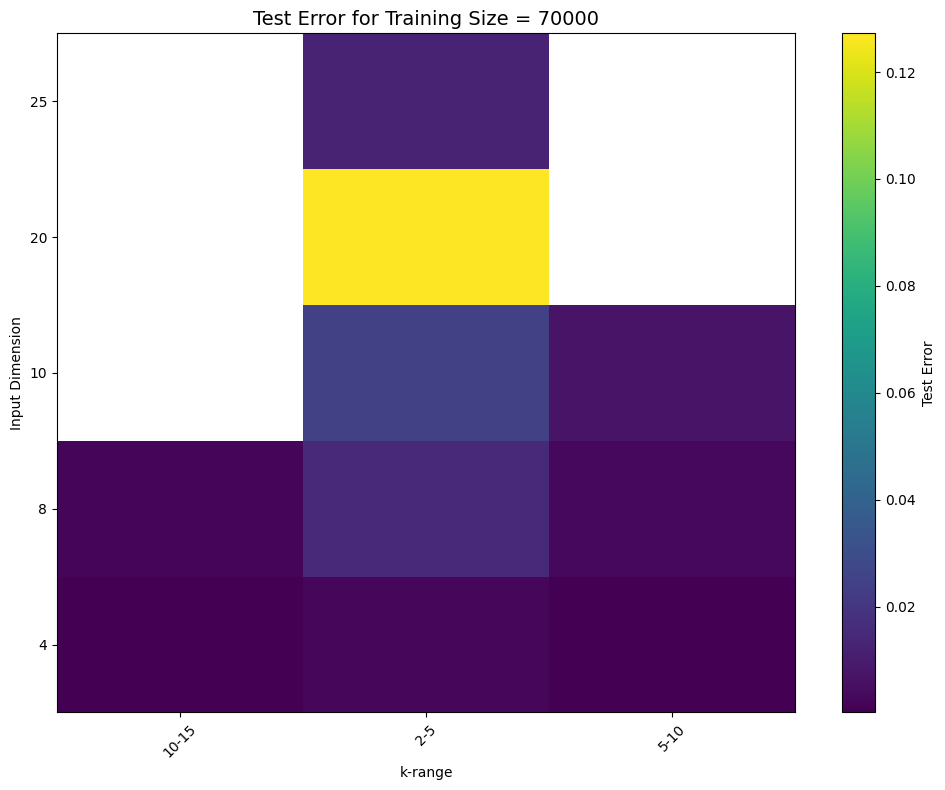

Saved heatmap to ./result_plots_SH_grid/heatmap_n80000.png


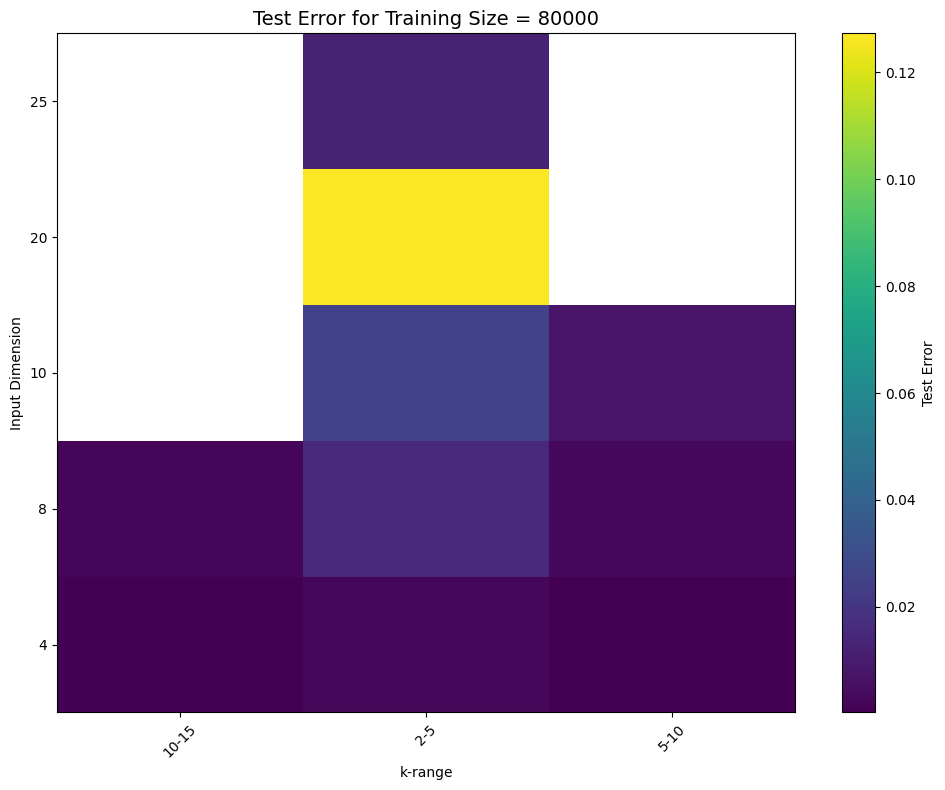

TypeError: Dimensions of C (1, 1) should be one smaller than X(4) and Y(6) while using shading='flat' see help(pcolormesh)

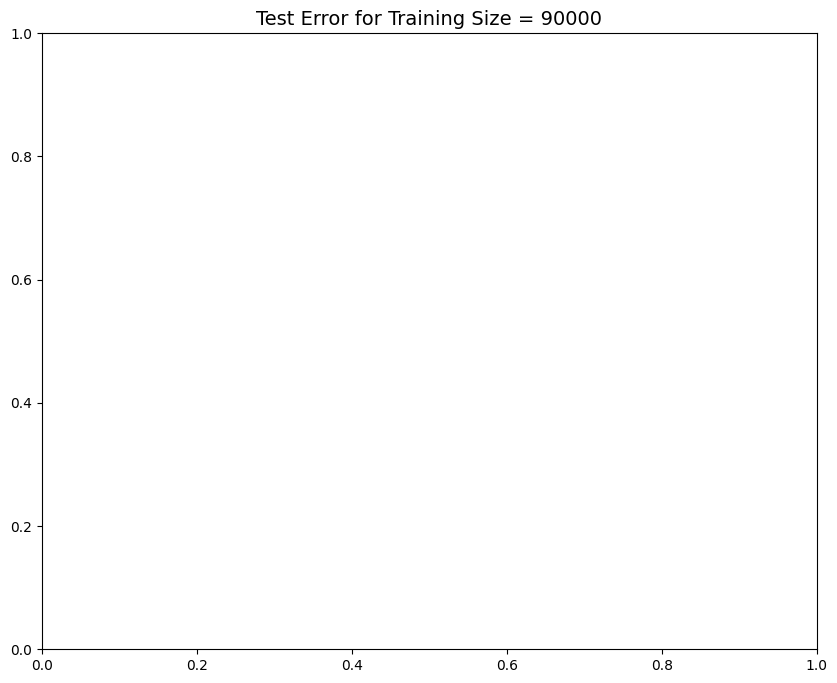

In [1]:
import os
import glob
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter

# === Configuration ===
# Set the path to your results directory
results_dir = "/home/goring/NN_spherical_harmonics/results/SH_2303/sweep_full_exp_20250324"

# Set to True to save plots to files
save_plots = True
output_dir = "./result_plots_SH_grid"

# Create output directory if needed
if save_plots:
    os.makedirs(output_dir, exist_ok=True)

def load_results(results_dir):
    """Load all result files from the specified directory."""
    result_files = []
    
    # First, try direct approach with explicit paths
    for gpu_id in range(4):  # Assuming 4 GPUs max
        pattern = os.path.join(results_dir, f"results_*_gpu{gpu_id}.jsonl")
        result_files.extend(glob.glob(pattern))
    
    # If no files found, try recursive pattern
    if not result_files:
        pattern = os.path.join(results_dir, "**", "*.jsonl")
        result_files.extend(glob.glob(pattern, recursive=True))
    
    print(f"Found {len(result_files)} result files")
    if not result_files:
        print(f"No files found in {results_dir}")
        return []
    
    all_results = []
    
    for file_path in result_files:
        try:
            with open(file_path, 'r') as f:
                for line in f:
                    if line.strip():
                        try:
                            result = json.loads(line)
                            all_results.append(result)
                        except json.JSONDecodeError:
                            print(f"Error parsing JSON in {file_path}")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    print(f"Loaded {len(all_results)} individual results")
    return all_results

def extract_k_range(result):
    """Extract k range from the result."""
    # Try to find k range in dataset name or directory
    fields_to_check = [
        result.get('dataset_name', ''),
        result.get('dataset_directory', '')
    ]
    
    for field in fields_to_check:
        # Look for patterns like "k2-5" or "k5-10"
        match = re.search(r'k(\d+)-(\d+)', field)
        if match:
            return f"{match.group(1)}-{match.group(2)}"
        
        # Look for specific patterns we know are in the data
        for k_range in ['2-5', '5-10', '10-15']:
            if k_range in field:
                return k_range
    
    return "Unknown"

def process_results(results):
    """Process results into a DataFrame with proper types."""
    processed_data = []
    
    for result in results:
        # Extract basic information from the result
        input_dim = result.get('input_dim')
        hidden_size = result.get('hidden_size')
        learning_rate = result.get('learning_rate')
        n_train = result.get('n_train')
        test_error = result.get('test_error')
        
        # Skip if any required field is missing
        if None in [input_dim, hidden_size, learning_rate, n_train, test_error]:
            continue
        
        # Extract k_range
        k_range = extract_k_range(result)
        
        # Create a record with explicit type conversion
        record = {
            'input_dim': int(input_dim),
            'k_range': k_range,
            'n_train': int(n_train),
            'test_error': float(test_error),
            'hidden_size': int(hidden_size),
            'learning_rate': float(learning_rate)
        }
        
        processed_data.append(record)
    
    # Convert to DataFrame
    df = pd.DataFrame(processed_data)
    return df

def create_grid_plots(df):
    """Create grid-style plots with dimensions on rows and k-ranges on columns."""
    
    # Get unique values
    lr_values = sorted(df['learning_rate'].unique())
    h_size_values = sorted(df['hidden_size'].unique())
    
    # Create plots for each combination of learning rate and hidden size
    for lr in lr_values:
        for h_size in h_size_values:
            # Filter data for this learning rate and hidden size
            subset = df[(df['learning_rate'] == lr) & (df['hidden_size'] == h_size)]
            
            if subset.empty:
                print(f"No data for Learning Rate={lr}, Hidden Size={h_size}")
                continue
            
            # Get unique dimensions and k-ranges for this subset
            dimensions = sorted(subset['input_dim'].unique())
            k_ranges = sorted(subset['k_range'].unique())
            
            if not dimensions or not k_ranges:
                print(f"Missing dimensions or k-ranges for LR={lr}, H={h_size}")
                continue
            
            print(f"Creating grid for LR={lr}, H={h_size}")
            print(f"Dimensions: {dimensions}")
            print(f"k-ranges: {k_ranges}")
            
            # Create a grid of plots
            fig, axes = plt.subplots(
                nrows=len(dimensions),
                ncols=len(k_ranges),
                figsize=(len(k_ranges)*5, len(dimensions)*4),
                sharex=True,
                sharey=True,
                squeeze=False
            )
            
            # Set the figure title
            fig.suptitle(f'Hidden Size={h_size}, Learning Rate={lr}', fontsize=16)
            
            # Add common x and y labels
            fig.text(0.5, 0.04, 'Training Set Size', ha='center', fontsize=14)
            fig.text(0.04, 0.5, 'Test Error', va='center', rotation='vertical', fontsize=14)
            
            # Set color map
            color_map = plt.cm.viridis
            
            # Calculate global min and max for y-axis
            min_error = subset['test_error'].min() * 0.5
            max_error = subset['test_error'].max() * 2.0
            
            # Fill in each cell of the grid
            for i, dim in enumerate(dimensions):
                for j, k_range in enumerate(k_ranges):
                    ax = axes[i, j]
                    
                    # Set cell title
                    if i == 0:  # Top row gets k-range
                        ax.set_title(f'k range: {k_range}', fontsize=12)
                    
                    if j == 0:  # First column gets dimension
                        ax.set_ylabel(f'd = {dim}', fontsize=12)
                    
                    # Filter data for this cell
                    cell_data = subset[(subset['input_dim'] == dim) & (subset['k_range'] == k_range)]
                    
                    if cell_data.empty:
                        ax.text(0.5, 0.5, 'No Data', 
                               ha='center', va='center', transform=ax.transAxes)
                        continue
                    
                    # Sort by n_train for proper line plotting
                    cell_data = cell_data.sort_values('n_train')
                    
                    # Log scales
                    ax.set_xscale('log')
                    ax.set_yscale('log')
                    
                    # Plot data points
                    color = color_map(0.5)  # Use middle of colormap
                    ax.scatter(
                        cell_data['n_train'], 
                        cell_data['test_error'],
                        s=60,
                        c=[color],
                        alpha=0.8,
                        marker='o',
                        edgecolors='black',
                        linewidths=0.5
                    )
                    
                    # Also connect points with a line
                    ax.plot(
                        cell_data['n_train'],
                        cell_data['test_error'],
                        c=color,
                        linestyle='-',
                        alpha=0.5
                    )
                    
                    # Set the y-axis limits consistently across all plots
                    ax.set_ylim(min_error, max_error)
                    
                    # Add grid
                    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
            
            # Adjust layout
            plt.tight_layout(rect=[0.05, 0.08, 0.95, 0.92])
            
            # Save figure if requested
            if save_plots:
                lr_str = str(lr).replace('.', 'p')
                save_path = os.path.join(output_dir, f'grid_H{h_size}_LR{lr_str}.png')
                plt.savefig(save_path, dpi=300, bbox_inches='tight')
                print(f"Saved plot to {save_path}")
            
            plt.show()

def create_single_grid(df):
    """
    Create a single grid plot with all dimensions and k-ranges.
    This helps visualize the overall data distribution and identify missing cells.
    """
    # Pivot the data to get a table of test errors
    # Group by input_dim, k_range, and n_train and calculate mean test error
    grouped = df.groupby(['input_dim', 'k_range', 'n_train'])['test_error'].mean().reset_index()
    
    # Get unique values
    dims = sorted(grouped['input_dim'].unique())
    k_ranges = sorted(grouped['k_range'].unique())
    n_trains = sorted(grouped['n_train'].unique())
    
    print(f"Creating heatmap with {len(dims)} dimensions, {len(k_ranges)} k-ranges, and {len(n_trains)} training sizes")
    
    # Create a heatmap for each n_train value
    for n_train in n_trains:
        # Filter data for this n_train
        subset = grouped[grouped['n_train'] == n_train]
        
        # Create a matrix for the heatmap
        heatmap_data = pd.pivot_table(
            subset, 
            values='test_error',
            index='input_dim',
            columns='k_range',
            fill_value=np.nan
        )
        
        # Create the plot
        plt.figure(figsize=(10, 8))
        plt.title(f'Test Error for Training Size = {n_train}', fontsize=14)
        
        # Create a heatmap (actually a table)
        im = plt.pcolormesh(
            np.arange(len(k_ranges)+1), 
            np.arange(len(dims)+1), 
            heatmap_data.values,
            cmap='viridis',
            shading='auto'
        )
        
        # Add colorbar
        plt.colorbar(im, label='Test Error')
        
        # Set ticks and labels
        plt.xticks(np.arange(len(k_ranges)) + 0.5, k_ranges, rotation=45)
        plt.yticks(np.arange(len(dims)) + 0.5, dims)
        
        plt.xlabel('k-range')
        plt.ylabel('Input Dimension')
        
        # Adjust layout
        plt.tight_layout()
        
        # Save if requested
        if save_plots:
            save_path = os.path.join(output_dir, f'heatmap_n{n_train}.png')
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Saved heatmap to {save_path}")
        
        plt.show()

def main():
    print("Starting grid plot creation...")
    
    # Load results
    results = load_results(results_dir)
    
    if not results:
        print("No results were loaded. Please check paths and file formats.")
        return
    
    # Process results
    df = process_results(results)
    
    if len(df) == 0:
        print("No valid data entries after processing.")
        return
    
    # Print some summary statistics
    print(f"\nProcessed {len(df)} data points with {df['learning_rate'].nunique()} learning rates, "
          f"{df['hidden_size'].nunique()} hidden sizes, {df['input_dim'].nunique()} dimensions, "
          f"and {df['k_range'].nunique()} k-ranges")
    
    # Create the grid plots
    create_grid_plots(df)
    
    # Create heatmaps for data overview
    create_single_grid(df)
    
    print("Done!")

if __name__ == "__main__":
    main()

Starting grid plot creation...
Found 4 result files
Loaded 454 individual results

Processed 454 data points with 4 learning rates, 2 hidden sizes, 2 depths, 3 dimensions, and 3 k-ranges

=== Checking for Duplicate Experiments ===
No exact duplicate parameter combinations found!
Creating grid for LR=5e-05, Hidden Size=256
Dimensions: [np.int64(4), np.int64(8), np.int64(32)]
k-ranges: ['15-20', '20-25', '5-10']
  n_train=10 appears 2 times with errors: [0.5719704031944275, 0.13443535566329956]
  n_train=100 appears 2 times with errors: [0.13433794677257538, 0.0412168987095356]
  n_train=1000 appears 2 times with errors: [0.025438815355300903, 0.007231052499264479]
  n_train=10000 appears 2 times with errors: [0.0016173258190974593, 0.0005848462460562587]
  n_train=20000 appears 2 times with errors: [0.00128322618547827, 0.0005853582406416535]
  n_train=30000 appears 2 times with errors: [0.0011931555345654488, 0.0005859807133674622]
  n_train=40000 appears 2 times with errors: [0.001211

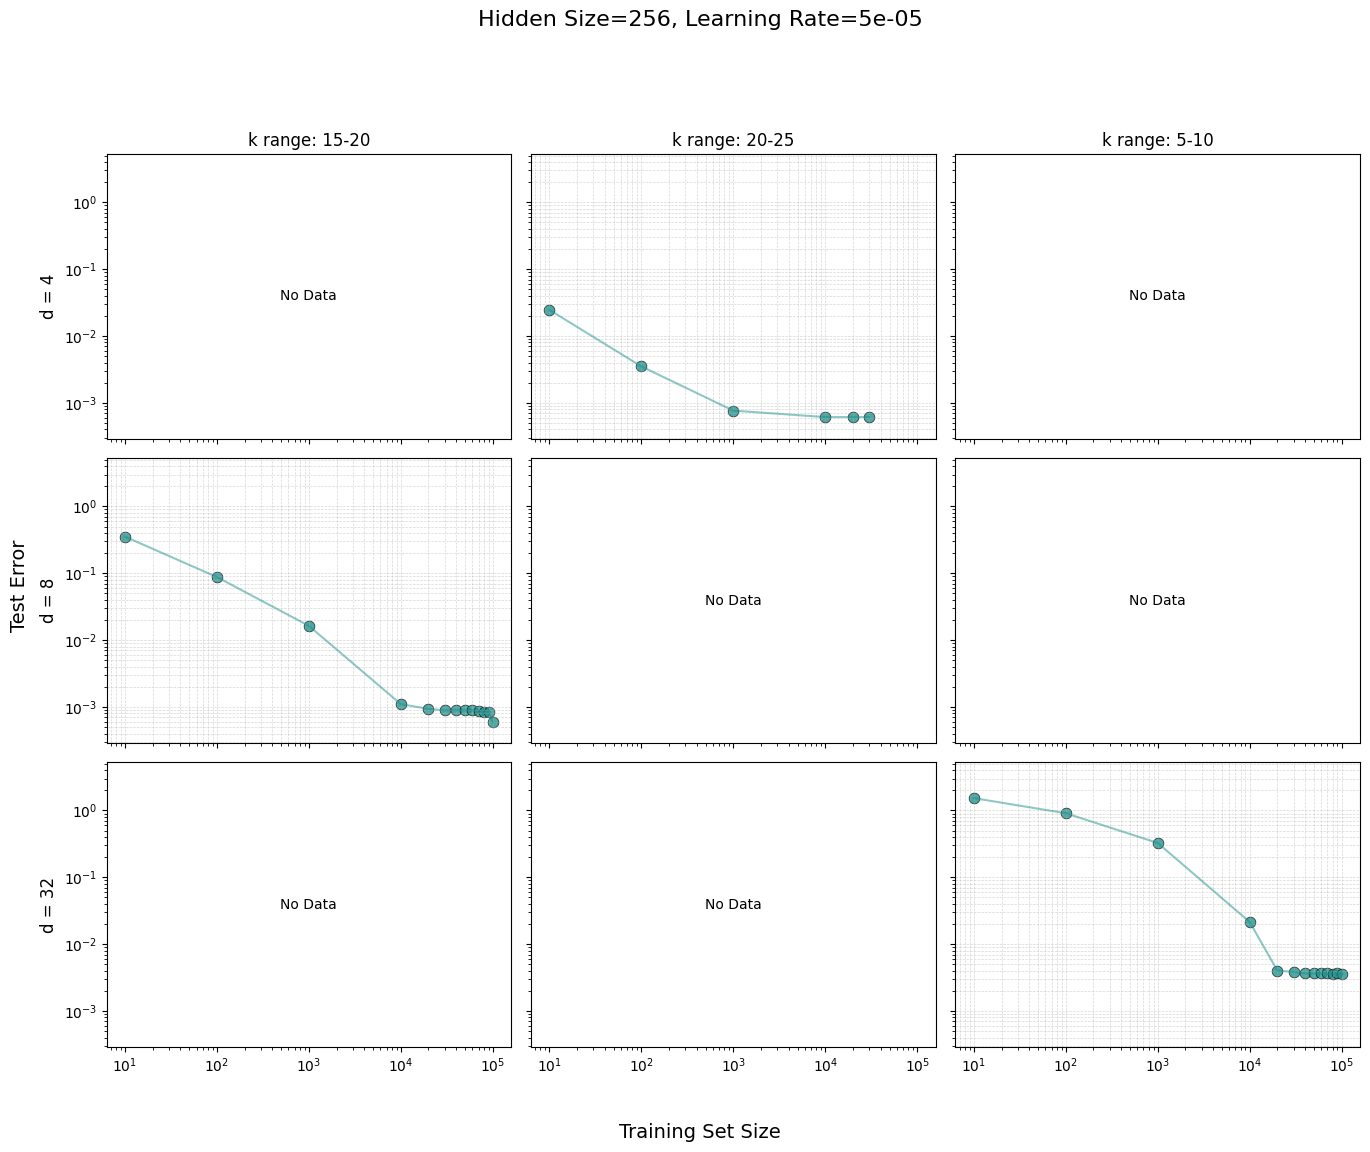

Creating grid for LR=5e-05, Hidden Size=512
Dimensions: [np.int64(4), np.int64(8), np.int64(32)]
k-ranges: ['15-20', '20-25', '5-10']
  n_train=10 appears 2 times with errors: [0.5069945454597473, 0.09863779693841934]
  n_train=100 appears 2 times with errors: [0.14608575403690338, 0.039876461029052734]
  n_train=1000 appears 2 times with errors: [0.03205078840255737, 0.009302632883191109]
  n_train=10000 appears 2 times with errors: [0.004820764530450106, 0.001279564923606813]
  n_train=20000 appears 2 times with errors: [0.003107708180323243, 0.0009194692829623818]
  n_train=30000 appears 2 times with errors: [0.003054362488910556, 0.0008261746261268854]
  n_train=40000 appears 2 times with errors: [0.002259073546156287, 0.0008253027917817235]
  n_train=50000 appears 2 times with errors: [0.0022404412738978863, 0.0008262475021183491]
  n_train=60000 appears 2 times with errors: [0.00234229676425457, 0.0008278836030513048]
  n_train=70000 appears 2 times with errors: [0.00248717609792

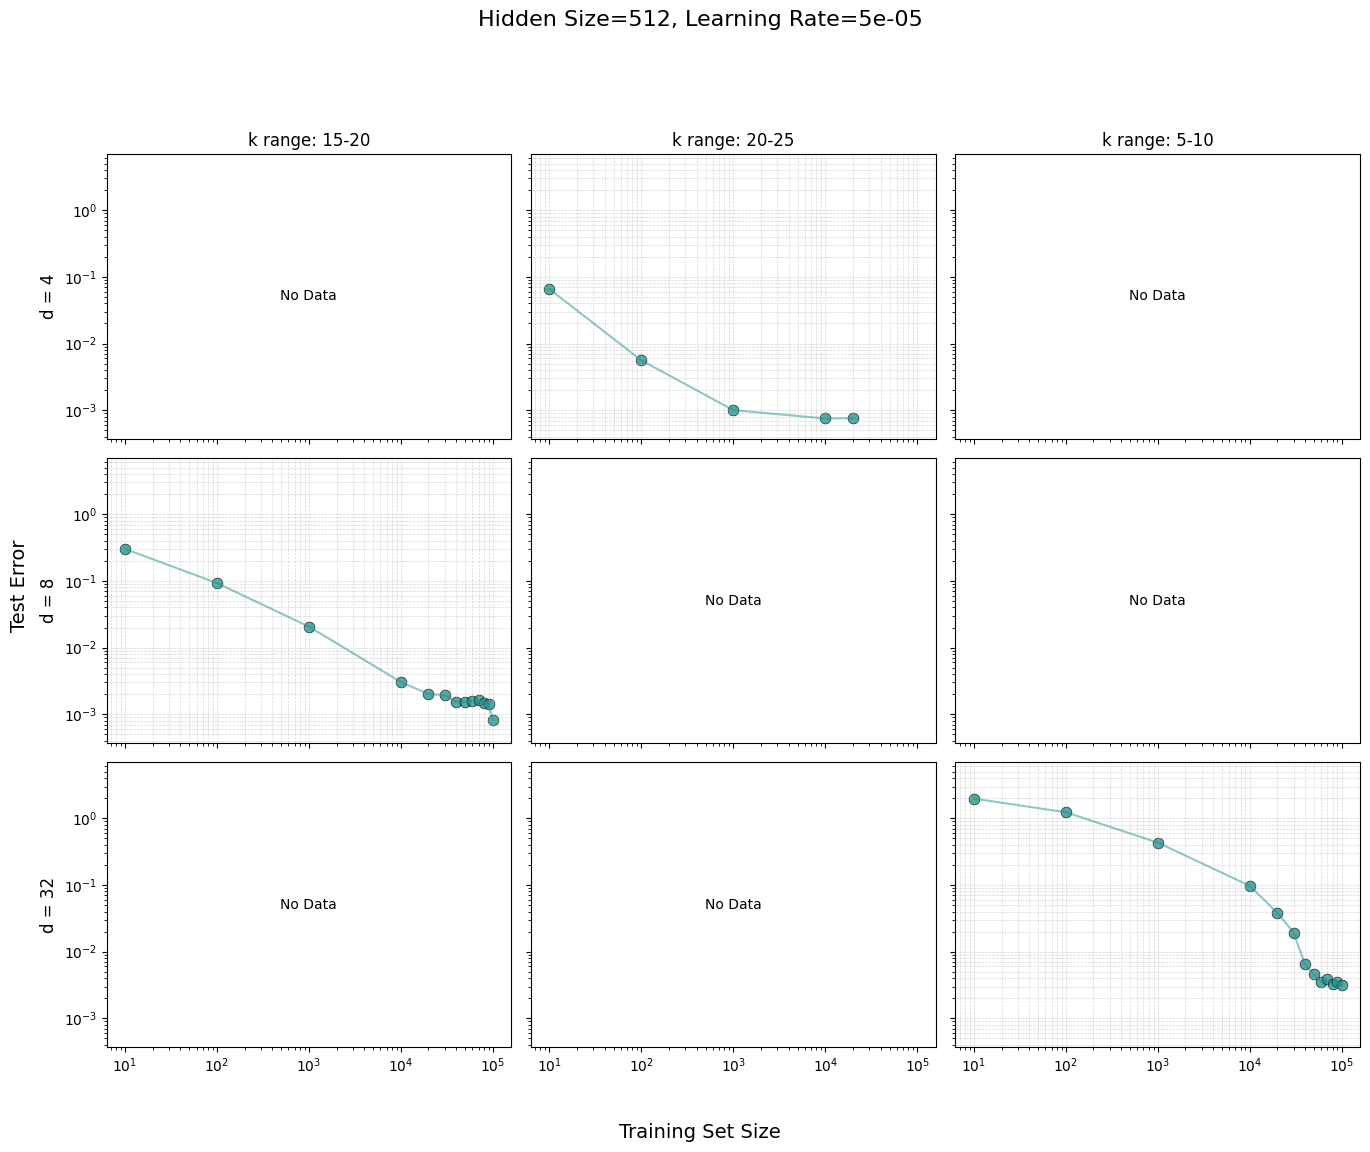

Creating grid for LR=0.0001, Hidden Size=256
Dimensions: [np.int64(4), np.int64(8), np.int64(32)]
k-ranges: ['15-20', '20-25', '5-10']
  n_train=10 appears 2 times with errors: [0.5697011947631836, 0.1065298393368721]
  n_train=100 appears 2 times with errors: [0.13046644628047943, 0.03611968830227852]
  n_train=1000 appears 2 times with errors: [0.025219609960913658, 0.005126671399921179]
  n_train=10000 appears 2 times with errors: [0.001031103078275919, 0.0005848718574270606]
  n_train=20000 appears 2 times with errors: [0.0009954830165952444, 0.0005851780297234654]
  n_train=30000 appears 2 times with errors: [0.0010029800469055772, 0.0005850649322383106]
  n_train=40000 appears 2 times with errors: [0.0010174501221626997, 0.0005916584050282836]
  n_train=50000 appears 2 times with errors: [0.0010142240207642317, 0.000585039786528796]
  n_train=60000 appears 2 times with errors: [0.0010252316715195775, 0.0005849834997206926]
  n_train=70000 appears 2 times with errors: [0.000990943

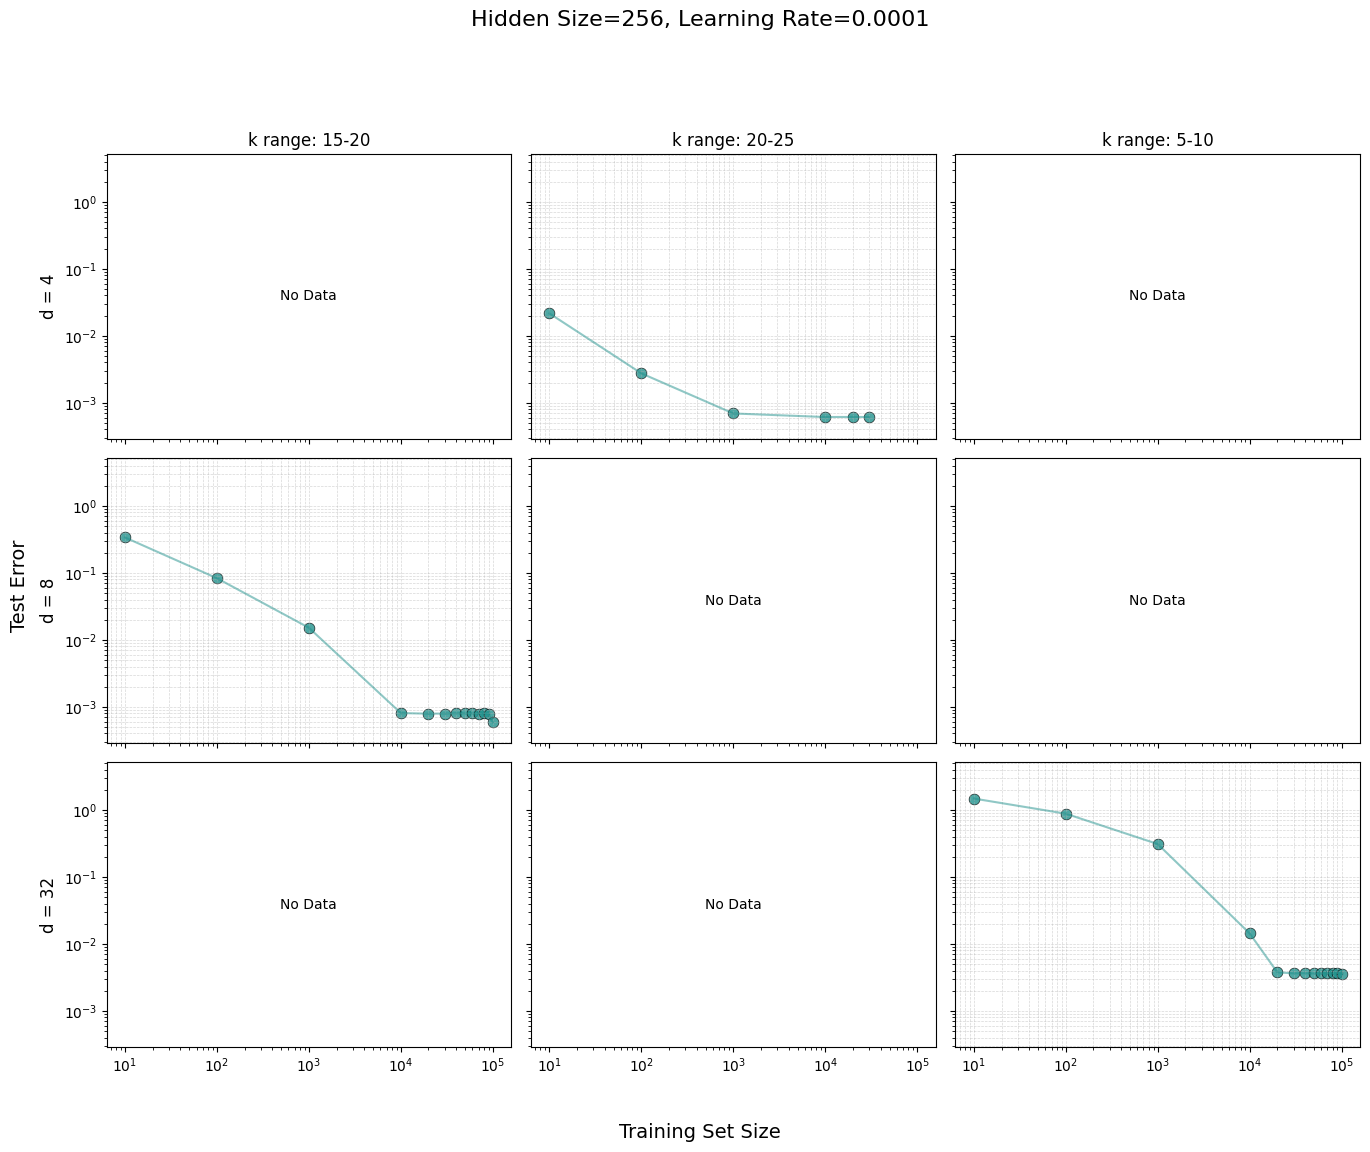

Creating grid for LR=0.0001, Hidden Size=512
Dimensions: [np.int64(4), np.int64(8), np.int64(32)]
k-ranges: ['15-20', '20-25', '5-10']
  n_train=10 appears 2 times with errors: [0.4802168309688568, 0.09141404181718826]
  n_train=100 appears 2 times with errors: [0.14213475584983826, 0.033118270337581635]
  n_train=1000 appears 2 times with errors: [0.02984008938074112, 0.0074850162491202354]
  n_train=10000 appears 2 times with errors: [0.005676301661878824, 0.0008252899860963225]
  n_train=20000 appears 2 times with errors: [0.0038676843978464603, 0.0008251234539784491]
  n_train=30000 appears 2 times with errors: [0.0035910499282181263, 0.0008255174034275115]
  n_train=40000 appears 2 times with errors: [0.0026088044978678226, 0.0008253134437836707]
  n_train=50000 appears 2 times with errors: [0.002441059099510312, 0.0008609116193838418]
  n_train=60000 appears 2 times with errors: [0.0022700028494000435, 0.0008255565771833062]
  n_train=70000 appears 2 times with errors: [0.0026657

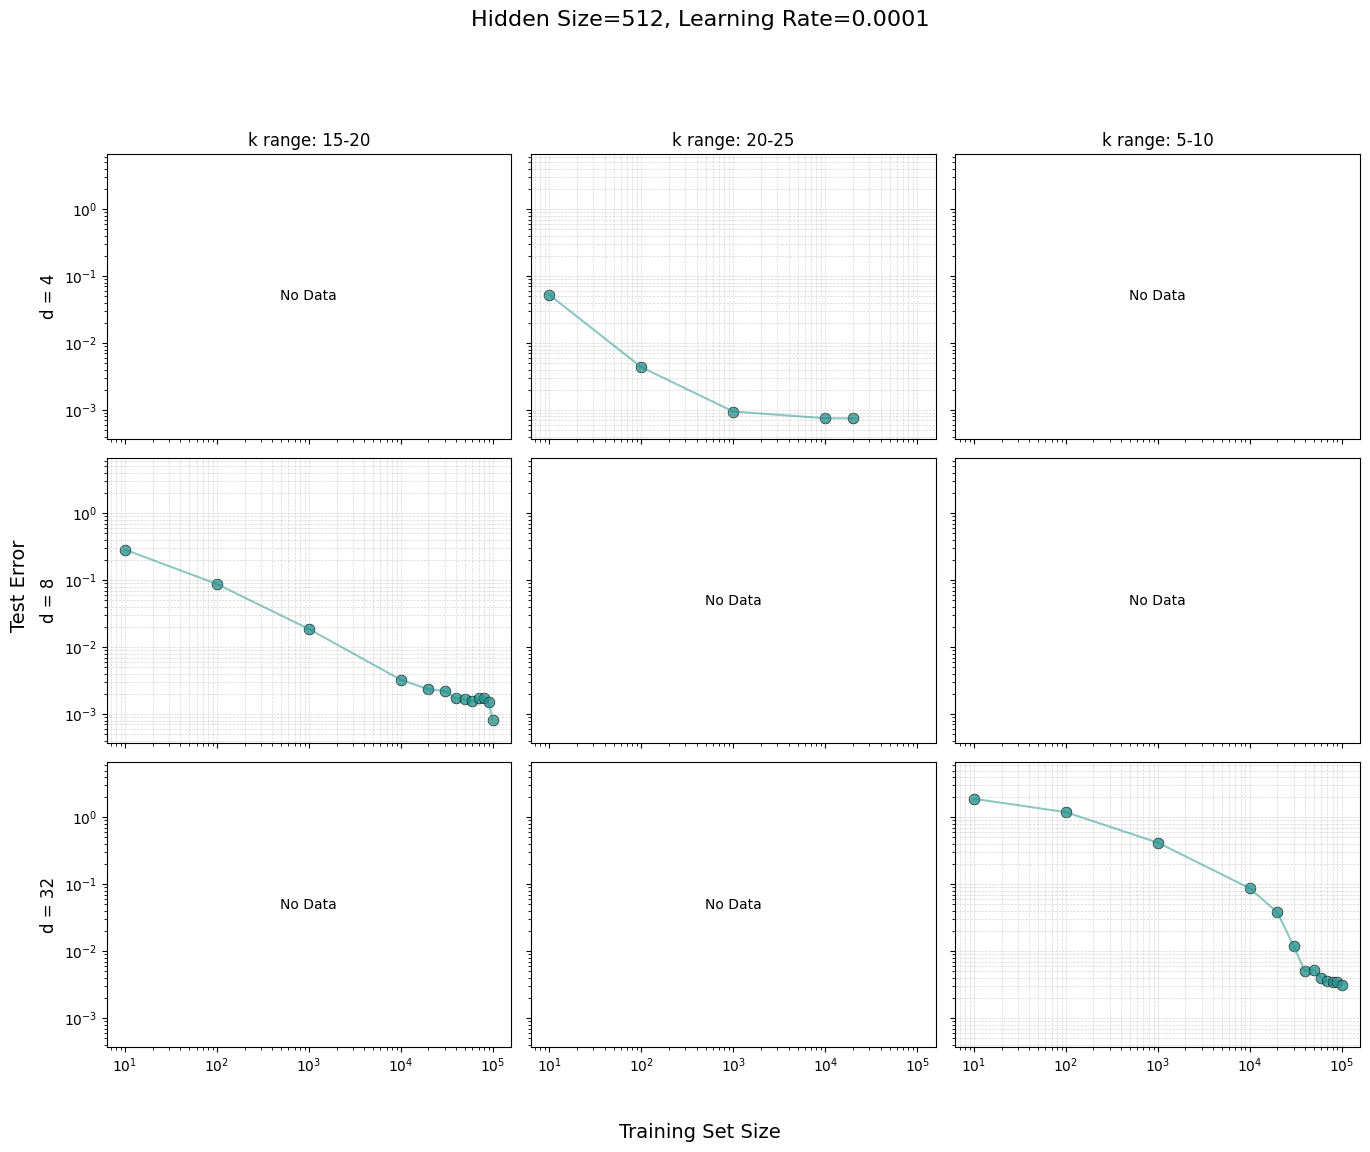

Creating grid for LR=0.0005, Hidden Size=256
Dimensions: [np.int64(4), np.int64(8), np.int64(32)]
k-ranges: ['15-20', '20-25', '5-10']
  n_train=10 appears 2 times with errors: [0.5283775925636292, 0.036778878420591354]
  n_train=100 appears 2 times with errors: [0.10474070906639099, 0.012967524118721485]
  n_train=1000 appears 2 times with errors: [0.018633106723427773, 0.0018143921624869108]
  n_train=10000 appears 2 times with errors: [0.0009631893481127918, 0.0005848740693181753]
  n_train=20000 appears 2 times with errors: [0.0009633617009967566, 0.0005849362351000309]
  n_train=30000 appears 2 times with errors: [0.0009631918510422111, 0.0005849676090292633]
  n_train=40000 appears 2 times with errors: [0.0009663284290581942, 0.0005847535794600844]
  n_train=50000 appears 2 times with errors: [0.0009637291077524424, 0.0005850812885910273]
  n_train=60000 appears 2 times with errors: [0.0009659127099439502, 0.0005848793662153184]
  n_train=70000 appears 2 times with errors: [0.000

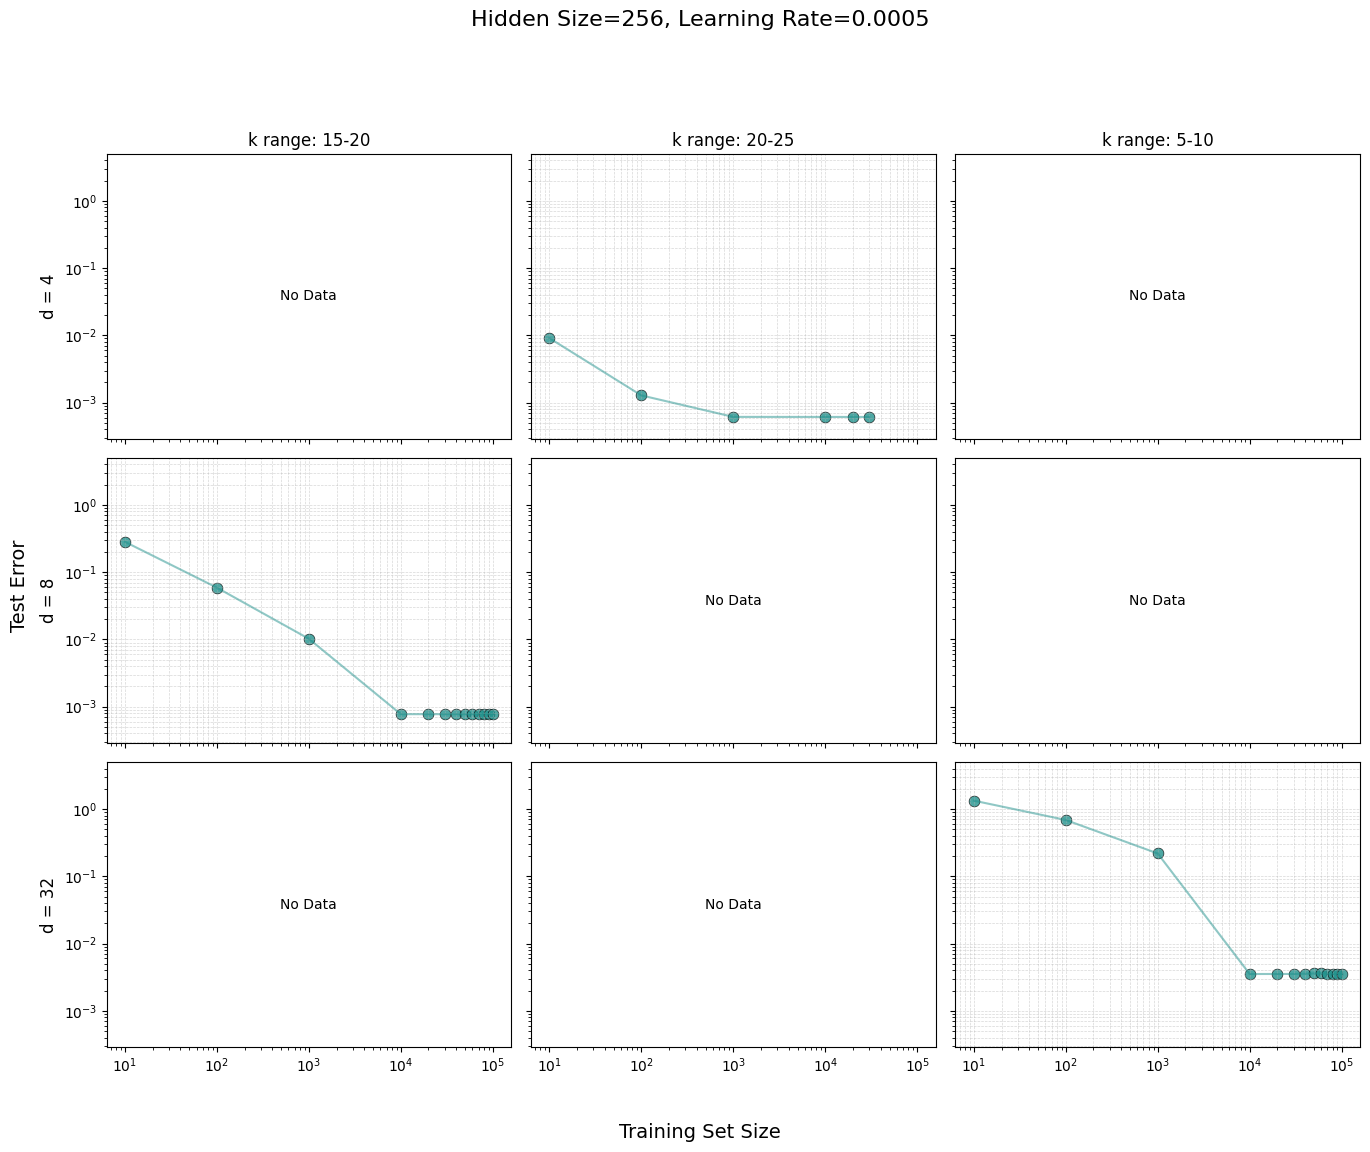

Creating grid for LR=0.0005, Hidden Size=512
Dimensions: [np.int64(4), np.int64(8), np.int64(32)]
k-ranges: ['15-20', '20-25', '5-10']
  n_train=10 appears 2 times with errors: [0.39136648178100586, 0.042609911412000656]
  n_train=100 appears 2 times with errors: [0.1178245022892952, 0.009334854781627655]
  n_train=1000 appears 2 times with errors: [0.022762726992368698, 0.001610192353837192]
  n_train=10000 appears 2 times with errors: [0.004922326188534498, 0.0008252483676187694]
  n_train=20000 appears 2 times with errors: [0.0036886362358927727, 0.0008255420252680779]
  n_train=30000 appears 2 times with errors: [0.002873352263122797, 0.0008254307904280722]
  n_train=40000 appears 2 times with errors: [0.002571068936958909, 0.0008252653060480952]
  n_train=50000 appears 2 times with errors: [0.0029873906169086695, 0.0008257202571257949]
  n_train=60000 appears 2 times with errors: [0.002904461231082678, 0.000825249298941344]
  n_train=70000 appears 2 times with errors: [0.002509918

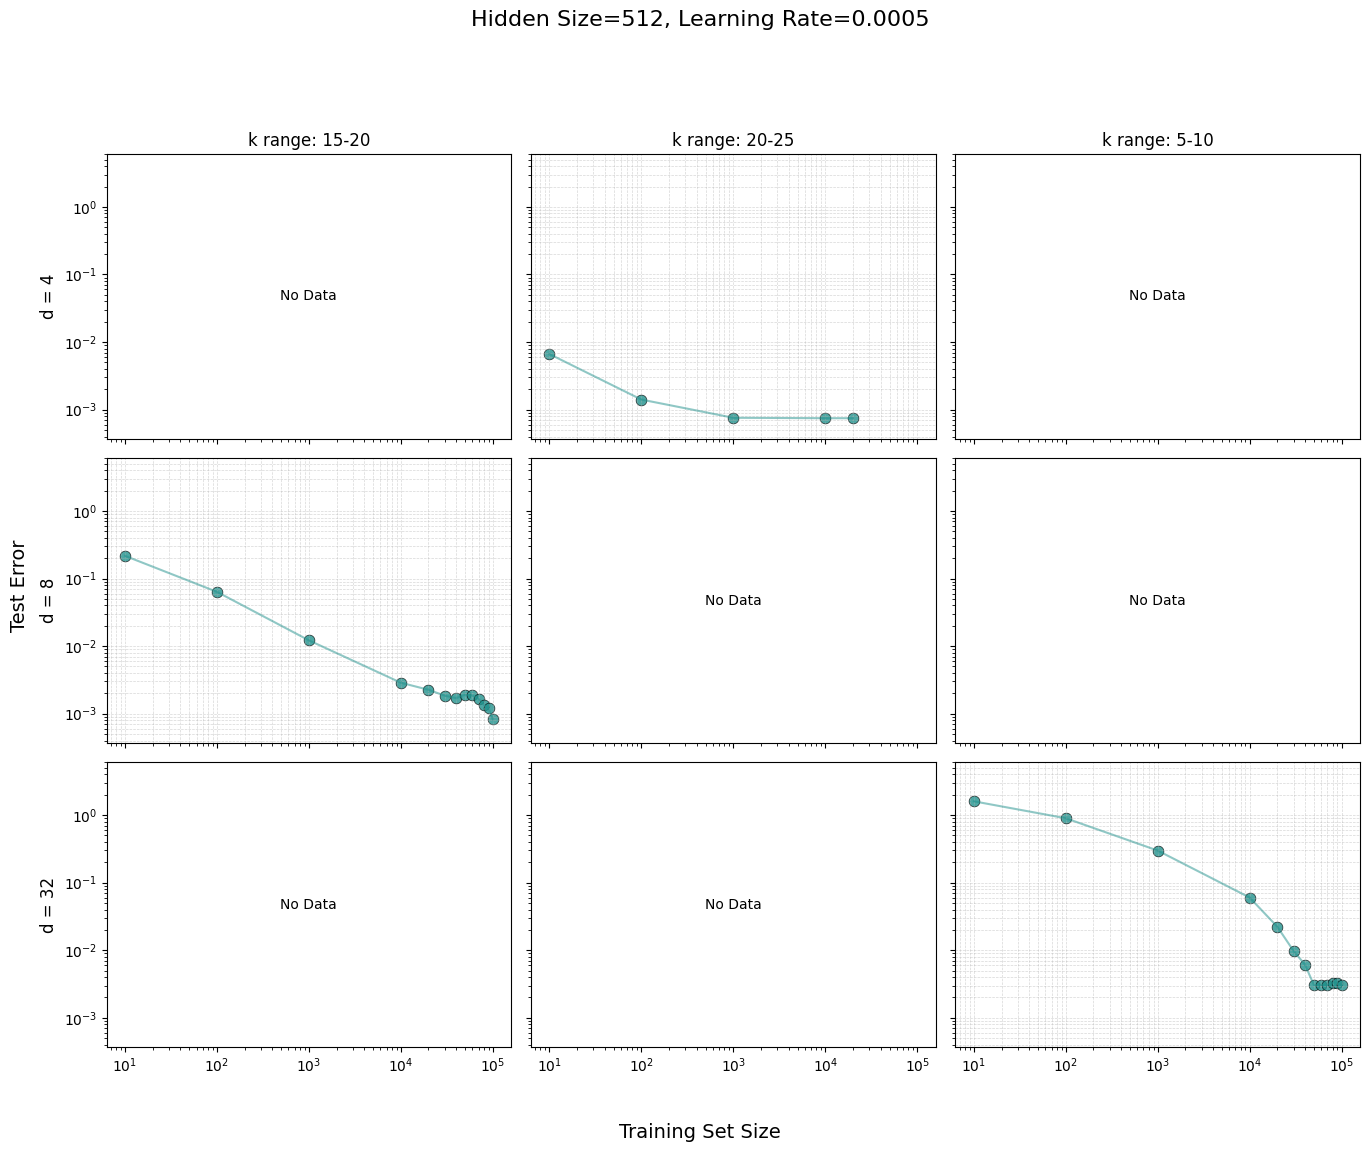

Creating grid for LR=0.001, Hidden Size=256
Dimensions: [np.int64(4), np.int64(8), np.int64(32)]
k-ranges: ['15-20', '20-25', '5-10']
  n_train=10 appears 2 times with errors: [0.46889519691467285, 0.013010942377150059]
  n_train=100 appears 2 times with errors: [0.08484078198671341, 0.005162570159882307]
  n_train=1000 appears 2 times with errors: [0.014146084897220135, 0.0006601409404538572]
  n_train=10000 appears 2 times with errors: [0.000963187834713608, 0.0005848270375281572]
  n_train=20000 appears 2 times with errors: [0.0009632838191464543, 0.0005852521862834692]
  n_train=30000 appears 2 times with errors: [0.0009632025030441582, 0.0005849232547916472]
  n_train=40000 appears 2 times with errors: [0.0009632800938561559, 0.000590008741710335]
  n_train=50000 appears 2 times with errors: [0.0009632160654291511, 0.0005850844318047166]
  n_train=60000 appears 2 times with errors: [0.0009636897593736649, 0.0005903532146476209]
  n_train=70000 appears 2 times with errors: [0.00096

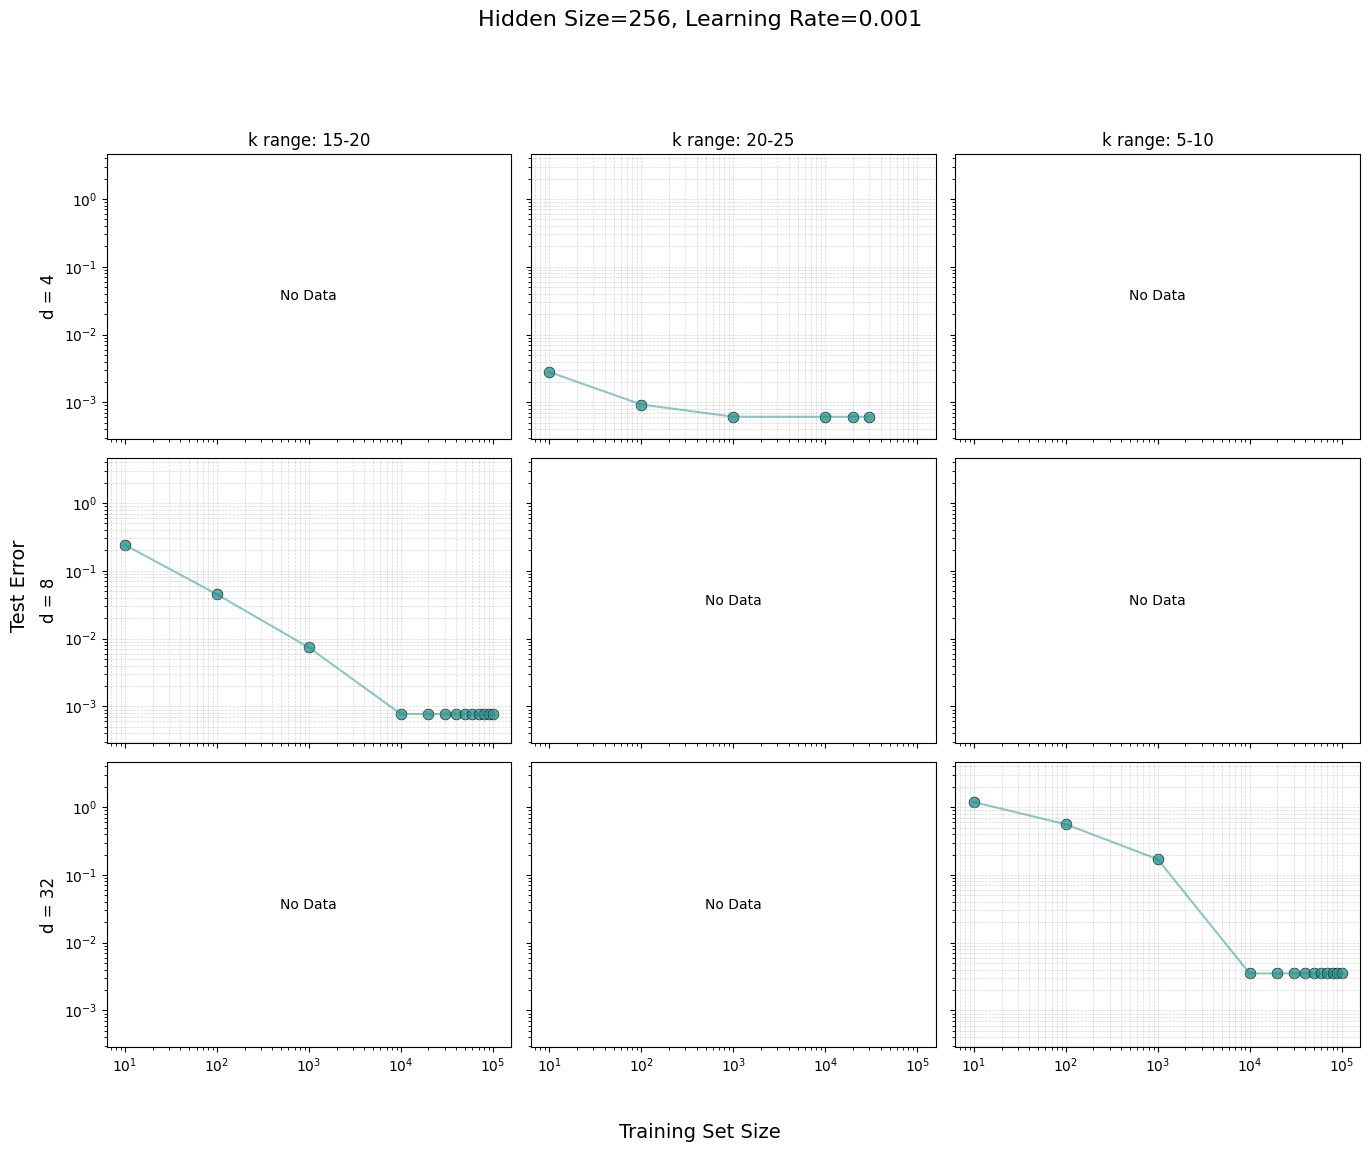

Creating grid for LR=0.001, Hidden Size=512
Dimensions: [np.int64(4), np.int64(8), np.int64(32)]
k-ranges: ['15-20', '20-25', '5-10']
  n_train=10 appears 2 times with errors: [0.37778767943382263, 0.017204932868480682]
  n_train=100 appears 2 times with errors: [0.10240355879068375, 0.0026063250843435526]
  n_train=1000 appears 2 times with errors: [0.01665802299976349, 0.0008737703901715577]
  n_train=10000 appears 2 times with errors: [0.0015941036399453878, 0.0008252644329331815]
  n_train=20000 appears 2 times with errors: [0.0015939637087285519, 0.0008251660037785769]
  n_train=30000 appears 2 times with errors: [0.0015939937438815832, 0.0008253312553279102]
  n_train=40000 appears 2 times with errors: [0.0015946668572723866, 0.0008268384262919426]
  n_train=50000 appears 2 times with errors: [0.001595997833646834, 0.0008257221197709441]
  n_train=60000 appears 2 times with errors: [0.0015943381004035473, 0.0008286623633466661]
  n_train=70000 appears 2 times with errors: [0.0015

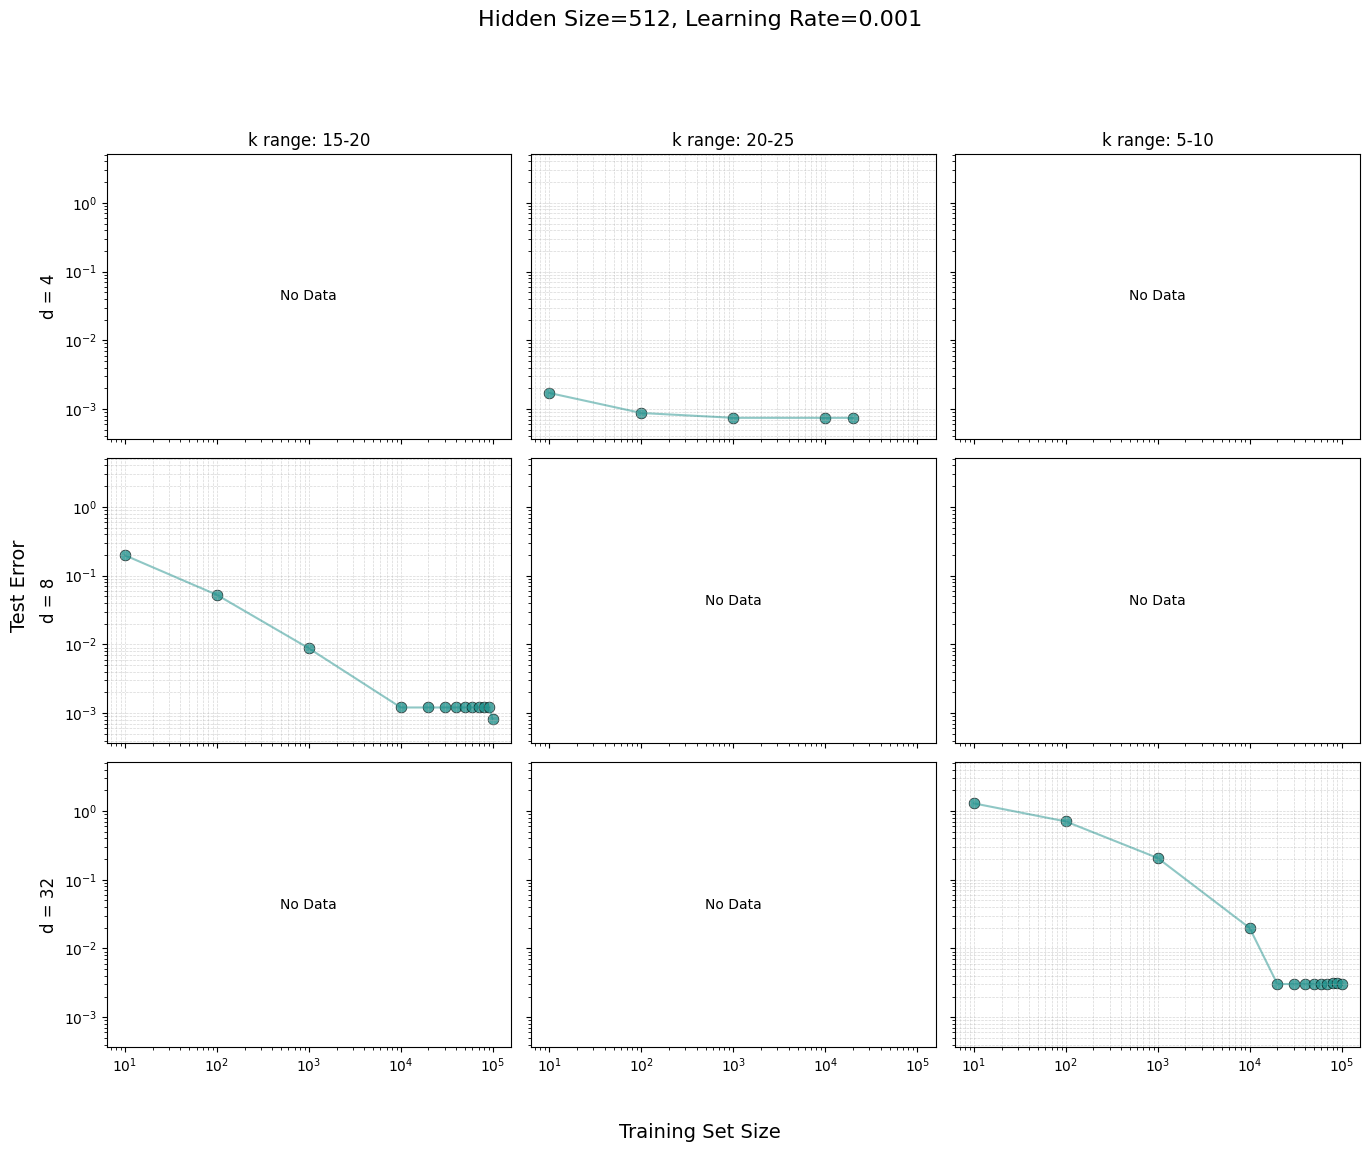

Creating grid for LR=5e-05, Depth=2
Dimensions: [np.int64(8), np.int64(32)]
k-ranges: ['15-20', '5-10']
  n_train=10 appears 2 times with errors: [0.5719704031944275, 0.5069945454597473]
  n_train=100 appears 2 times with errors: [0.13433794677257538, 0.14608575403690338]
  n_train=1000 appears 2 times with errors: [0.025438815355300903, 0.03205078840255737]
  n_train=10000 appears 2 times with errors: [0.0016173258190974593, 0.004820764530450106]
  n_train=20000 appears 2 times with errors: [0.00128322618547827, 0.003107708180323243]
  n_train=30000 appears 2 times with errors: [0.0011931555345654488, 0.003054362488910556]
  n_train=40000 appears 2 times with errors: [0.0012112883850932121, 0.002259073546156287]
  n_train=50000 appears 2 times with errors: [0.0011936650844290853, 0.0022404412738978863]
  n_train=60000 appears 2 times with errors: [0.0011969665065407753, 0.00234229676425457]
  n_train=70000 appears 2 times with errors: [0.0011569354683160782, 0.0024871760979294777]
  n

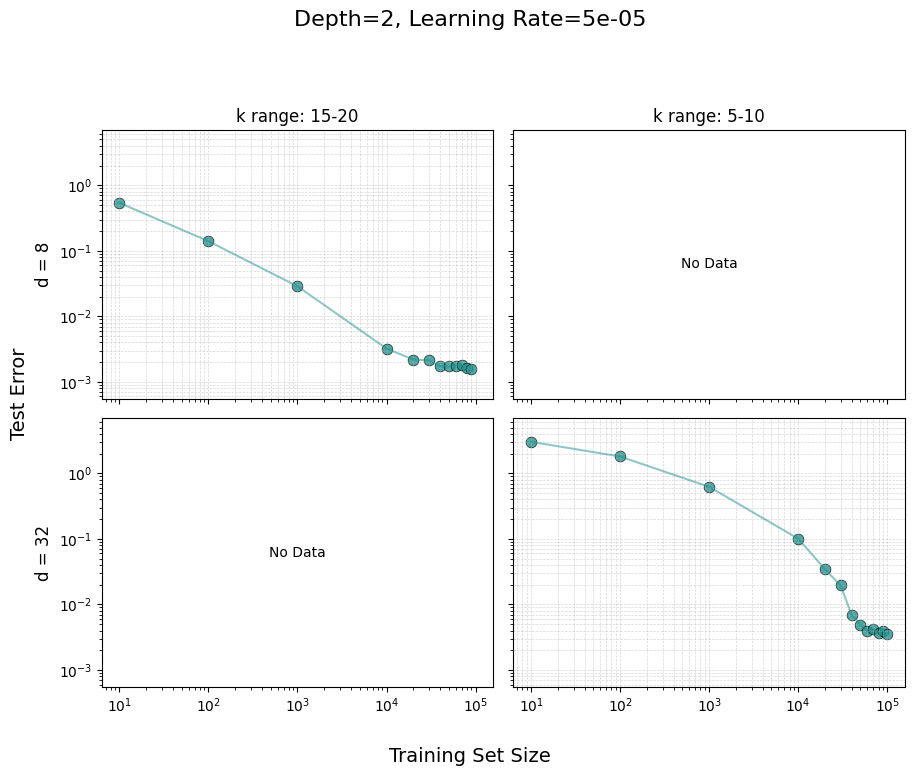

Creating grid for LR=5e-05, Depth=4
Dimensions: [np.int64(4), np.int64(8), np.int64(32)]
k-ranges: ['15-20', '20-25', '5-10']
  n_train=10 appears 2 times with errors: [0.02462560497224331, 0.0657324567437172]
  n_train=100 appears 2 times with errors: [0.0035086909774690866, 0.005600220523774624]
  n_train=1000 appears 2 times with errors: [0.0007653218926861882, 0.0010018555913120508]
  n_train=10000 appears 2 times with errors: [0.0006125004729256034, 0.0007522212690673769]
  n_train=20000 appears 2 times with errors: [0.000612966890912503, 0.0007582486141473055]
  Aggregating duplicate points by averaging test errors
  n_train=10 appears 2 times with errors: [0.13443535566329956, 0.09863779693841934]
  n_train=100 appears 2 times with errors: [0.0412168987095356, 0.039876461029052734]
  n_train=1000 appears 2 times with errors: [0.007231052499264479, 0.009302632883191109]
  n_train=10000 appears 2 times with errors: [0.0005848462460562587, 0.001279564923606813]
  n_train=20000 appe

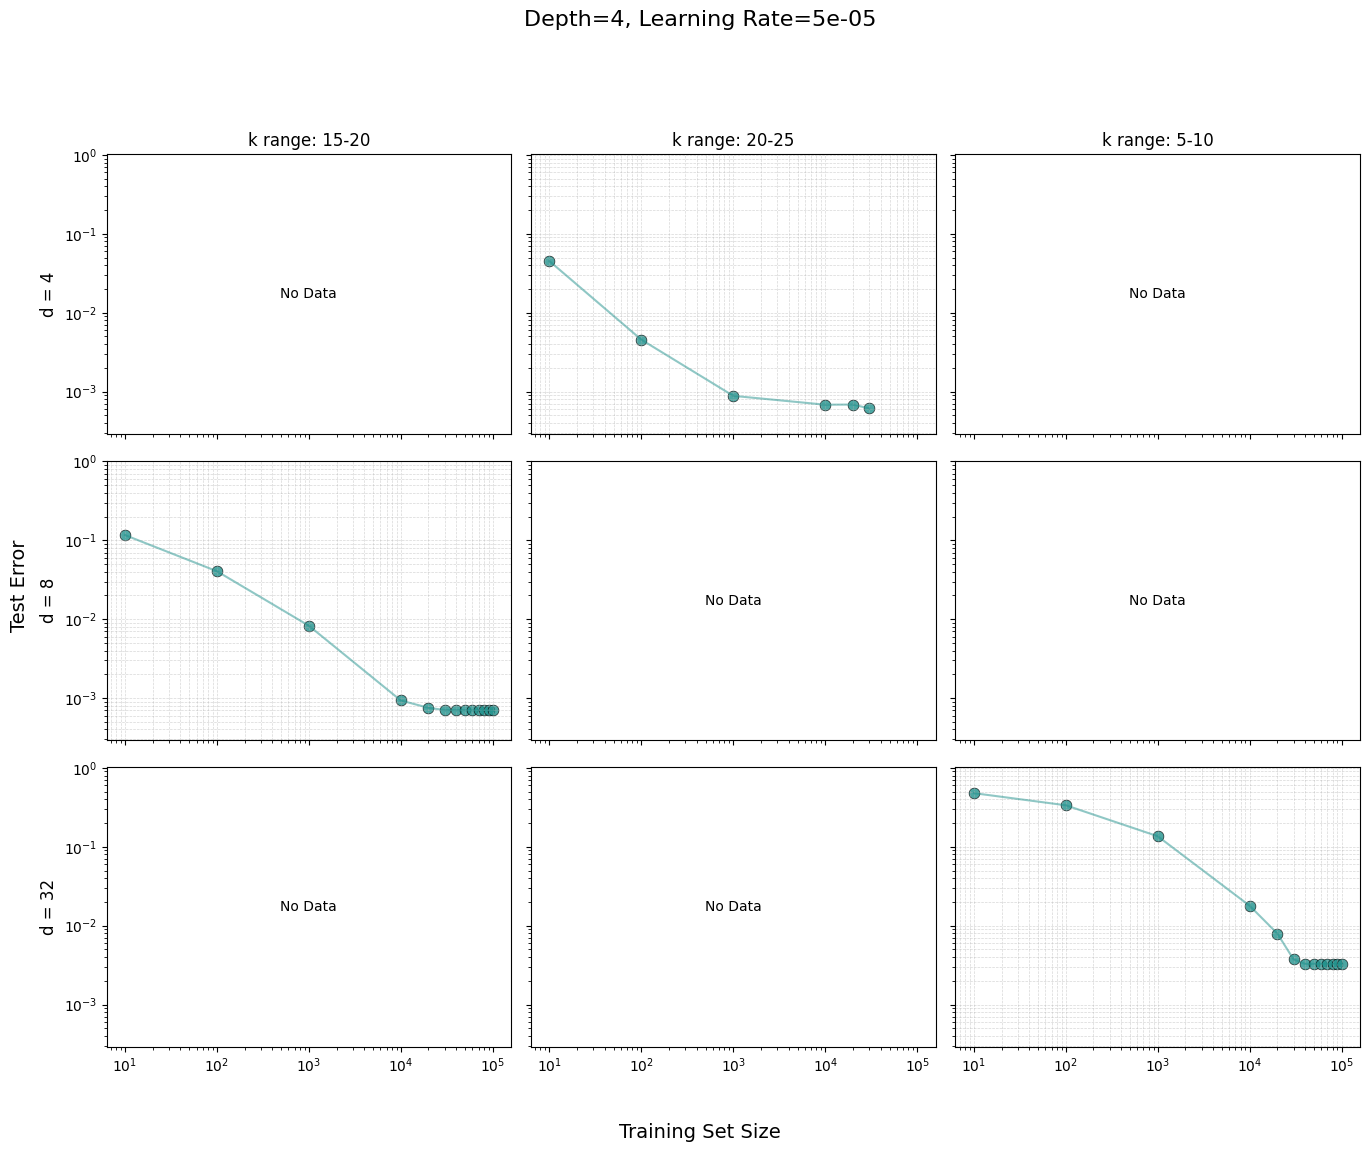

Creating grid for LR=0.0001, Depth=2
Dimensions: [np.int64(8), np.int64(32)]
k-ranges: ['15-20', '5-10']
  n_train=10 appears 2 times with errors: [0.5697011947631836, 0.4802168309688568]
  n_train=100 appears 2 times with errors: [0.13046644628047943, 0.14213475584983826]
  n_train=1000 appears 2 times with errors: [0.025219609960913658, 0.02984008938074112]
  n_train=10000 appears 2 times with errors: [0.001031103078275919, 0.005676301661878824]
  n_train=20000 appears 2 times with errors: [0.0009954830165952444, 0.0038676843978464603]
  n_train=30000 appears 2 times with errors: [0.0010029800469055772, 0.0035910499282181263]
  n_train=40000 appears 2 times with errors: [0.0010174501221626997, 0.0026088044978678226]
  n_train=50000 appears 2 times with errors: [0.0010142240207642317, 0.002441059099510312]
  n_train=60000 appears 2 times with errors: [0.0010252316715195775, 0.0022700028494000435]
  n_train=70000 appears 2 times with errors: [0.000990943401120603, 0.0026657592970877886

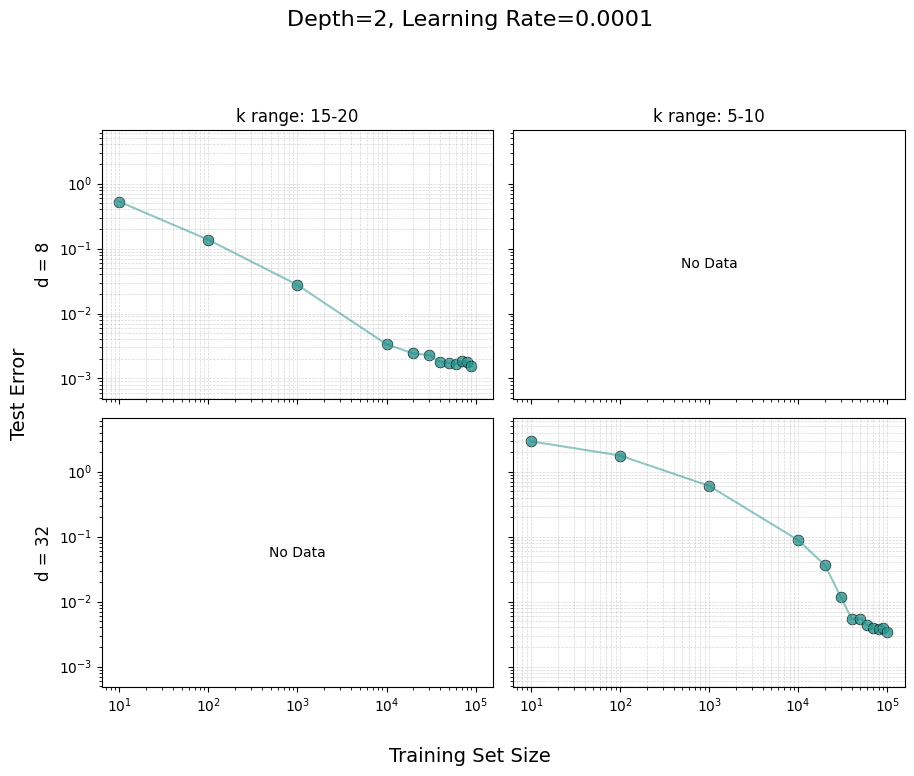

Creating grid for LR=0.0001, Depth=4
Dimensions: [np.int64(4), np.int64(8), np.int64(32)]
k-ranges: ['15-20', '20-25', '5-10']
  n_train=10 appears 2 times with errors: [0.021616289392113686, 0.052516140043735504]
  n_train=100 appears 2 times with errors: [0.002750988118350506, 0.004360476974397898]
  n_train=1000 appears 2 times with errors: [0.0006926407804712653, 0.0009486684575676918]
  n_train=10000 appears 2 times with errors: [0.0006125126965343952, 0.0007529909489676356]
  n_train=20000 appears 2 times with errors: [0.0006143788923509419, 0.0007494529709219933]
  Aggregating duplicate points by averaging test errors
  n_train=10 appears 2 times with errors: [0.1065298393368721, 0.09141404181718826]
  n_train=100 appears 2 times with errors: [0.03611968830227852, 0.033118270337581635]
  n_train=1000 appears 2 times with errors: [0.005126671399921179, 0.0074850162491202354]
  n_train=10000 appears 2 times with errors: [0.0005848718574270606, 0.0008252899860963225]
  n_train=2000

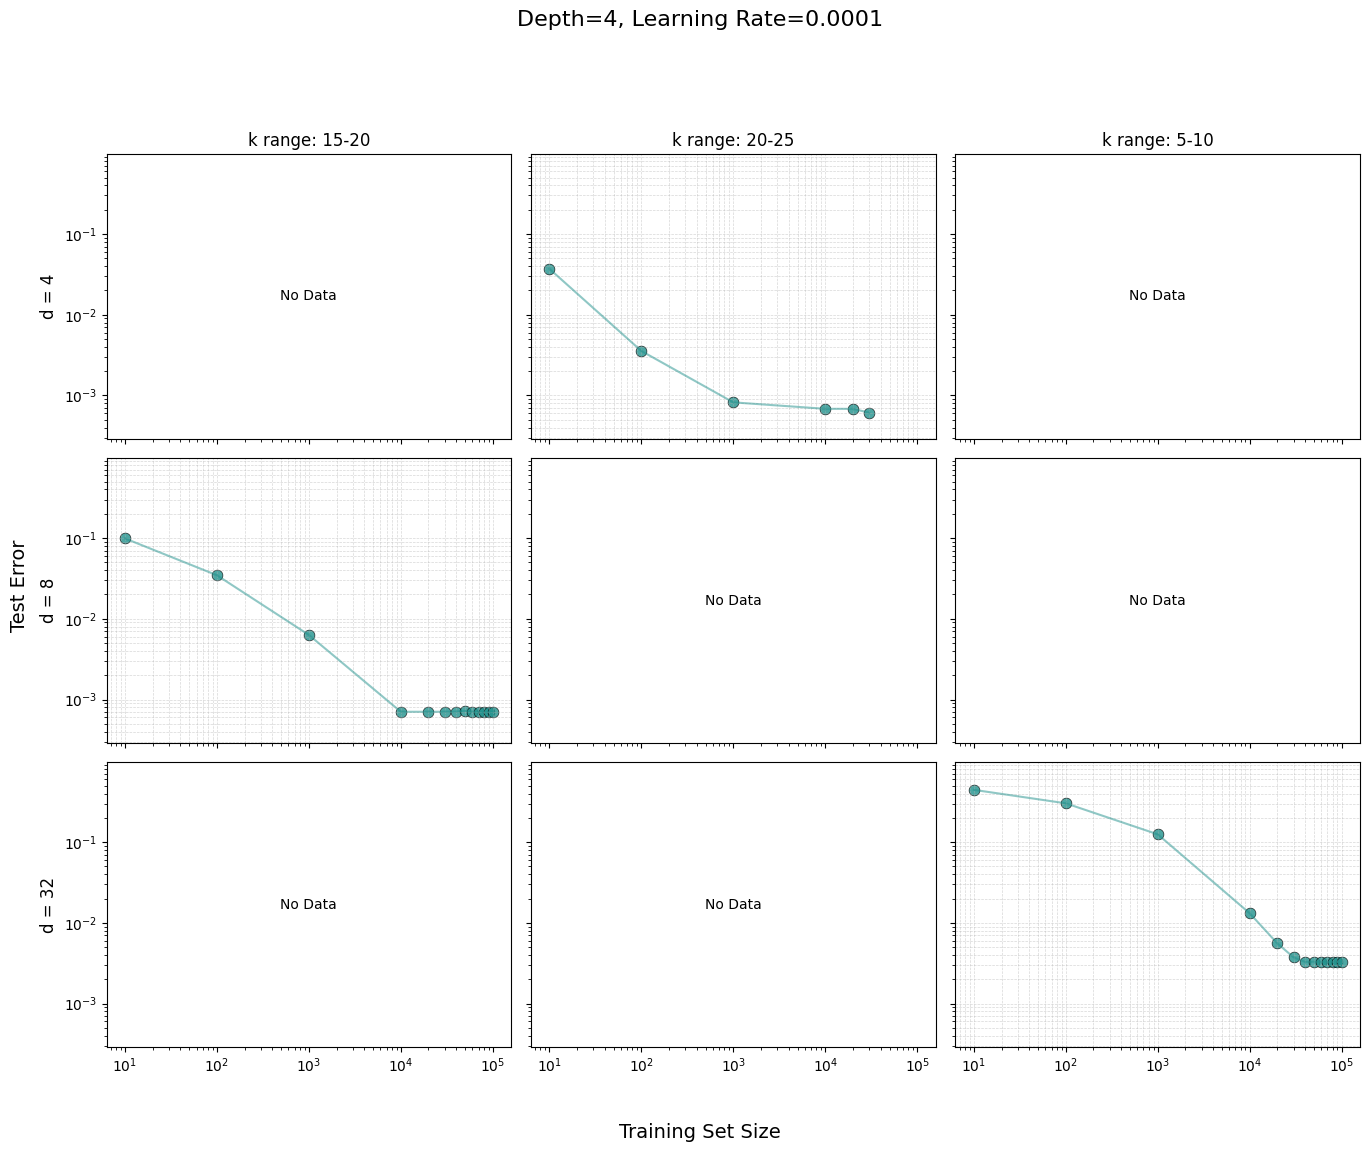

Creating grid for LR=0.0005, Depth=2
Dimensions: [np.int64(8), np.int64(32)]
k-ranges: ['15-20', '5-10']
  n_train=10 appears 2 times with errors: [0.5283775925636292, 0.39136648178100586]
  n_train=100 appears 2 times with errors: [0.10474070906639099, 0.1178245022892952]
  n_train=1000 appears 2 times with errors: [0.018633106723427773, 0.022762726992368698]
  n_train=10000 appears 2 times with errors: [0.0009631893481127918, 0.004922326188534498]
  n_train=20000 appears 2 times with errors: [0.0009633617009967566, 0.0036886362358927727]
  n_train=30000 appears 2 times with errors: [0.0009631918510422111, 0.002873352263122797]
  n_train=40000 appears 2 times with errors: [0.0009663284290581942, 0.002571068936958909]
  n_train=50000 appears 2 times with errors: [0.0009637291077524424, 0.0029873906169086695]
  n_train=60000 appears 2 times with errors: [0.0009659127099439502, 0.002904461231082678]
  n_train=70000 appears 2 times with errors: [0.0009632654837332666, 0.002509918995201587

Creating grid for LR=0.0005, Depth=4
Dimensions: [np.int64(4), np.int64(8), np.int64(32)]
k-ranges: ['15-20', '20-25', '5-10']
  n_train=10 appears 2 times with errors: [0.009098723530769348, 0.00664192670956254]
  n_train=100 appears 2 times with errors: [0.001280304859392345, 0.0014084905851632357]
  n_train=1000 appears 2 times with errors: [0.000613581680227071, 0.0007574223564006388]
  n_train=10000 appears 2 times with errors: [0.0006124971550889313, 0.0007462584180757403]
  n_train=20000 appears 2 times with errors: [0.0006124732899479568, 0.000746264704503119]
  Aggregating duplicate points by averaging test errors
  n_train=10 appears 2 times with errors: [0.036778878420591354, 0.042609911412000656]
  n_train=100 appears 2 times with errors: [0.012967524118721485, 0.009334854781627655]
  n_train=1000 appears 2 times with errors: [0.0018143921624869108, 0.001610192353837192]
  n_train=10000 appears 2 times with errors: [0.0005848740693181753, 0.0008252483676187694]
  n_train=20

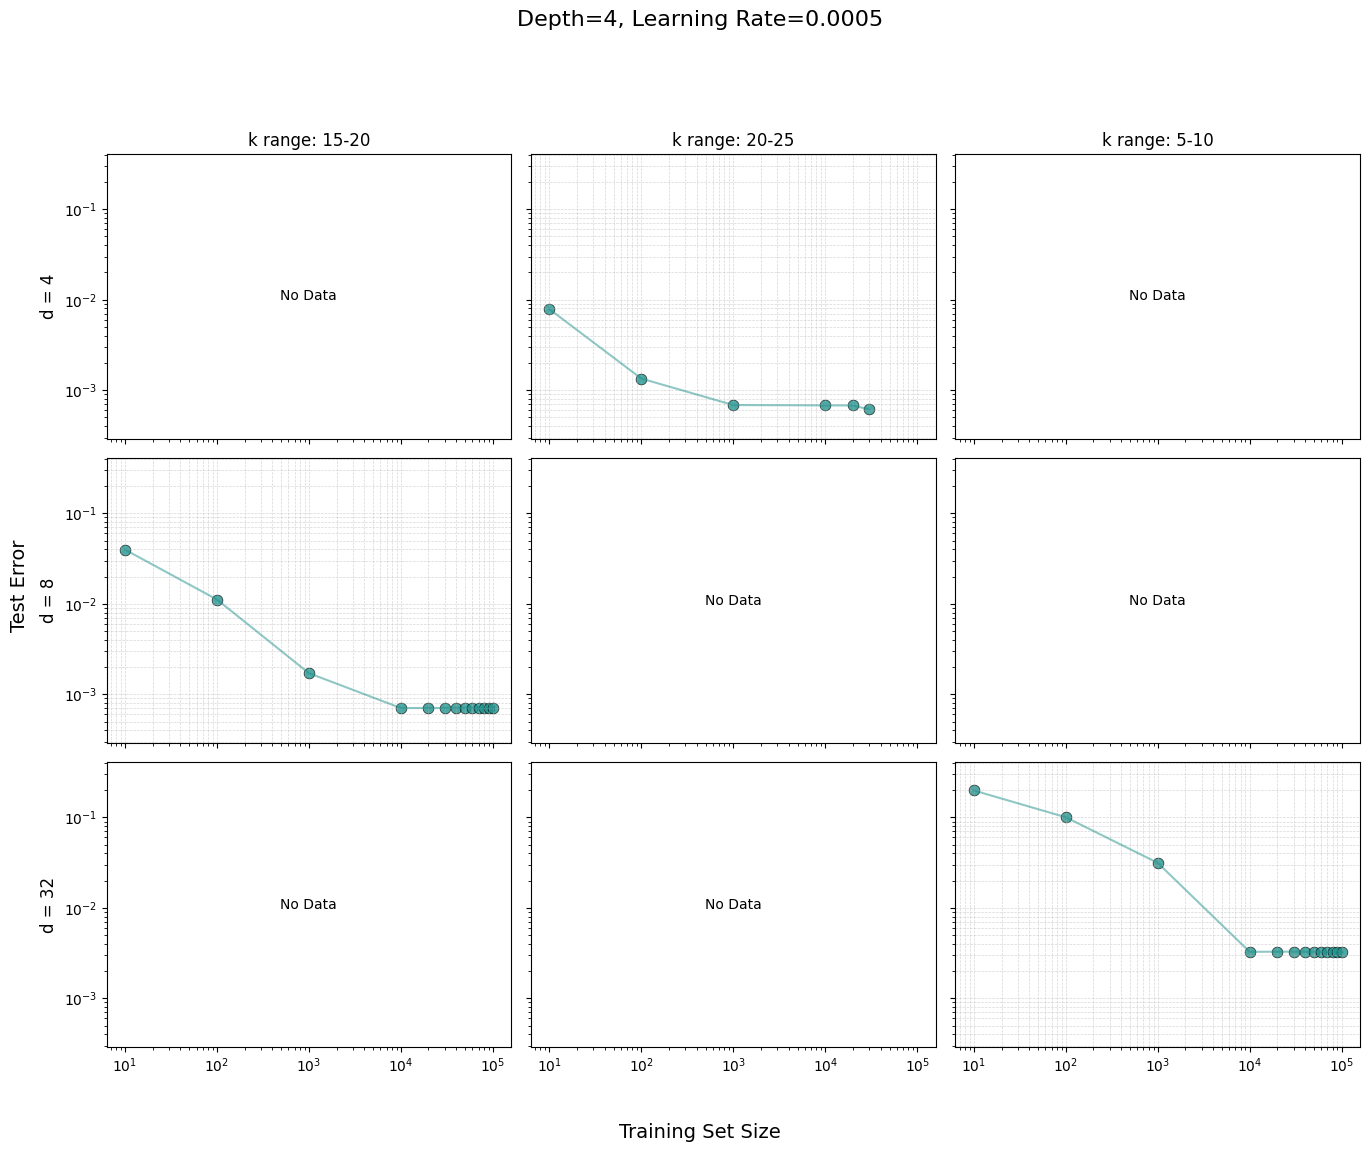

Creating grid for LR=0.001, Depth=2
Dimensions: [np.int64(8), np.int64(32)]
k-ranges: ['15-20', '5-10']
  n_train=10 appears 2 times with errors: [0.46889519691467285, 0.37778767943382263]
  n_train=100 appears 2 times with errors: [0.08484078198671341, 0.10240355879068375]
  n_train=1000 appears 2 times with errors: [0.014146084897220135, 0.01665802299976349]
  n_train=10000 appears 2 times with errors: [0.000963187834713608, 0.0015941036399453878]
  n_train=20000 appears 2 times with errors: [0.0009632838191464543, 0.0015939637087285519]
  n_train=30000 appears 2 times with errors: [0.0009632025030441582, 0.0015939937438815832]
  n_train=40000 appears 2 times with errors: [0.0009632800938561559, 0.0015946668572723866]
  n_train=50000 appears 2 times with errors: [0.0009632160654291511, 0.001595997833646834]
  n_train=60000 appears 2 times with errors: [0.0009636897593736649, 0.0015943381004035473]
  n_train=70000 appears 2 times with errors: [0.0009635379537940025, 0.0015950575470924

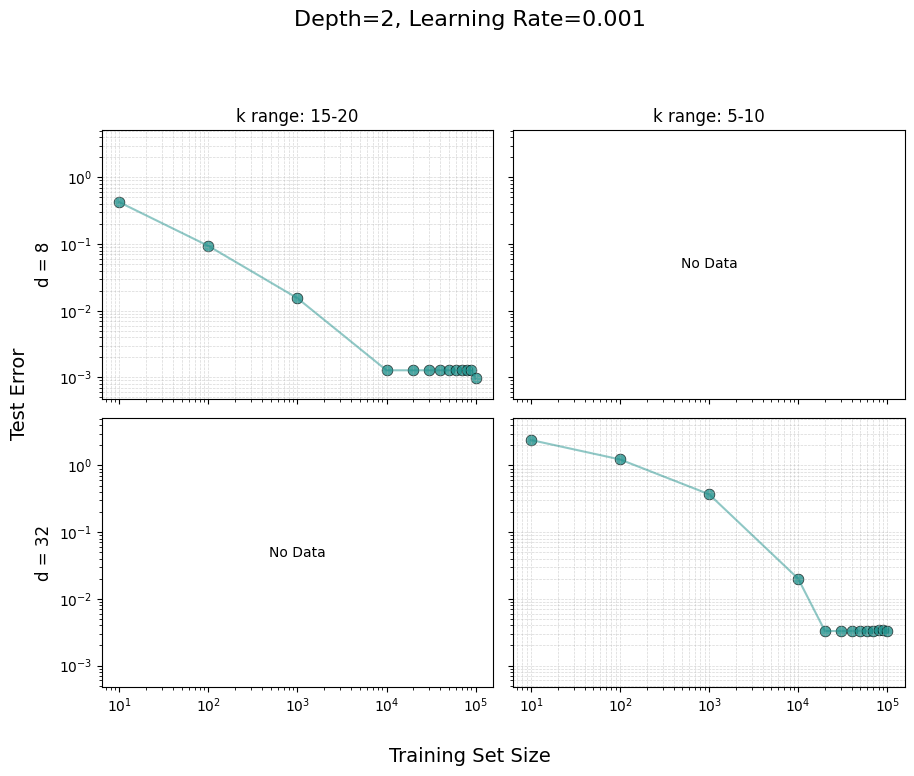

Creating grid for LR=0.001, Depth=4
Dimensions: [np.int64(4), np.int64(8), np.int64(32)]
k-ranges: ['15-20', '20-25', '5-10']
  n_train=10 appears 2 times with errors: [0.002795169362798333, 0.0017152827931568027]
  n_train=100 appears 2 times with errors: [0.0009288065484724939, 0.0008778627379797399]
  n_train=1000 appears 2 times with errors: [0.0006135812727734447, 0.0007468347321264446]
  n_train=10000 appears 2 times with errors: [0.0006125019863247871, 0.0007462325156666338]
  n_train=20000 appears 2 times with errors: [0.0006124766659922898, 0.0007462012581527233]
  Aggregating duplicate points by averaging test errors
  n_train=10 appears 2 times with errors: [0.013010942377150059, 0.017204932868480682]
  n_train=100 appears 2 times with errors: [0.005162570159882307, 0.0026063250843435526]
  n_train=1000 appears 2 times with errors: [0.0006601409404538572, 0.0008737703901715577]
  n_train=10000 appears 2 times with errors: [0.0005848270375281572, 0.0008252644329331815]
  n_tr

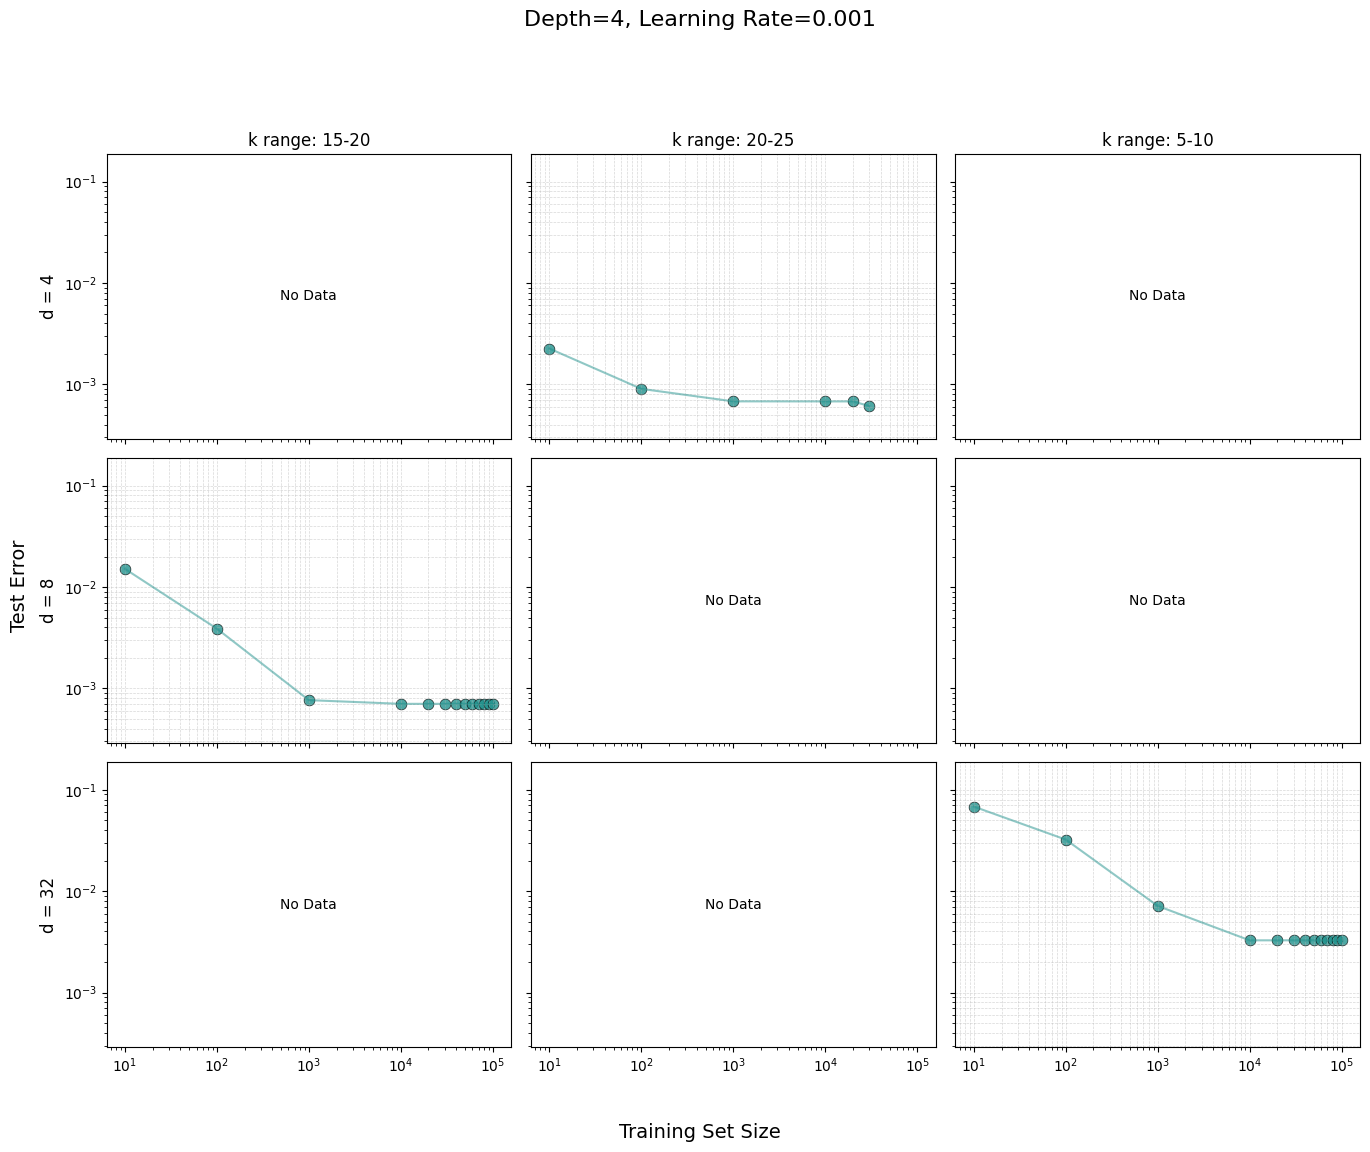

Aggregating data for heatmap...
Creating heatmap with 3 dimensions, 3 k-ranges, and 13 training sizes
Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n10.png


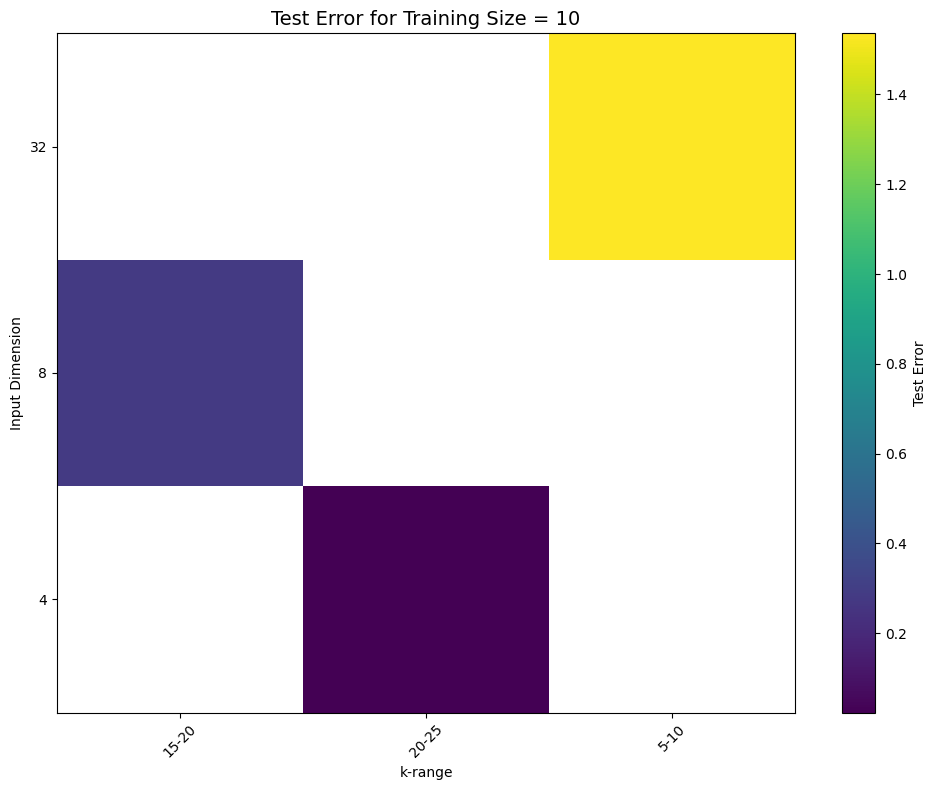

Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n100.png


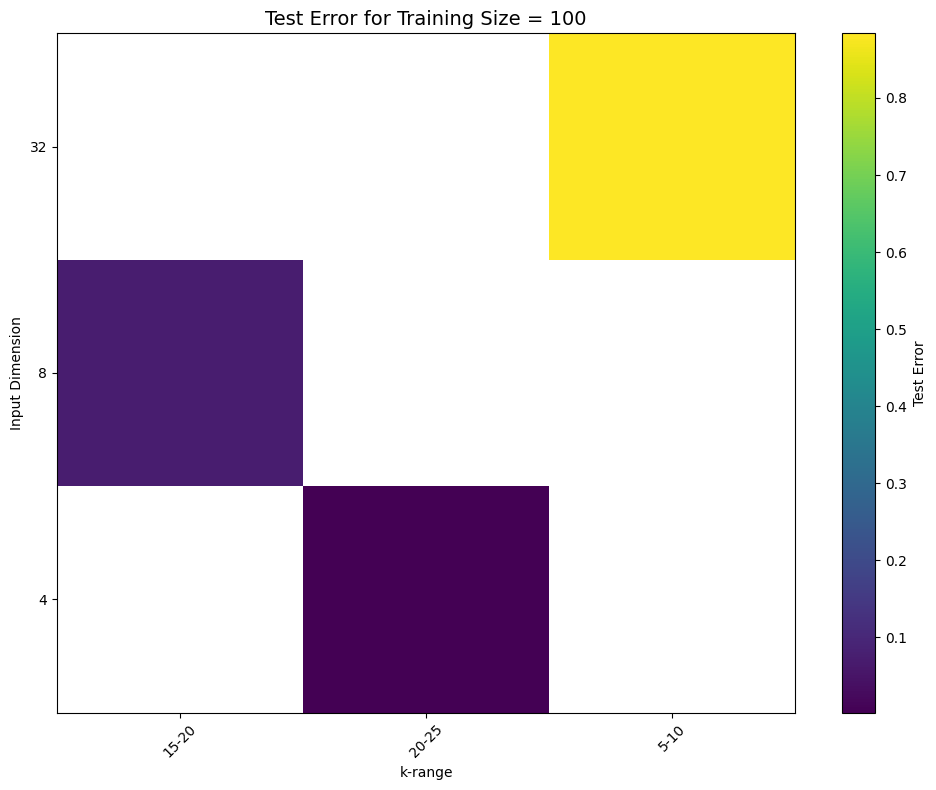

Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n1000.png


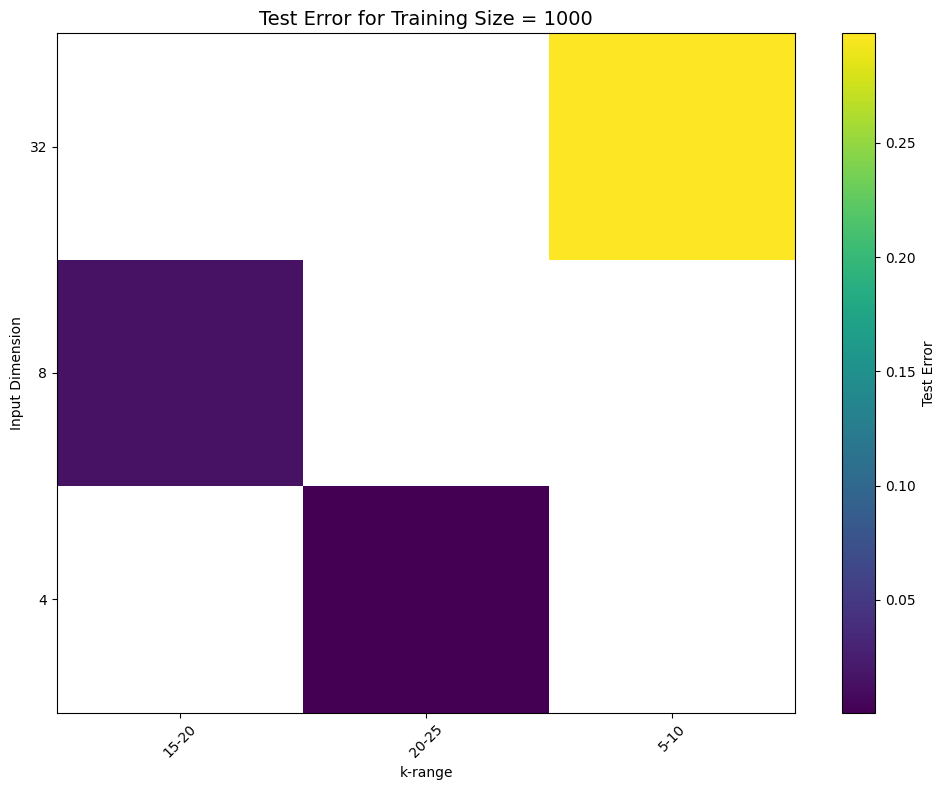

Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n10000.png


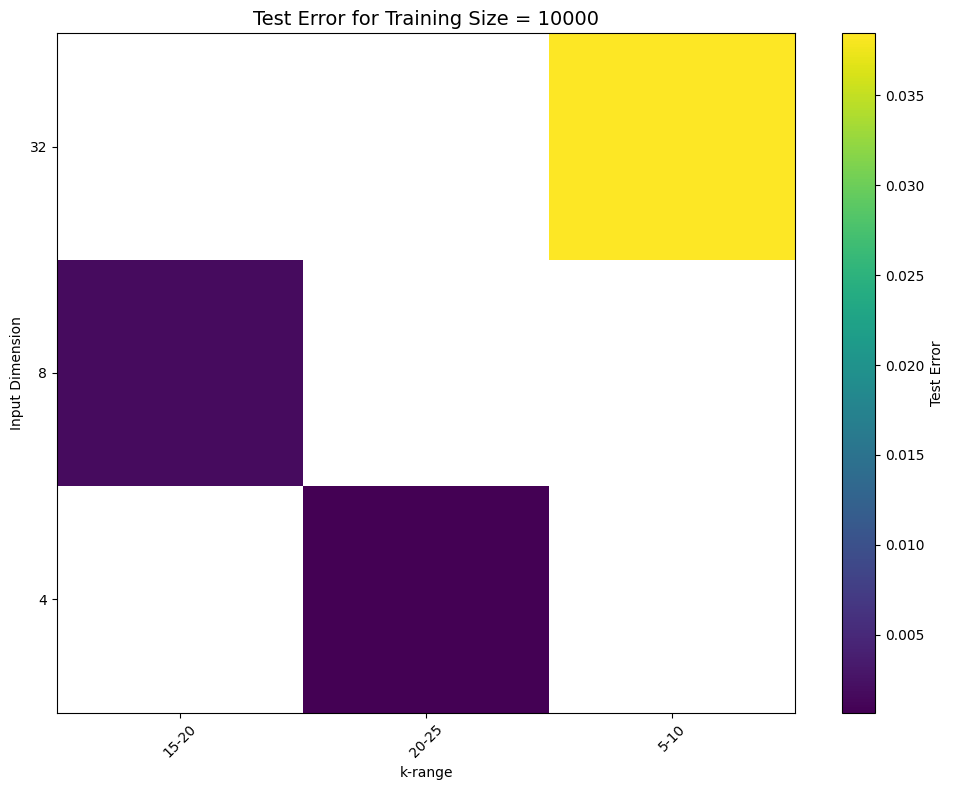

Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n20000.png


Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n30000.png


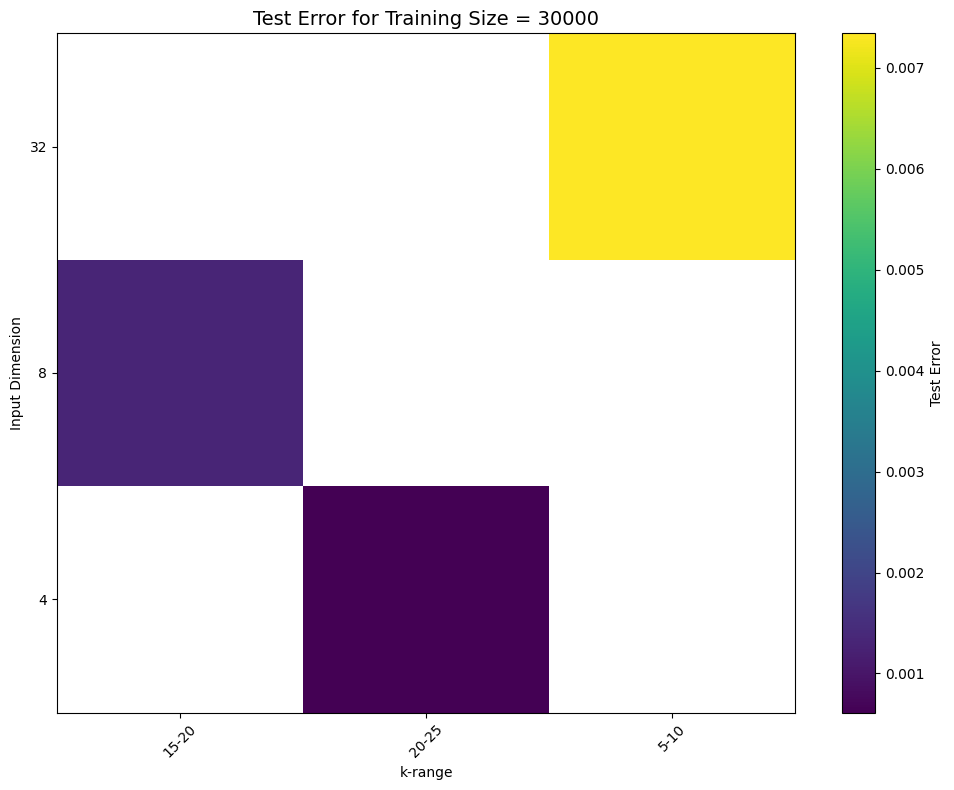

TypeError: Dimensions of C (2, 2) should be one smaller than X(4) and Y(4) while using shading='flat' see help(pcolormesh)

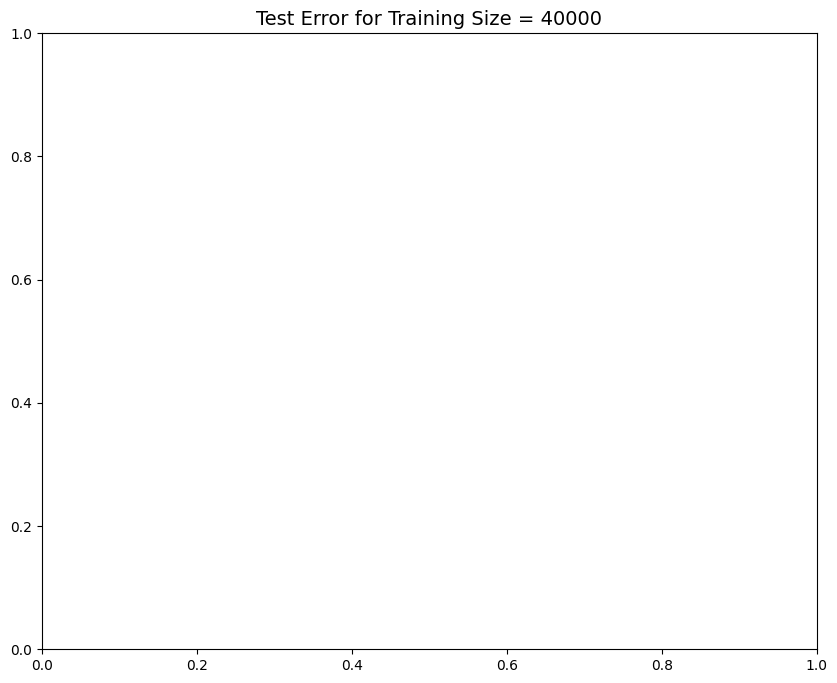

In [1]:
import os
import glob
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter

# Optional imports
try:
    import seaborn as sns
    SEABORN_AVAILABLE = True
except ImportError:
    SEABORN_AVAILABLE = False

# === Configuration ===
# Set the path to your results directory
results_dir = "/home/goring/NN_spherical_harmonics/results/HP_2403/sweep_full_exp_20250324"

# Set to True to save plots to files
save_plots = True
output_dir = "./result_plots_HP_grid"

# Create output directory if needed
if save_plots:
    os.makedirs(output_dir, exist_ok=True)

def load_results(results_dir):
    """Load all result files from the specified directory."""
    result_files = []
    
    # First, try direct approach with explicit paths
    for gpu_id in range(4):  # Assuming 4 GPUs max
        pattern = os.path.join(results_dir, f"results_*_gpu{gpu_id}.jsonl")
        result_files.extend(glob.glob(pattern))
    
    # If no files found, try recursive pattern
    if not result_files:
        pattern = os.path.join(results_dir, "**", "*.jsonl")
        result_files.extend(glob.glob(pattern, recursive=True))
    
    print(f"Found {len(result_files)} result files")
    if not result_files:
        print(f"No files found in {results_dir}")
        return []
    
    all_results = []
    
    for file_path in result_files:
        try:
            with open(file_path, 'r') as f:
                for line in f:
                    if line.strip():
                        try:
                            result = json.loads(line)
                            all_results.append(result)
                        except json.JSONDecodeError:
                            print(f"Error parsing JSON in {file_path}")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    print(f"Loaded {len(all_results)} individual results")
    return all_results

def extract_k_range(result):
    """Extract k range from the result."""
    # Try to find k range in dataset name or directory
    fields_to_check = [
        result.get('dataset_name', ''),
        result.get('dataset_directory', ''),
        result.get('k_ranges', '') # Also check explicit k_ranges field for HP datasets
    ]
    
    # Check if k_ranges is directly available as a field
    if isinstance(result.get('k_ranges'), list) and len(result.get('k_ranges')) > 0:
        k_min, k_max = result['k_ranges'][0]
        return f"{k_min}-{k_max}"
    
    for field in fields_to_check:
        if not field:
            continue
            
        # Look for patterns like "k2-5" or "k5-10"
        match = re.search(r'k(\d+)-(\d+)', str(field))
        if match:
            return f"{match.group(1)}-{match.group(2)}"
        
        # Look for specific patterns we know are in the data
        for k_range in ['2-5', '5-10', '10-15', '15-20', '20-25', '25-30']:
            if k_range in str(field):
                return k_range
    
    return "Unknown"

def extract_dataset_type(result):
    """Extract dataset type (SH or HP) from the result."""
    # Try to find dataset type in dataset name or directory
    fields_to_check = [
        result.get('dataset_name', ''),
        result.get('dataset_directory', ''),
        result.get('distribution_type', '')
    ]
    
    for field in fields_to_check:
        if not field:
            continue
            
        if 'HP' in str(field) or 'HP' == result.get('distribution_type', ''):
            return 'HP'
        if 'SH' in str(field) or 'SH' == result.get('distribution_type', ''):
            return 'SH'
    
    return "Unknown"

def process_results(results):
    """Process results into a DataFrame with proper types."""
    processed_data = []
    
    for result in results:
        # Extract basic information from the result
        input_dim = result.get('input_dim')
        hidden_size = result.get('hidden_size')
        depth = result.get('depth')
        learning_rate = result.get('learning_rate')
        n_train = result.get('n_train')
        test_error = result.get('test_error')
        experiment_num = result.get('experiment_num', 0)
        
        # Skip if any required field is missing
        if None in [input_dim, hidden_size, depth, learning_rate, n_train, test_error]:
            continue
        
        # Extract k_range and dataset type
        k_range = extract_k_range(result)
        dataset_type = extract_dataset_type(result)
        
        # Extract num_k for HP datasets
        num_k = result.get('num_k', None)
        
        # Create a record with explicit type conversion
        record = {
            'input_dim': int(input_dim),
            'k_range': k_range,
            'n_train': int(n_train),
            'test_error': float(test_error),
            'hidden_size': int(hidden_size),
            'depth': int(depth),
            'learning_rate': float(learning_rate),
            'dataset_type': dataset_type,
            'experiment_num': int(experiment_num)
        }
        
        # Add num_k if available
        if num_k is not None:
            record['num_k'] = int(num_k)
        
        processed_data.append(record)
    
    # Convert to DataFrame
    df = pd.DataFrame(processed_data)
    return df

def create_grid_plots(df, by_parameter='hidden_size'):
    """
    Create grid-style plots with dimensions on rows and k-ranges on columns.
    
    Args:
        df: DataFrame with the processed results
        by_parameter: Parameter to create grids for ('hidden_size' or 'depth')
    """
    # Get unique values
    lr_values = sorted(df['learning_rate'].unique())
    param_values = sorted(df[by_parameter].unique())
    
    param_name = 'Hidden Size' if by_parameter == 'hidden_size' else 'Depth'
    
    # Create plots for each combination of learning rate and parameter
    for lr in lr_values:
        for param_val in param_values:
            # Filter data for this learning rate and parameter
            subset = df[(df['learning_rate'] == lr) & (df[by_parameter] == param_val)]
            
            if subset.empty:
                print(f"No data for Learning Rate={lr}, {param_name}={param_val}")
                continue
            
            # Get unique dimensions and k-ranges for this subset
            dimensions = sorted(subset['input_dim'].unique())
            k_ranges = sorted(subset['k_range'].unique())
            
            if not dimensions or not k_ranges:
                print(f"Missing dimensions or k-ranges for LR={lr}, {param_name}={param_val}")
                continue
            
            print(f"Creating grid for LR={lr}, {param_name}={param_val}")
            print(f"Dimensions: {dimensions}")
            print(f"k-ranges: {k_ranges}")
            
            # Create a grid of plots
            fig, axes = plt.subplots(
                nrows=len(dimensions),
                ncols=len(k_ranges),
                figsize=(len(k_ranges)*5, len(dimensions)*4),
                sharex=True,
                sharey=True,
                squeeze=False
            )
            
            # Set the figure title
            fig.suptitle(f'{param_name}={param_val}, Learning Rate={lr}', fontsize=16)
            
            # Add common x and y labels
            fig.text(0.5, 0.04, 'Training Set Size', ha='center', fontsize=14)
            fig.text(0.04, 0.5, 'Test Error', va='center', rotation='vertical', fontsize=14)
            
            # Set color map
            color_map = plt.cm.viridis
            
            # Calculate global min and max for y-axis
            min_error = subset['test_error'].min() * 0.5
            max_error = subset['test_error'].max() * 2.0
            
            # Fill in each cell of the grid
            for i, dim in enumerate(dimensions):
                for j, k_range in enumerate(k_ranges):
                    ax = axes[i, j]
                    
                    # Set cell title
                    if i == 0:  # Top row gets k-range
                        ax.set_title(f'k range: {k_range}', fontsize=12)
                    
                    if j == 0:  # First column gets dimension
                        ax.set_ylabel(f'd = {dim}', fontsize=12)
                    
                    # Filter data for this cell
                    cell_data = subset[(subset['input_dim'] == dim) & (subset['k_range'] == k_range)]
                    
                    if cell_data.empty:
                        ax.text(0.5, 0.5, 'No Data', 
                               ha='center', va='center', transform=ax.transAxes)
                        continue
                    
                    # Check for duplicate training sizes
                    dup_sizes = cell_data['n_train'].value_counts()
                    has_duplicates = any(count > 1 for count in dup_sizes)
                    
                    if has_duplicates:
                        print(f"WARNING: Found duplicate training sizes in d={dim}, k={k_range}:")
                        for n_train, count in dup_sizes[dup_sizes > 1].items():
                            dups = cell_data[cell_data['n_train'] == n_train]
                            print(f"  n_train={n_train} appears {count} times with errors: {dups['test_error'].tolist()}")
                        
                        # Aggregate by taking the average of test errors for each training size
                        print("  Aggregating duplicate points by averaging test errors")
                        cell_data = cell_data.groupby('n_train')['test_error'].mean().reset_index()
                    
                    # Sort by n_train for proper line plotting
                    cell_data = cell_data.sort_values('n_train')
                    
                    # Log scales
                    ax.set_xscale('log')
                    ax.set_yscale('log')
                    
                    # Plot data points
                    color = color_map(0.5)  # Use middle of colormap
                    ax.scatter(
                        cell_data['n_train'], 
                        cell_data['test_error'],
                        s=60,
                        c=[color],
                        alpha=0.8,
                        marker='o',
                        edgecolors='black',
                        linewidths=0.5
                    )
                    
                    # Also connect points with a line
                    ax.plot(
                        cell_data['n_train'],
                        cell_data['test_error'],
                        c=color,
                        linestyle='-',
                        alpha=0.5
                    )
                    
                    # Set the y-axis limits consistently across all plots
                    ax.set_ylim(min_error, max_error)
                    
                    # Add grid
                    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
            
            # Adjust layout
            plt.tight_layout(rect=[0.05, 0.08, 0.95, 0.92])
            
            # Save figure if requested
            if save_plots:
                lr_str = str(lr).replace('.', 'p')
                param_str = str(param_val)
                dataset_type = subset['dataset_type'].iloc[0] if 'dataset_type' in subset.columns else 'Unknown'
                
                filename = f'grid_{dataset_type}_{by_parameter[:1].upper()}{param_str}_LR{lr_str}.png'
                save_path = os.path.join(output_dir, filename)
                plt.savefig(save_path, dpi=300, bbox_inches='tight')
                print(f"Saved plot to {save_path}")
            
            plt.show()

def create_single_grid(df):
    """
    Create a single grid plot with all dimensions and k-ranges.
    This helps visualize the overall data distribution and identify missing cells.
    """
    # First, aggregate any duplicate training sizes by averaging
    print("Aggregating data for heatmap...")
    agg_df = df.groupby(['input_dim', 'k_range', 'n_train'])['test_error'].mean().reset_index()
    
    # Get unique values
    dims = sorted(agg_df['input_dim'].unique())
    k_ranges = sorted(agg_df['k_range'].unique())
    n_trains = sorted(agg_df['n_train'].unique())
    
    print(f"Creating heatmap with {len(dims)} dimensions, {len(k_ranges)} k-ranges, and {len(n_trains)} training sizes")
    
    # Create a heatmap for each n_train value
    for n_train in n_trains:
        # Filter data for this n_train
        subset = agg_df[agg_df['n_train'] == n_train]
        
        # Create a matrix for the heatmap
        heatmap_data = pd.pivot_table(
            subset, 
            values='test_error',
            index='input_dim',
            columns='k_range',
            fill_value=np.nan
        )
        
        # Create the plot
        plt.figure(figsize=(10, 8))
        plt.title(f'Test Error for Training Size = {n_train}', fontsize=14)
        
        # Create a heatmap (actually a table)
        im = plt.pcolormesh(
            np.arange(len(k_ranges)+1), 
            np.arange(len(dims)+1), 
            heatmap_data.values,
            cmap='viridis',
            shading='auto'
        )
        
        # Add colorbar
        plt.colorbar(im, label='Test Error')
        
        # Set ticks and labels
        plt.xticks(np.arange(len(k_ranges)) + 0.5, k_ranges, rotation=45)
        plt.yticks(np.arange(len(dims)) + 0.5, dims)
        
        plt.xlabel('k-range')
        plt.ylabel('Input Dimension')
        
        # Adjust layout
        plt.tight_layout()
        
        # Save if requested
        if save_plots:
            dataset_type = df['dataset_type'].iloc[0] if 'dataset_type' in df.columns else 'Unknown'
            save_path = os.path.join(output_dir, f'heatmap_{dataset_type}_n{n_train}.png')
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Saved heatmap to {save_path}")
        
        plt.show()

def compare_hidden_vs_depth(df):
    """
    Create plots comparing different hidden sizes and depths for each dimension and k-range.
    """
    if not SEABORN_AVAILABLE:
        print("Seaborn not available, skipping hidden vs depth comparison plots")
        return
    
    # First, aggregate any duplicate experiments
    agg_df = df.groupby(['input_dim', 'k_range', 'n_train', 'hidden_size', 'depth'])['test_error'].mean().reset_index()
    
    # Get unique values
    dims = sorted(agg_df['input_dim'].unique())
    k_ranges = sorted(agg_df['k_range'].unique())
    n_trains = sorted(agg_df['n_train'].unique())
    
    # Create plots for each combination of dimension and k-range
    for dim in dims:
        for k_range in k_ranges:
            for n_train in n_trains:
                # Filter data
                subset = agg_df[
                    (agg_df['input_dim'] == dim) & 
                    (agg_df['k_range'] == k_range) &
                    (agg_df['n_train'] == n_train)
                ]
                
                if len(subset) <= 1:
                    continue  # Need at least two points for comparison
                
                # Create a plot
                plt.figure(figsize=(12, 8))
                plt.title(f'Hidden Size vs Depth - d={dim}, k-range={k_range}, n_train={n_train}', fontsize=14)
                
                # Create a heatmap
                pivot_data = pd.pivot_table(
                    subset,
                    values='test_error',
                    index='depth',
                    columns='hidden_size',
                    fill_value=np.nan
                )
                
                # Plot heatmap
                if not pivot_data.empty:
                    sns.heatmap(
                        pivot_data,
                        annot=True,
                        fmt='.4g',
                        cmap='viridis_r'  # Reverse colormap so darker = better
                    )
                    
                    plt.xlabel('Hidden Size')
                    plt.ylabel('Depth')
                    
                    # Adjust layout
                    plt.tight_layout()
                    
                    # Save if requested
                    if save_plots:
                        dataset_type = subset['dataset_type'].iloc[0] if 'dataset_type' in subset.columns else 'Unknown'
                        save_path = os.path.join(
                            output_dir, 
                            f'compare_{dataset_type}_d{dim}_k{k_range}_n{n_train}.png'
                        )
                        plt.savefig(save_path, dpi=300, bbox_inches='tight')
                        print(f"Saved comparison to {save_path}")
                    
                    plt.show()

def check_for_duplicates(df):
    """
    Check the entire dataset for duplicate experiments and report them.
    This helps identify issues with the data.
    """
    print("\n=== Checking for Duplicate Experiments ===")
    
    # Group by all parameters that should uniquely identify an experiment
    # Exclude experiment_num as that's meant to be different
    group_cols = ['input_dim', 'k_range', 'n_train', 'hidden_size', 'depth', 'learning_rate']
    
    # Count occurrences of each parameter combination
    exp_counts = df.groupby(group_cols).size().reset_index(name='count')
    
    # Filter to only show duplicates
    duplicates = exp_counts[exp_counts['count'] > 1]
    
    if len(duplicates) == 0:
        print("No exact duplicate parameter combinations found!")
        return
    
    print(f"Found {len(duplicates)} parameter combinations with multiple experiments:")
    for _, row in duplicates.iterrows():
        # Get the full data for this combination
        mask = True
        for col in group_cols:
            mask = mask & (df[col] == row[col])
        
        dup_data = df[mask]
        
        print(f"\nParameter set: d={row['input_dim']}, k={row['k_range']}, "
              f"n_train={row['n_train']}, hidden={row['hidden_size']}, "
              f"depth={row['depth']}, lr={row['learning_rate']}")
        
        # Show the individual experiments and their results
        for _, exp in dup_data.iterrows():
            exp_type = exp.get('dataset_type', 'Unknown')
            exp_num = exp.get('experiment_num', 0)
            test_err = exp['test_error']
            print(f"  {exp_type} Experiment #{exp_num}: test_error = {test_err:.6f}")

def main():
    print("Starting grid plot creation...")
    
    # Load results
    results = load_results(results_dir)
    
    if not results:
        print("No results were loaded. Please check paths and file formats.")
        return
    
    # Process results
    df = process_results(results)
    
    if len(df) == 0:
        print("No valid data entries after processing.")
        return
    
    # Print some summary statistics
    print(f"\nProcessed {len(df)} data points with {df['learning_rate'].nunique()} learning rates, "
          f"{df['hidden_size'].nunique()} hidden sizes, {df['depth'].nunique()} depths, "
          f"{df['input_dim'].nunique()} dimensions, and {df['k_range'].nunique()} k-ranges")
    
    # Check for duplicate experiments in the data
    check_for_duplicates(df)
    
    # Create the grid plots by hidden size
    create_grid_plots(df, by_parameter='hidden_size')
    
    # Create the grid plots by depth
    create_grid_plots(df, by_parameter='depth')
    
    # Create heatmaps for data overview
    create_single_grid(df)
    
    # Create comparison plots for hidden size vs depth
    compare_hidden_vs_depth(df)
    
    print("Done!")

if __name__ == "__main__":
    main()

Starting grid plot creation...
Found 4 result files
Loaded 1650 individual results

Processed 1650 data points with 4 learning rates, 2 hidden sizes, 2 depths, 6 dimensions, and 6 k-ranges

=== Checking for Duplicate Experiments ===
No exact duplicate parameter combinations found!
Creating grid for LR=5e-05
Dimensions: [np.int64(2), np.int64(4), np.int64(8), np.int64(16), np.int64(32), np.int64(64)]
k-ranges: ['10-15', '15-20', '2-5', '20-25', '25-30', '5-10']
Saved plot to ./result_plots_HP_grid/grid_HP_LR5e-05_multi_widths_depths.png


Creating grid for LR=0.0001
Dimensions: [np.int64(2), np.int64(4), np.int64(8), np.int64(16), np.int64(32), np.int64(64)]
k-ranges: ['10-15', '15-20', '2-5', '20-25', '25-30', '5-10']
Saved plot to ./result_plots_HP_grid/grid_HP_LR0p0001_multi_widths_depths.png


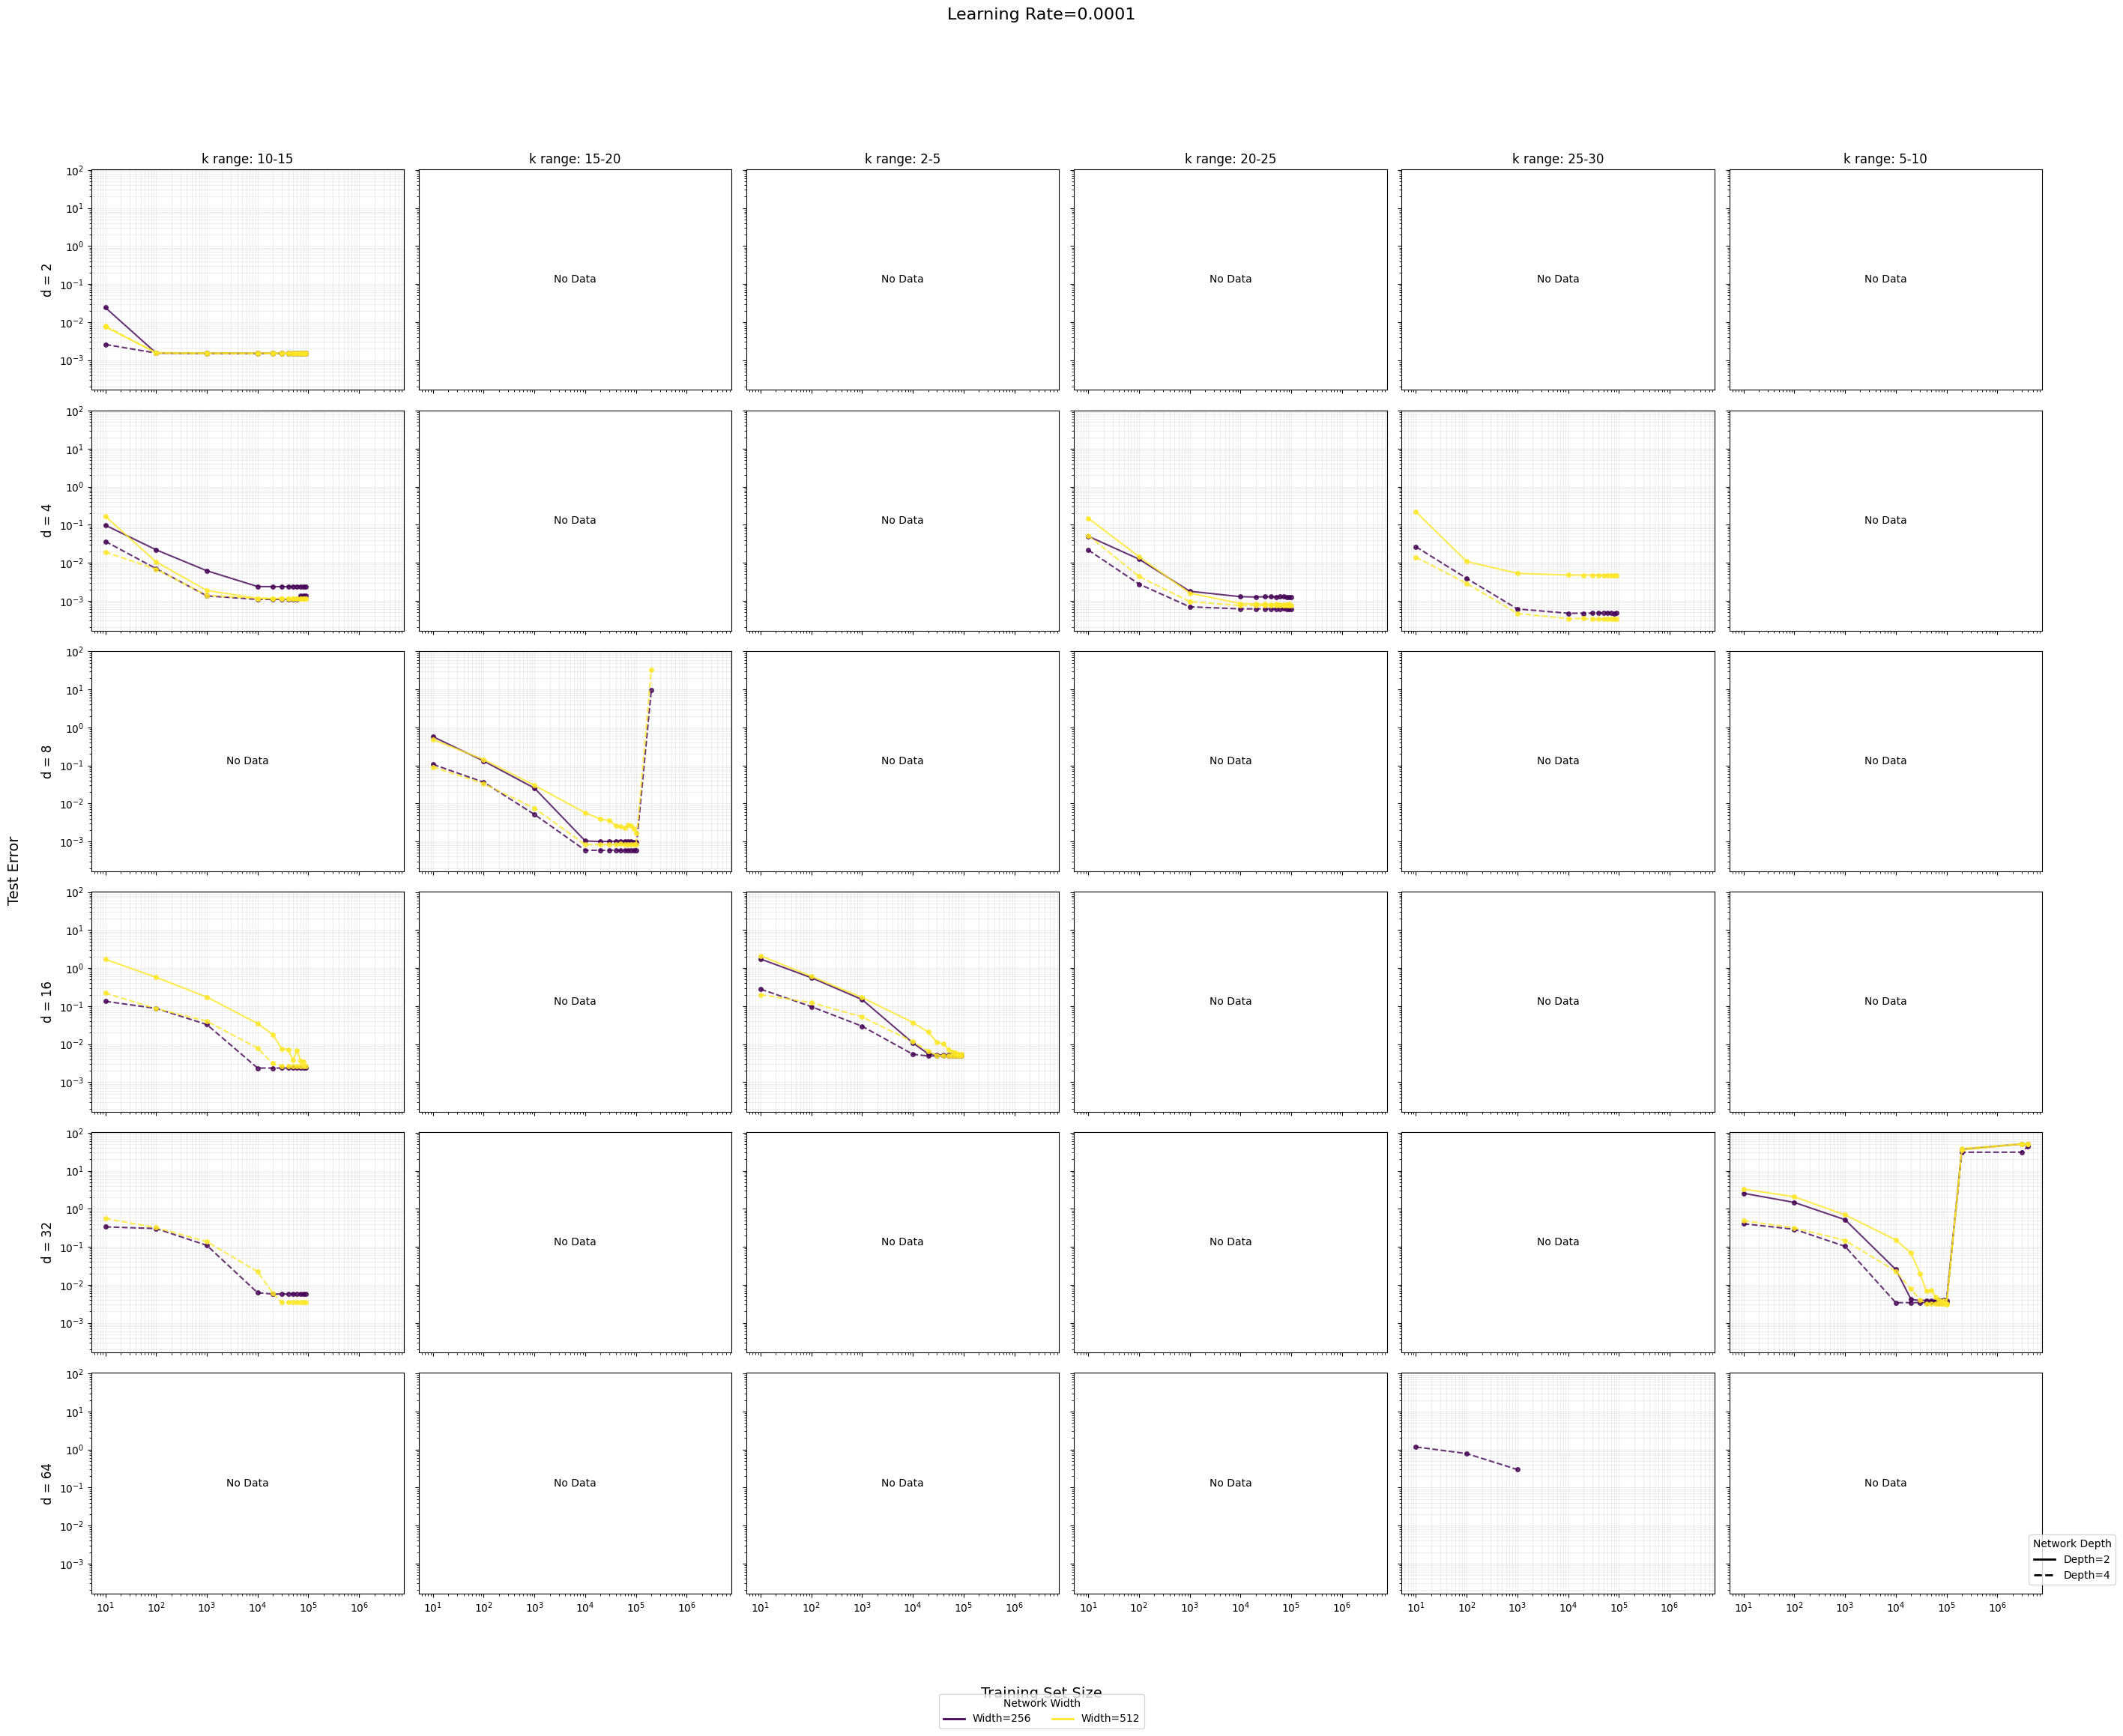

Creating grid for LR=0.0005
Dimensions: [np.int64(2), np.int64(4), np.int64(8), np.int64(16), np.int64(32), np.int64(64)]
k-ranges: ['10-15', '15-20', '2-5', '20-25', '25-30', '5-10']
Saved plot to ./result_plots_HP_grid/grid_HP_LR0p0005_multi_widths_depths.png


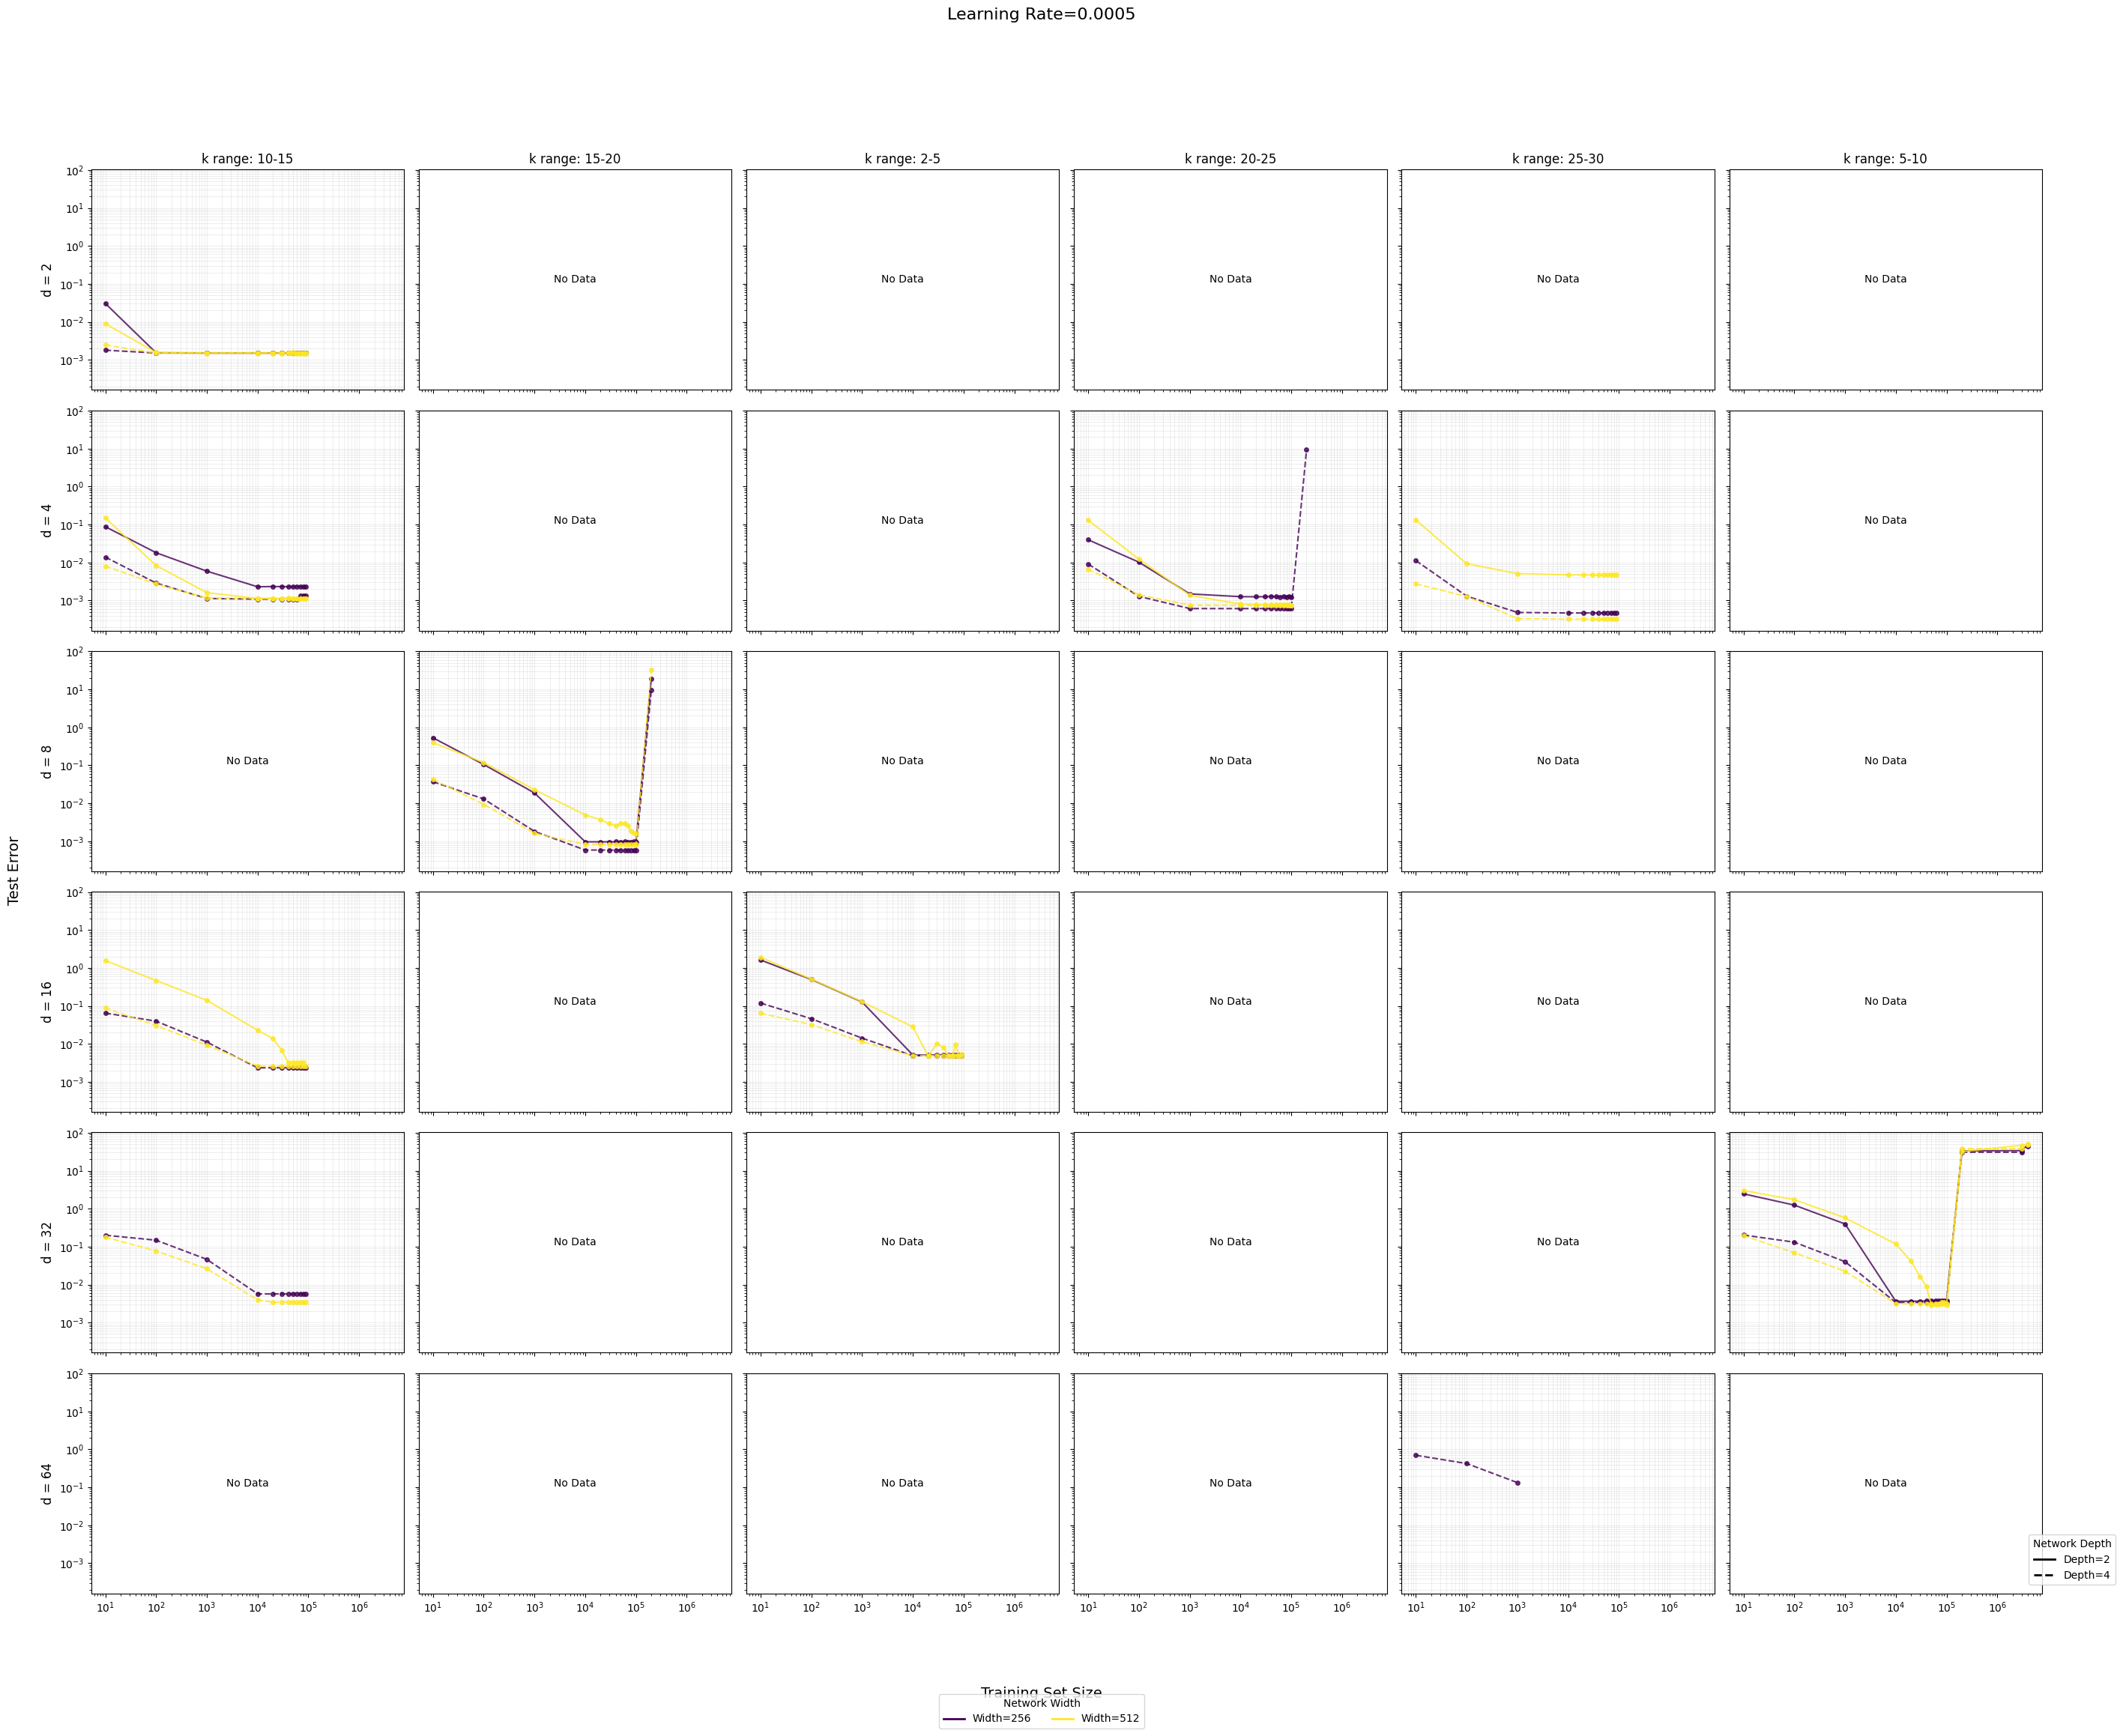

Creating grid for LR=0.001
Dimensions: [np.int64(2), np.int64(4), np.int64(8), np.int64(16), np.int64(32), np.int64(64)]
k-ranges: ['10-15', '15-20', '2-5', '20-25', '25-30', '5-10']
Saved plot to ./result_plots_HP_grid/grid_HP_LR0p001_multi_widths_depths.png


Aggregating data for heatmap...
Creating heatmap with 6 dimensions, 6 k-ranges, and 16 training sizes
Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n10.png


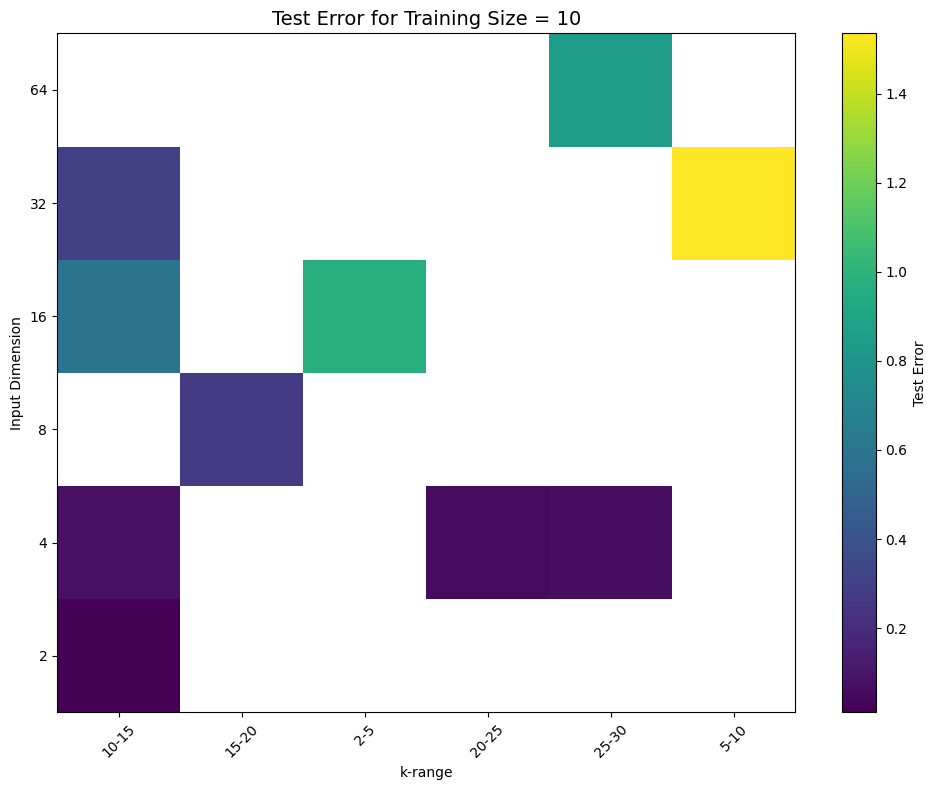

Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n100.png


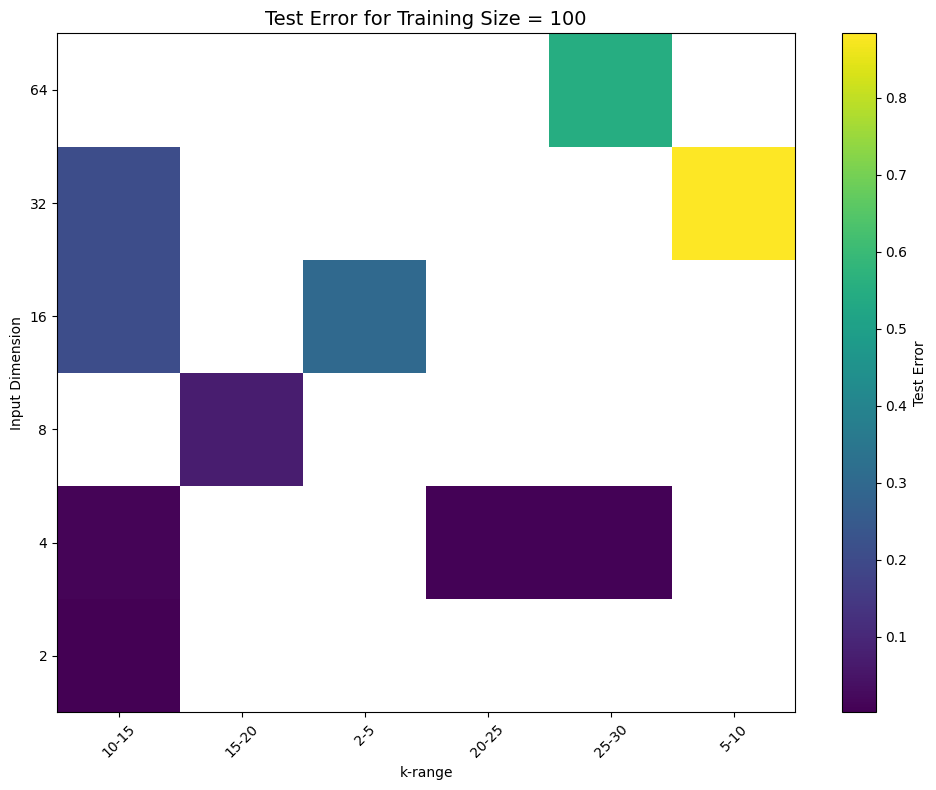

Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n1000.png


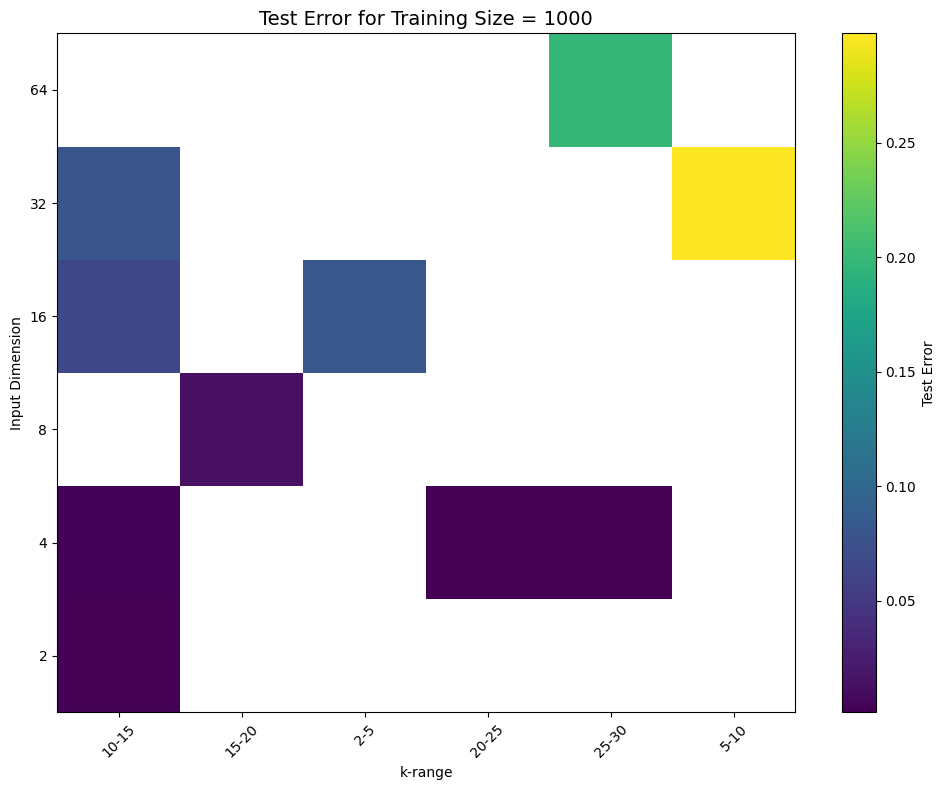

TypeError: Dimensions of C (5, 6) should be one smaller than X(7) and Y(7) while using shading='flat' see help(pcolormesh)

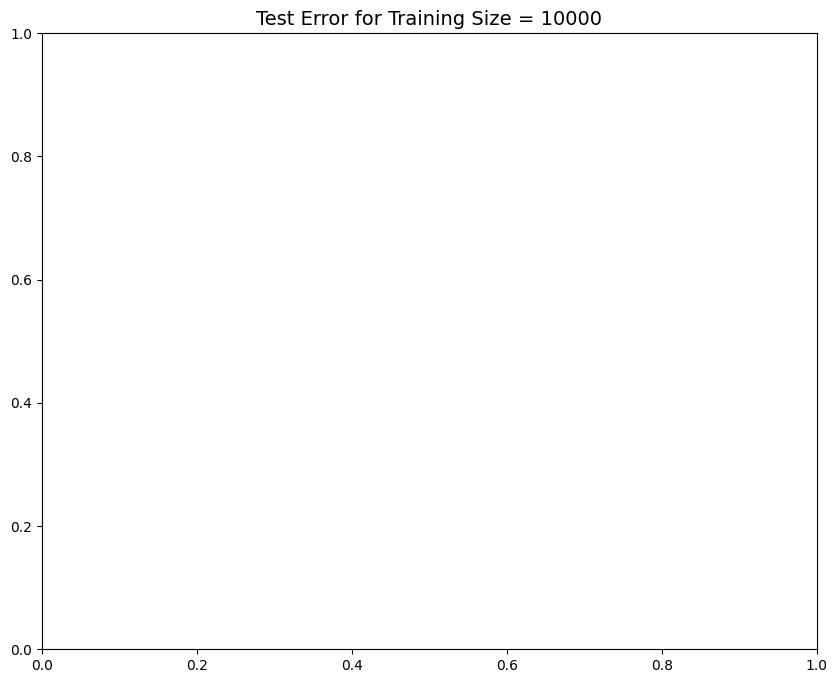

In [4]:
import os
import glob
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter
import matplotlib.colors as mcolors

# Optional imports
try:
    import seaborn as sns
    SEABORN_AVAILABLE = True
except ImportError:
    SEABORN_AVAILABLE = False

# === Configuration ===
# Set the path to your results directory
results_dir = "/home/goring/NN_spherical_harmonics/results/HP_2403/sweep_full_exp_20250324"

# Set to True to save plots to files
save_plots = True
output_dir = "./result_plots_HP_grid"

# Create output directory if needed
if save_plots:
    os.makedirs(output_dir, exist_ok=True)

def load_results(results_dir):
    """Load all result files from the specified directory."""
    result_files = []
    
    # First, try direct approach with explicit paths
    for gpu_id in range(4):  # Assuming 4 GPUs max
        pattern = os.path.join(results_dir, f"results_*_gpu{gpu_id}.jsonl")
        result_files.extend(glob.glob(pattern))
    
    # If no files found, try recursive pattern
    if not result_files:
        pattern = os.path.join(results_dir, "**", "*.jsonl")
        result_files.extend(glob.glob(pattern, recursive=True))
    
    print(f"Found {len(result_files)} result files")
    if not result_files:
        print(f"No files found in {results_dir}")
        return []
    
    all_results = []
    
    for file_path in result_files:
        try:
            with open(file_path, 'r') as f:
                for line in f:
                    if line.strip():
                        try:
                            result = json.loads(line)
                            all_results.append(result)
                        except json.JSONDecodeError:
                            print(f"Error parsing JSON in {file_path}")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    print(f"Loaded {len(all_results)} individual results")
    return all_results

def extract_k_range(result):
    """Extract k range from the result."""
    # Try to find k range in dataset name or directory
    fields_to_check = [
        result.get('dataset_name', ''),
        result.get('dataset_directory', ''),
        result.get('k_ranges', '') # Also check explicit k_ranges field for HP datasets
    ]
    
    # Check if k_ranges is directly available as a field
    if isinstance(result.get('k_ranges'), list) and len(result.get('k_ranges')) > 0:
        k_min, k_max = result['k_ranges'][0]
        return f"{k_min}-{k_max}"
    
    for field in fields_to_check:
        if not field:
            continue
            
        # Look for patterns like "k2-5" or "k5-10"
        match = re.search(r'k(\d+)-(\d+)', str(field))
        if match:
            return f"{match.group(1)}-{match.group(2)}"
        
        # Look for specific patterns we know are in the data
        for k_range in ['2-5', '5-10', '10-15', '15-20', '20-25', '25-30']:
            if k_range in str(field):
                return k_range
    
    return "Unknown"

def extract_dataset_type(result):
    """Extract dataset type (SH or HP) from the result."""
    # Try to find dataset type in dataset name or directory
    fields_to_check = [
        result.get('dataset_name', ''),
        result.get('dataset_directory', ''),
        result.get('distribution_type', '')
    ]
    
    for field in fields_to_check:
        if not field:
            continue
            
        if 'HP' in str(field) or 'HP' == result.get('distribution_type', ''):
            return 'HP'
        if 'SH' in str(field) or 'SH' == result.get('distribution_type', ''):
            return 'SH'
    
    return "Unknown"

def process_results(results):
    """Process results into a DataFrame with proper types."""
    processed_data = []
    
    for result in results:
        # Extract basic information from the result
        input_dim = result.get('input_dim')
        hidden_size = result.get('hidden_size')
        depth = result.get('depth')
        learning_rate = result.get('learning_rate')
        n_train = result.get('n_train')
        test_error = result.get('test_error')
        experiment_num = result.get('experiment_num', 0)
        
        # Skip if any required field is missing
        if None in [input_dim, hidden_size, depth, learning_rate, n_train, test_error]:
            continue
        
        # Extract k_range and dataset type
        k_range = extract_k_range(result)
        dataset_type = extract_dataset_type(result)
        
        # Extract num_k for HP datasets
        num_k = result.get('num_k', None)
        
        # Create a record with explicit type conversion
        record = {
            'input_dim': int(input_dim),
            'k_range': k_range,
            'n_train': int(n_train),
            'test_error': float(test_error),
            'hidden_size': int(hidden_size),
            'depth': int(depth),
            'learning_rate': float(learning_rate),
            'dataset_type': dataset_type,
            'experiment_num': int(experiment_num)
        }
        
        # Add num_k if available
        if num_k is not None:
            record['num_k'] = int(num_k)
        
        processed_data.append(record)
    
    # Convert to DataFrame
    df = pd.DataFrame(processed_data)
    return df

def create_grid_plots_by_lr(df):
    """
    Create grid-style plots with dimensions on rows and k-ranges on columns,
    showing different widths and depths with different color codes in the same plot.
    Grids are organized by learning rate.
    """
    # Get unique values
    lr_values = sorted(df['learning_rate'].unique())
    
    # Create plots for each learning rate
    for lr in lr_values:
        # Filter data for this learning rate
        subset = df[df['learning_rate'] == lr]
        
        if subset.empty:
            print(f"No data for Learning Rate={lr}")
            continue
        
        # Get unique dimensions and k-ranges for this subset
        dimensions = sorted(subset['input_dim'].unique())
        k_ranges = sorted(subset['k_range'].unique())
        
        if not dimensions or not k_ranges:
            print(f"Missing dimensions or k-ranges for LR={lr}")
            continue
        
        print(f"Creating grid for LR={lr}")
        print(f"Dimensions: {dimensions}")
        print(f"k-ranges: {k_ranges}")
        
        # Create a grid of plots
        fig, axes = plt.subplots(
            nrows=len(dimensions),
            ncols=len(k_ranges),
            figsize=(len(k_ranges)*5, len(dimensions)*4),
            sharex=True,
            sharey=True,
            squeeze=False
        )
        
        # Set the figure title
        fig.suptitle(f'Learning Rate={lr}', fontsize=16)
        
        # Add common x and y labels
        fig.text(0.5, 0.04, 'Training Set Size', ha='center', fontsize=14)
        fig.text(0.04, 0.5, 'Test Error', va='center', rotation='vertical', fontsize=14)
        
        # Get unique hidden sizes and depths
        hidden_sizes = sorted(subset['hidden_size'].unique())
        depths = sorted(subset['depth'].unique())
        
        # Create color maps
        width_cmap = plt.cm.viridis
        width_norm = mcolors.Normalize(vmin=min(hidden_sizes), vmax=max(hidden_sizes))
        
        # Line styles for different depths
        depth_styles = ['-', '--', '-.', ':']
        # Ensure we have enough line styles
        while len(depth_styles) < len(depths):
            depth_styles.extend(['-', '--', '-.', ':'])
        
        # Calculate global min and max for y-axis
        min_error = subset['test_error'].min() * 0.5
        max_error = subset['test_error'].max() * 2.0
        
        # Create a list to store legend handles and labels
        legend_elements = []
        
        # Fill in each cell of the grid
        for i, dim in enumerate(dimensions):
            for j, k_range in enumerate(k_ranges):
                ax = axes[i, j]
                
                # Set cell title
                if i == 0:  # Top row gets k-range
                    ax.set_title(f'k range: {k_range}', fontsize=12)
                
                if j == 0:  # First column gets dimension
                    ax.set_ylabel(f'd = {dim}', fontsize=12)
                
                # Filter data for this cell
                cell_data = subset[(subset['input_dim'] == dim) & (subset['k_range'] == k_range)]
                
                if cell_data.empty:
                    ax.text(0.5, 0.5, 'No Data', 
                           ha='center', va='center', transform=ax.transAxes)
                    continue
                
                # Log scales
                ax.set_xscale('log')
                ax.set_yscale('log')
                
                # Plot lines for each combination of hidden_size and depth
                for h_size in hidden_sizes:
                    for d_idx, depth in enumerate(depths):
                        # Get data for this width and depth
                        h_d_data = cell_data[(cell_data['hidden_size'] == h_size) & 
                                             (cell_data['depth'] == depth)]
                        
                        if h_d_data.empty:
                            continue
                        
                        # Check for duplicate training sizes
                        dup_sizes = h_d_data['n_train'].value_counts()
                        has_duplicates = any(count > 1 for count in dup_sizes)
                        
                        if has_duplicates:
                            # Aggregate by taking the average of test errors for each training size
                            h_d_data = h_d_data.groupby('n_train')['test_error'].mean().reset_index()
                        
                        # Sort by n_train for proper line plotting
                        h_d_data = h_d_data.sort_values('n_train')
                        
                        if len(h_d_data) <= 1:
                            continue  # Need at least two points to draw a line
                        
                        # Get color based on hidden size
                        color = width_cmap(width_norm(h_size))
                        
                        # Get line style based on depth
                        linestyle = depth_styles[d_idx % len(depth_styles)]
                        
                        # Plot data points and line
                        line, = ax.plot(
                            h_d_data['n_train'],
                            h_d_data['test_error'],
                            color=color,
                            linestyle=linestyle,
                            marker='o',
                            markersize=4,
                            alpha=0.8,
                            label=f'W={h_size}, D={depth}'
                        )
                        
                        # Add to legend elements (only once per combination)
                        if i == 0 and j == 0:
                            legend_elements.append(line)
                
                # Set the y-axis limits consistently across all plots
                ax.set_ylim(min_error, max_error)
                
                # Add grid
                ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.3)
        
        # Create a custom legend for the entire figure
        # First create a legend for hidden sizes (colors)
        width_legend_elements = []
        for h_size in hidden_sizes:
            color = width_cmap(width_norm(h_size))
            width_legend_elements.append(
                plt.Line2D([0], [0], color=color, lw=2, label=f'Width={h_size}')
            )
        
        # Then create a legend for depths (line styles)
        depth_legend_elements = []
        for d_idx, depth in enumerate(depths):
            linestyle = depth_styles[d_idx % len(depth_styles)]
            depth_legend_elements.append(
                plt.Line2D([0], [0], color='black', linestyle=linestyle, lw=2, label=f'Depth={depth}')
            )
        
        # Add legends to the figure
        fig.legend(
            handles=width_legend_elements,
            loc='lower center',
            ncol=min(5, len(width_legend_elements)),
            bbox_to_anchor=(0.5, 0.02),
            fontsize=10,
            title="Network Width"
        )
        
        fig.legend(
            handles=depth_legend_elements,
            loc='lower right',
            ncol=1,
            bbox_to_anchor=(0.98, 0.1),
            fontsize=10,
            title="Network Depth"
        )
        
        # Adjust layout with space for the legends
        plt.tight_layout(rect=[0.05, 0.08, 0.95, 0.92])
        
        # Save figure if requested
        if save_plots:
            lr_str = str(lr).replace('.', 'p')
            dataset_type = subset['dataset_type'].iloc[0] if 'dataset_type' in subset.columns else 'Unknown'
            
            filename = f'grid_{dataset_type}_LR{lr_str}_multi_widths_depths.png'
            save_path = os.path.join(output_dir, filename)
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Saved plot to {save_path}")
        
        plt.show()

def create_single_grid(df):
    """
    Create a single grid plot with all dimensions and k-ranges.
    This helps visualize the overall data distribution and identify missing cells.
    """
    # First, aggregate any duplicate training sizes by averaging
    print("Aggregating data for heatmap...")
    agg_df = df.groupby(['input_dim', 'k_range', 'n_train'])['test_error'].mean().reset_index()
    
    # Get unique values
    dims = sorted(agg_df['input_dim'].unique())
    k_ranges = sorted(agg_df['k_range'].unique())
    n_trains = sorted(agg_df['n_train'].unique())
    
    print(f"Creating heatmap with {len(dims)} dimensions, {len(k_ranges)} k-ranges, and {len(n_trains)} training sizes")
    
    # Create a heatmap for each n_train value
    for n_train in n_trains:
        # Filter data for this n_train
        subset = agg_df[agg_df['n_train'] == n_train]
        
        # Create a matrix for the heatmap
        heatmap_data = pd.pivot_table(
            subset, 
            values='test_error',
            index='input_dim',
            columns='k_range',
            fill_value=np.nan
        )
        
        # Create the plot
        plt.figure(figsize=(10, 8))
        plt.title(f'Test Error for Training Size = {n_train}', fontsize=14)
        
        # Create a heatmap (actually a table)
        im = plt.pcolormesh(
            np.arange(len(k_ranges)+1), 
            np.arange(len(dims)+1), 
            heatmap_data.values,
            cmap='viridis',
            shading='auto'
        )
        
        # Add colorbar
        plt.colorbar(im, label='Test Error')
        
        # Set ticks and labels
        plt.xticks(np.arange(len(k_ranges)) + 0.5, k_ranges, rotation=45)
        plt.yticks(np.arange(len(dims)) + 0.5, dims)
        
        plt.xlabel('k-range')
        plt.ylabel('Input Dimension')
        
        # Adjust layout
        plt.tight_layout()
        
        # Save if requested
        if save_plots:
            dataset_type = df['dataset_type'].iloc[0] if 'dataset_type' in df.columns else 'Unknown'
            save_path = os.path.join(output_dir, f'heatmap_{dataset_type}_n{n_train}.png')
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Saved heatmap to {save_path}")
        
        plt.show()

def check_for_duplicates(df):
    """
    Check the entire dataset for duplicate experiments and report them.
    This helps identify issues with the data.
    """
    print("\n=== Checking for Duplicate Experiments ===")
    
    # Group by all parameters that should uniquely identify an experiment
    # Exclude experiment_num as that's meant to be different
    group_cols = ['input_dim', 'k_range', 'n_train', 'hidden_size', 'depth', 'learning_rate']
    
    # Count occurrences of each parameter combination
    exp_counts = df.groupby(group_cols).size().reset_index(name='count')
    
    # Filter to only show duplicates
    duplicates = exp_counts[exp_counts['count'] > 1]
    
    if len(duplicates) == 0:
        print("No exact duplicate parameter combinations found!")
        return
    
    print(f"Found {len(duplicates)} parameter combinations with multiple experiments:")
    for _, row in duplicates.iterrows():
        # Get the full data for this combination
        mask = True
        for col in group_cols:
            mask = mask & (df[col] == row[col])
        
        dup_data = df[mask]
        
        print(f"\nParameter set: d={row['input_dim']}, k={row['k_range']}, "
              f"n_train={row['n_train']}, hidden={row['hidden_size']}, "
              f"depth={row['depth']}, lr={row['learning_rate']}")
        
        # Show the individual experiments and their results
        for _, exp in dup_data.iterrows():
            exp_type = exp.get('dataset_type', 'Unknown')
            exp_num = exp.get('experiment_num', 0)
            test_err = exp['test_error']
            print(f"  {exp_type} Experiment #{exp_num}: test_error = {test_err:.6f}")

def main():
    print("Starting grid plot creation...")
    
    # Load results
    results = load_results(results_dir)
    
    if not results:
        print("No results were loaded. Please check paths and file formats.")
        return
    
    # Process results
    df = process_results(results)
    
    if len(df) == 0:
        print("No valid data entries after processing.")
        return
    
    # Print some summary statistics
    print(f"\nProcessed {len(df)} data points with {df['learning_rate'].nunique()} learning rates, "
          f"{df['hidden_size'].nunique()} hidden sizes, {df['depth'].nunique()} depths, "
          f"{df['input_dim'].nunique()} dimensions, and {df['k_range'].nunique()} k-ranges")
    
    # Check for duplicate experiments in the data
    check_for_duplicates(df)
    
    # Create the grid plots by learning rate with different widths and depths color-coded
    create_grid_plots_by_lr(df)
    
    # Create heatmaps for data overview
    create_single_grid(df)
    
    print("Done!")

if __name__ == "__main__":
    main()

Starting grid plot creation...
Found 1 result files
Loaded 396 individual results

Processed 396 data points with 1 learning rates, 1 hidden sizes, 1 depths, 6 dimensions, and 6 k-ranges

=== Checking for Duplicate Experiments ===
No exact duplicate parameter combinations found!
Creating grid for LR=0.0005
Dimensions: [np.int64(2), np.int64(4), np.int64(8), np.int64(16), np.int64(32), np.int64(64)]
k-ranges: ['10-15', '15-20', '2-5', '20-25', '25-30', '5-10']
Saved plot to ./result_plots_HP_grid/grid_HP_LR0p0005_multi_widths_depths.png


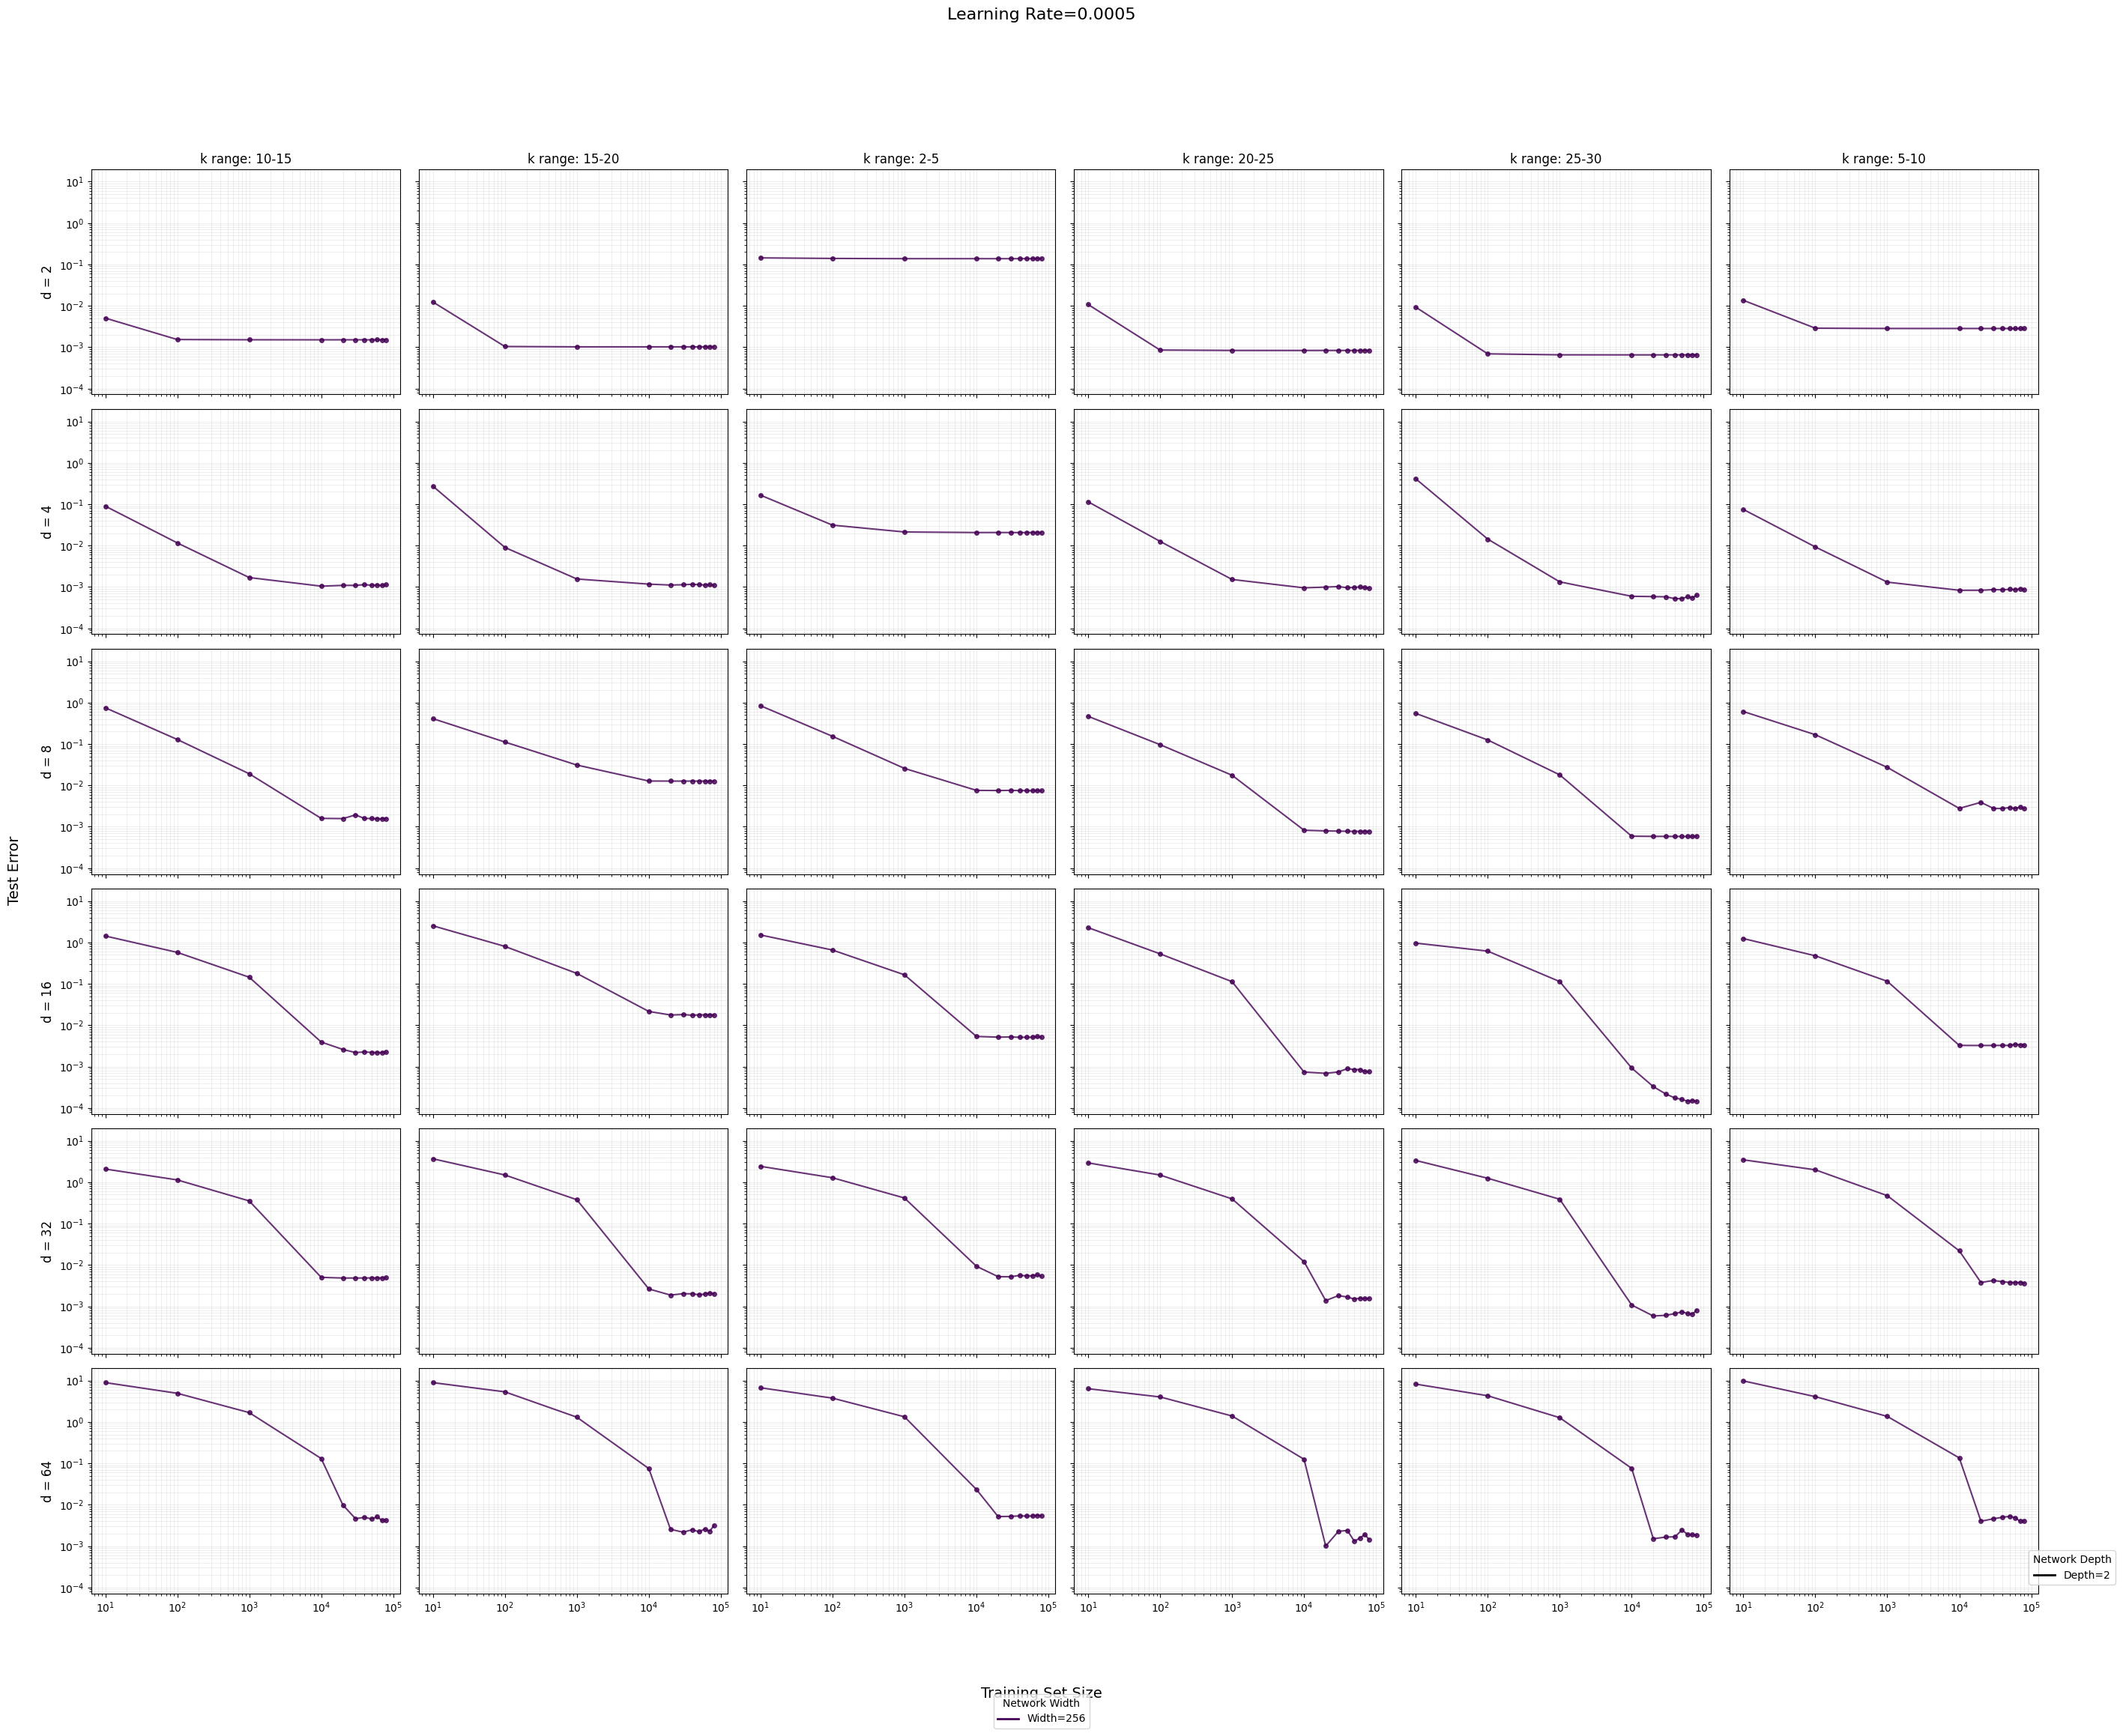

Aggregating data for heatmap...
Creating heatmap with 6 dimensions, 6 k-ranges, and 11 training sizes
Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n10.png


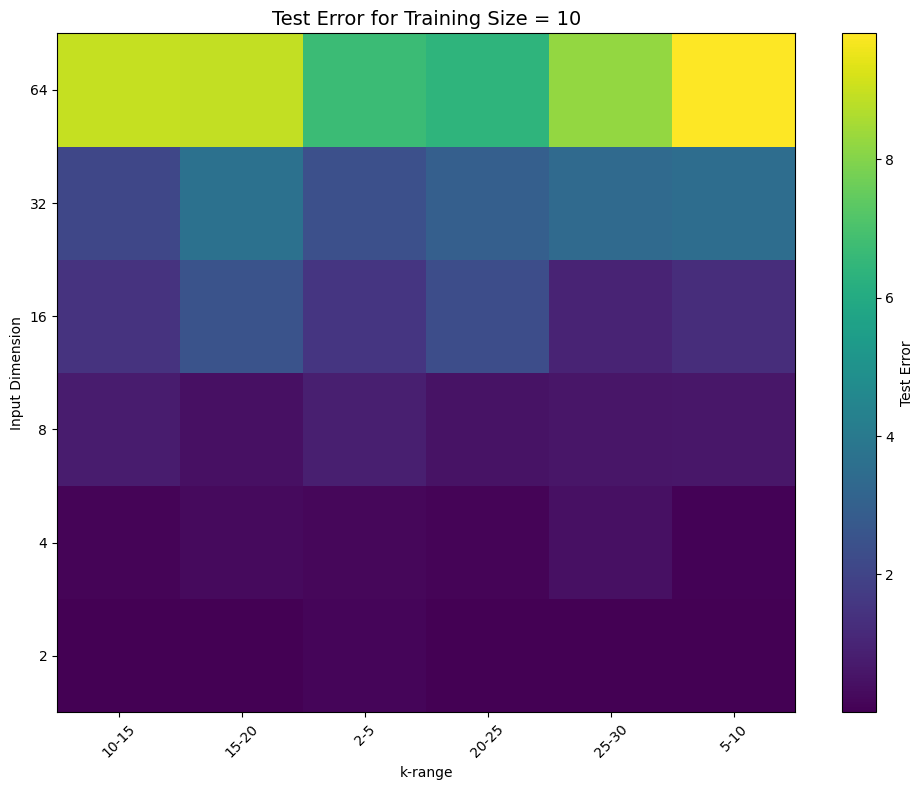

Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n100.png


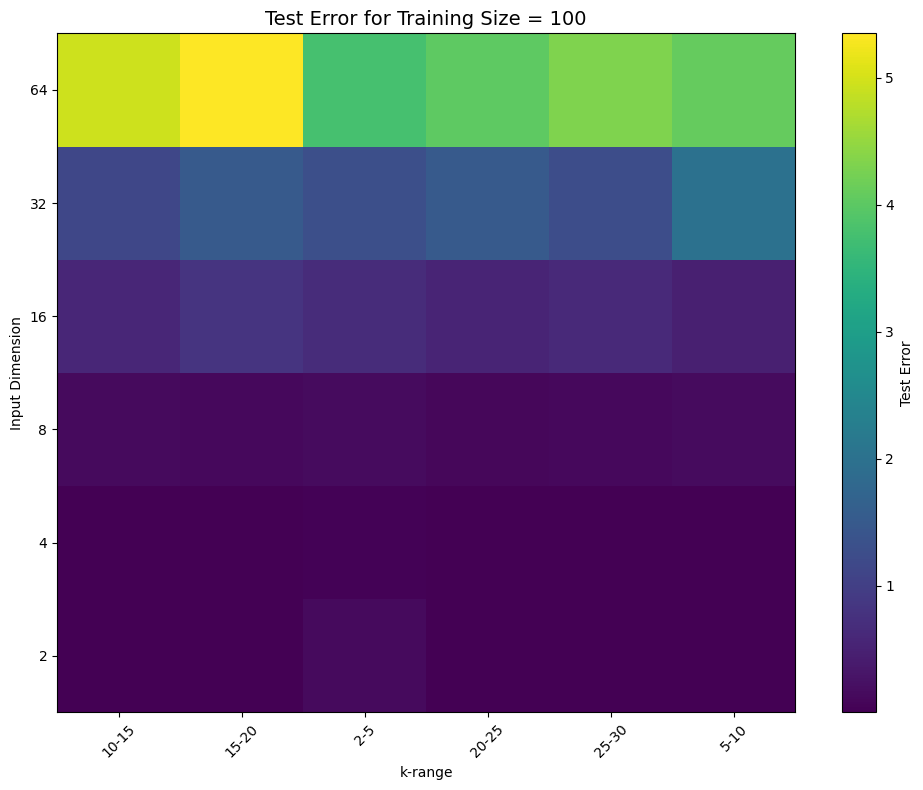

Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n1000.png


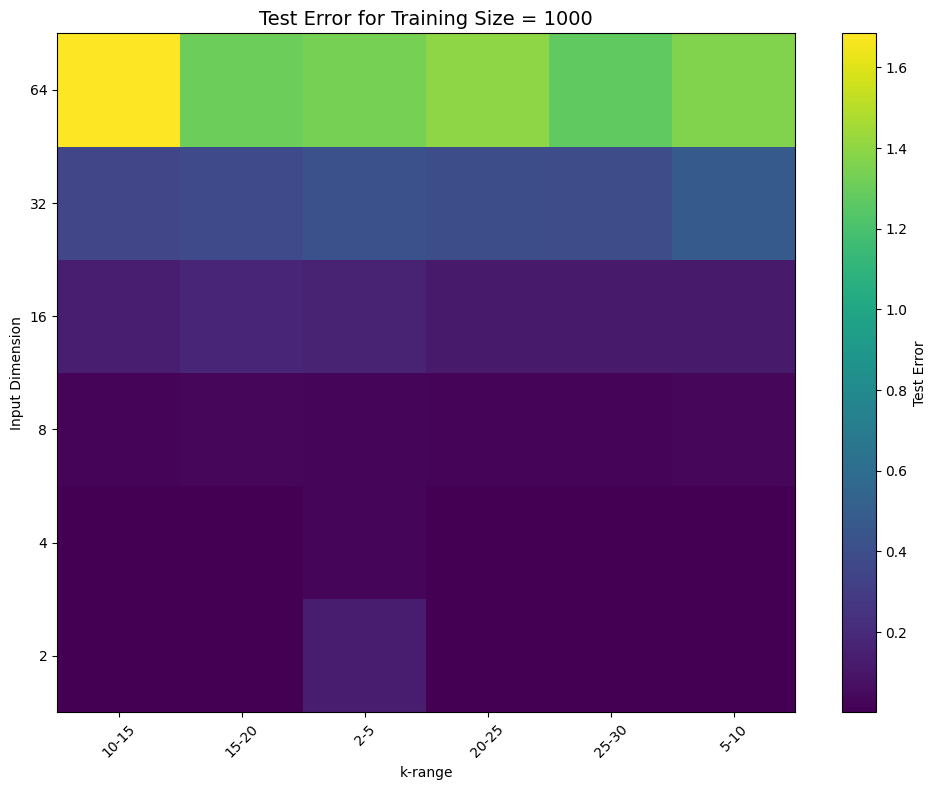

Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n10000.png


Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n20000.png


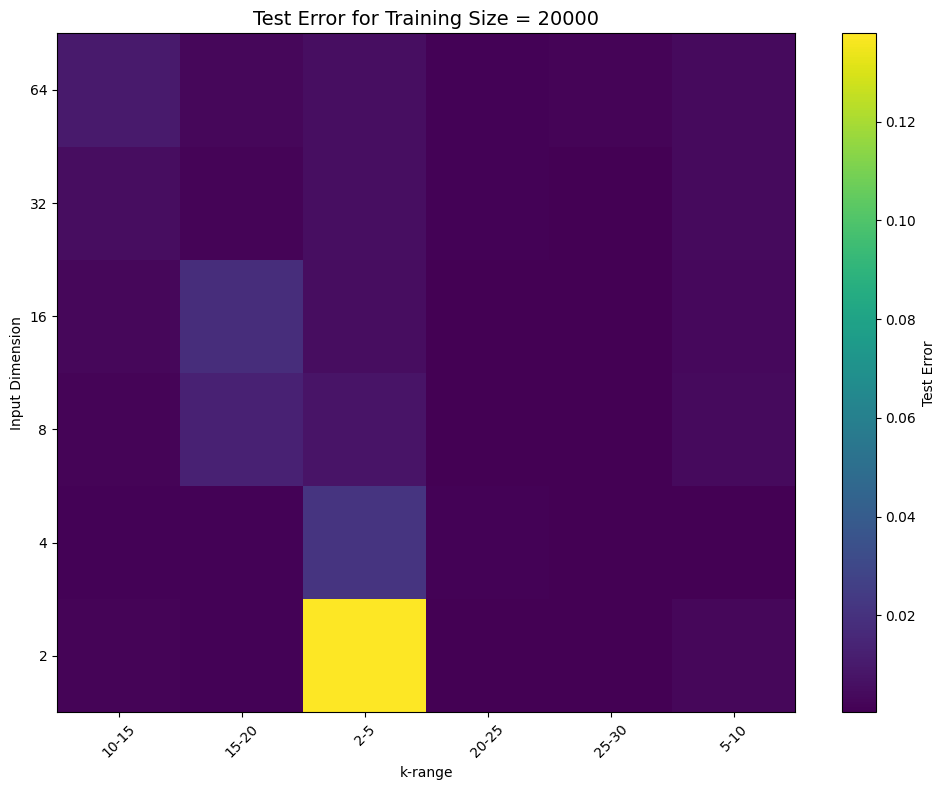

Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n30000.png


Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n40000.png


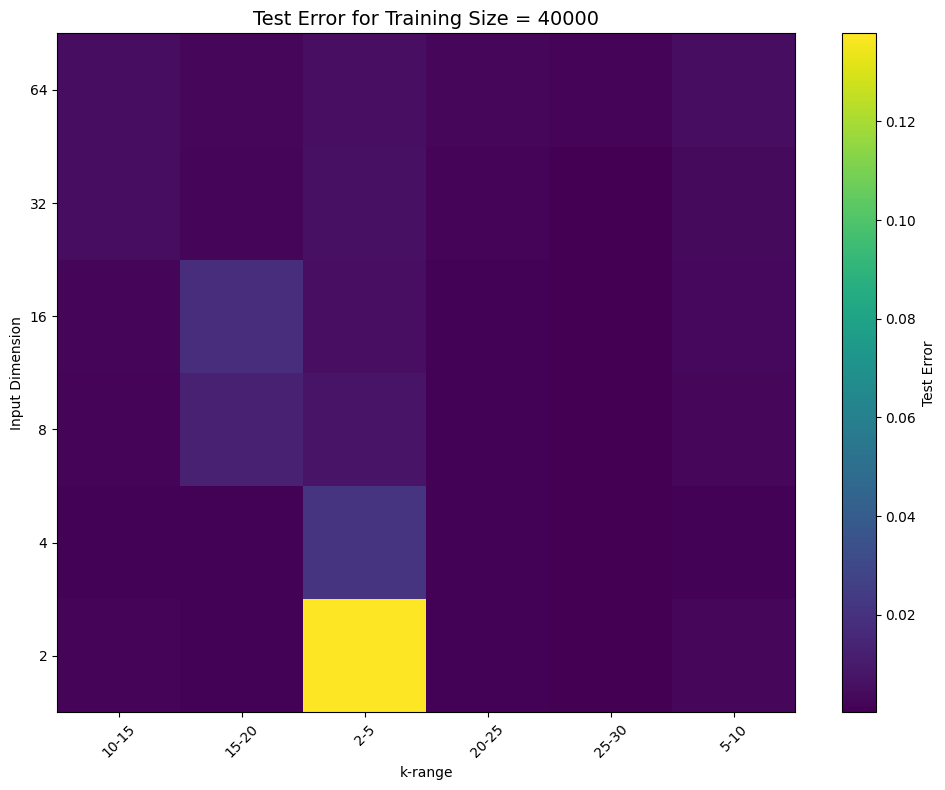

Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n50000.png


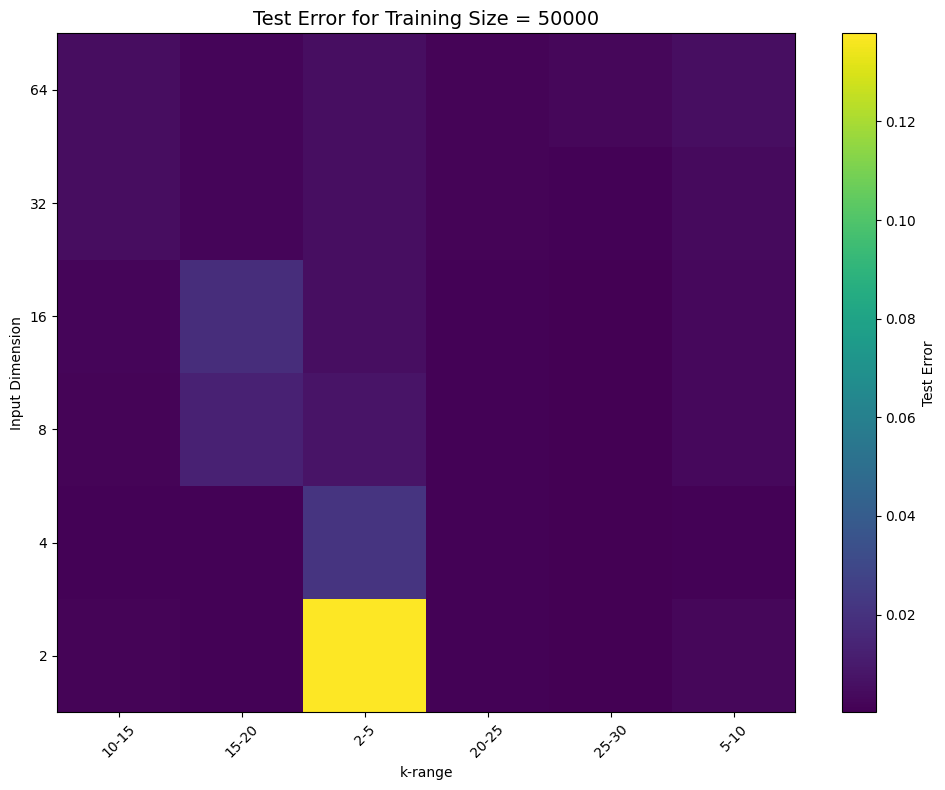

Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n60000.png


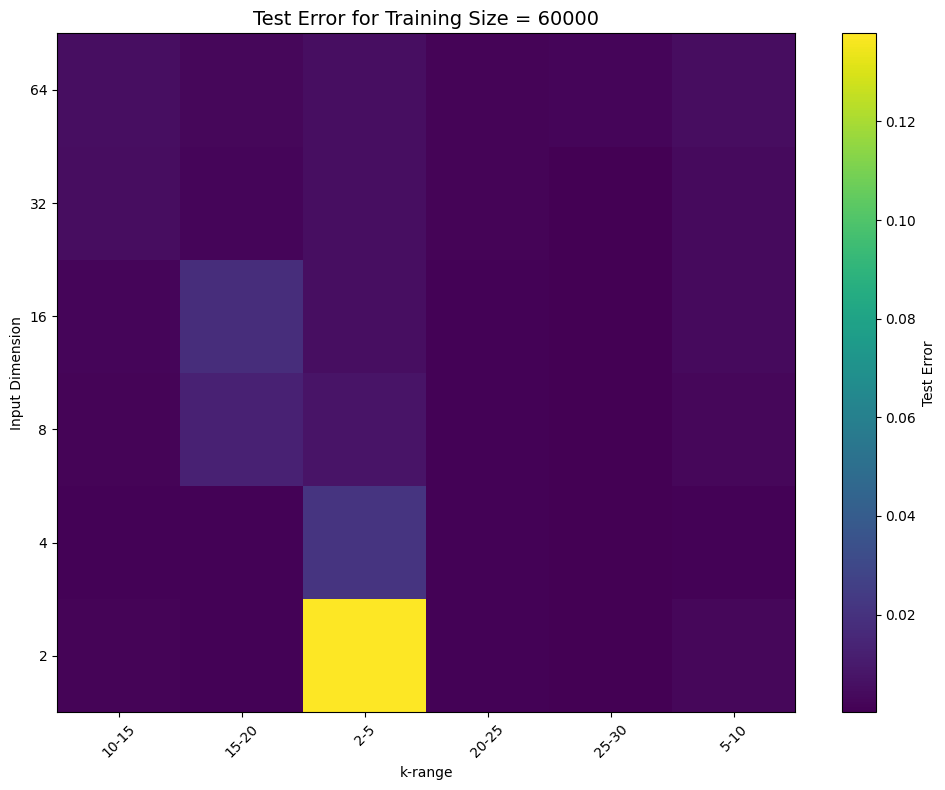

Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n70000.png


Saved heatmap to ./result_plots_HP_grid/heatmap_HP_n80000.png


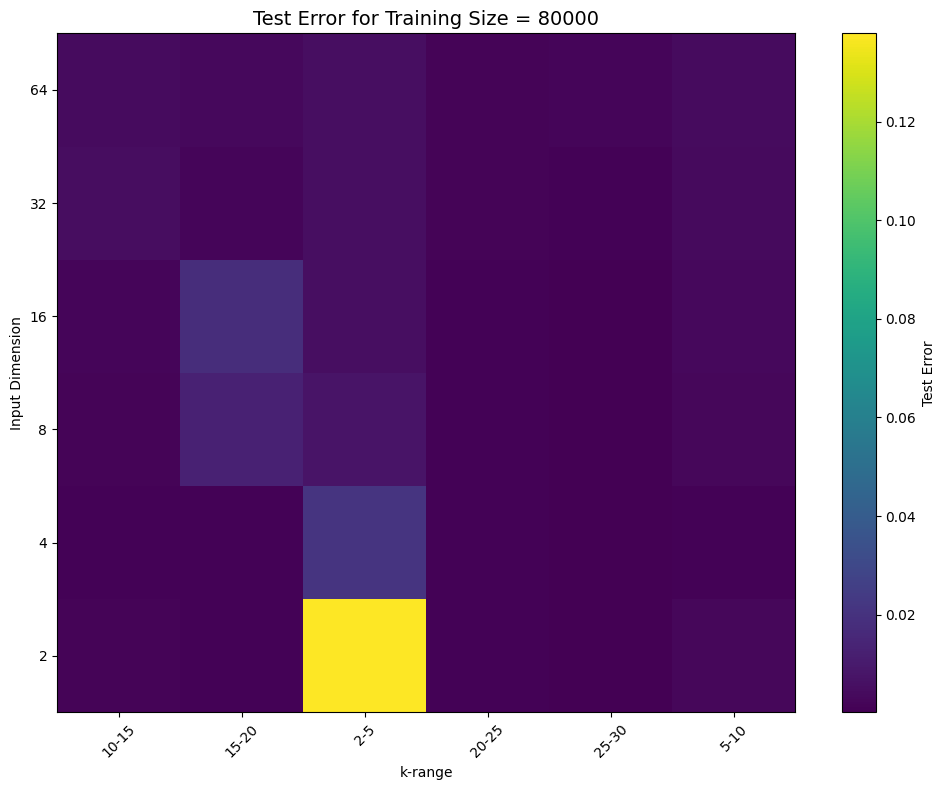

Done!


In [2]:
import os
import glob
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter
import matplotlib.colors as mcolors

# Optional imports
try:
    import seaborn as sns
    SEABORN_AVAILABLE = True
except ImportError:
    SEABORN_AVAILABLE = False

# === Configuration ===
# Set the path to your results directory
results_dir = "/home/goring/NN_spherical_harmonics/results/HP_2403_4/sweep_full_exp_20250325"

# Set to True to save plots to files
save_plots = True
output_dir = "./result_plots_HP_grid"

# Create output directory if needed
if save_plots:
    os.makedirs(output_dir, exist_ok=True)

def load_results(results_dir):
    """Load all result files from the specified directory."""
    result_files = []
    
    # First, try direct approach with explicit paths
    for gpu_id in range(4):  # Assuming 4 GPUs max
        pattern = os.path.join(results_dir, f"results_*_gpu{gpu_id}.jsonl")
        result_files.extend(glob.glob(pattern))
    
    # If no files found, try recursive pattern
    if not result_files:
        pattern = os.path.join(results_dir, "**", "*.jsonl")
        result_files.extend(glob.glob(pattern, recursive=True))
    
    print(f"Found {len(result_files)} result files")
    if not result_files:
        print(f"No files found in {results_dir}")
        return []
    
    all_results = []
    
    for file_path in result_files:
        try:
            with open(file_path, 'r') as f:
                for line in f:
                    if line.strip():
                        try:
                            result = json.loads(line)
                            all_results.append(result)
                        except json.JSONDecodeError:
                            print(f"Error parsing JSON in {file_path}")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    print(f"Loaded {len(all_results)} individual results")
    return all_results

def extract_k_range(result):
    """Extract k range from the result."""
    # Try to find k range in dataset name or directory
    fields_to_check = [
        result.get('dataset_name', ''),
        result.get('dataset_directory', ''),
        result.get('k_ranges', '') # Also check explicit k_ranges field for HP datasets
    ]
    
    # Check if k_ranges is directly available as a field
    if isinstance(result.get('k_ranges'), list) and len(result.get('k_ranges')) > 0:
        k_min, k_max = result['k_ranges'][0]
        return f"{k_min}-{k_max}"
    
    for field in fields_to_check:
        if not field:
            continue
            
        # Look for patterns like "k2-5" or "k5-10"
        match = re.search(r'k(\d+)-(\d+)', str(field))
        if match:
            return f"{match.group(1)}-{match.group(2)}"
        
        # Look for specific patterns we know are in the data
        for k_range in ['2-5', '5-10', '10-15', '15-20', '20-25', '25-30']:
            if k_range in str(field):
                return k_range
    
    return "Unknown"

def extract_dataset_type(result):
    """Extract dataset type (SH or HP) from the result."""
    # Try to find dataset type in dataset name or directory
    fields_to_check = [
        result.get('dataset_name', ''),
        result.get('dataset_directory', ''),
        result.get('distribution_type', '')
    ]
    
    for field in fields_to_check:
        if not field:
            continue
            
        if 'HP' in str(field) or 'HP' == result.get('distribution_type', ''):
            return 'HP'
        if 'SH' in str(field) or 'SH' == result.get('distribution_type', ''):
            return 'SH'
    
    return "Unknown"

def process_results(results):
    """Process results into a DataFrame with proper types."""
    processed_data = []
    
    for result in results:
        # Extract basic information from the result
        input_dim = result.get('input_dim')
        hidden_size = result.get('hidden_size')
        depth = result.get('depth')
        learning_rate = result.get('learning_rate')
        n_train = result.get('n_train')
        test_error = result.get('test_error')
        experiment_num = result.get('experiment_num', 0)
        
        # Skip if any required field is missing
        if None in [input_dim, hidden_size, depth, learning_rate, n_train, test_error]:
            continue
        
        # Extract k_range and dataset type
        k_range = extract_k_range(result)
        dataset_type = extract_dataset_type(result)
        
        # Extract num_k for HP datasets
        num_k = result.get('num_k', None)
        
        # Create a record with explicit type conversion
        record = {
            'input_dim': int(input_dim),
            'k_range': k_range,
            'n_train': int(n_train),
            'test_error': float(test_error),
            'hidden_size': int(hidden_size),
            'depth': int(depth),
            'learning_rate': float(learning_rate),
            'dataset_type': dataset_type,
            'experiment_num': int(experiment_num)
        }
        
        # Add num_k if available
        if num_k is not None:
            record['num_k'] = int(num_k)
        
        processed_data.append(record)
    
    # Convert to DataFrame
    df = pd.DataFrame(processed_data)
    return df


def create_grid_plots_by_lr(df):
    """
    Create grid-style plots with dimensions on rows and k-ranges on columns,
    showing different widths and depths with different color codes in the same plot.
    Grids are organized by learning rate.
    """
    # Get unique values
    lr_values = sorted(df['learning_rate'].unique())
    
    # Create plots for each learning rate
    for lr in lr_values:
        # Filter data for this learning rate
        subset = df[df['learning_rate'] == lr]
        
        if subset.empty:
            print(f"No data for Learning Rate={lr}")
            continue
        
        # Get unique dimensions and k-ranges for this subset
        dimensions = sorted(subset['input_dim'].unique())
        
        # Custom sorting for k-ranges to put smaller ranges first
        def k_range_key(k_range):
            # Extract the first number in the range (e.g., "2" from "2-5")
            parts = k_range.split('-')
            if len(parts) >= 2:
                try:
                    return int(parts[0])
                except ValueError:
                    return 0
            return 0
            
        k_ranges = sorted(subset['k_range'].unique(), key=k_range_key)
        
        if not dimensions or not k_ranges:
            print(f"Missing dimensions or k-ranges for LR={lr}")
            continue
        
        print(f"Creating grid for LR={lr}")
        print(f"Dimensions: {dimensions}")
        print(f"k-ranges: {k_ranges}")
        
        # Create a grid of plots
        fig, axes = plt.subplots(
            nrows=len(dimensions),
            ncols=len(k_ranges),
            figsize=(len(k_ranges)*5, len(dimensions)*4),
            sharex=True,
            sharey=True,
            squeeze=False
        )
        
        # Set the figure title
        fig.suptitle(f'Learning Rate={lr}', fontsize=16)
        
        # Add common x and y labels
        fig.text(0.5, 0.04, 'Training Set Size', ha='center', fontsize=14)
        fig.text(0.04, 0.5, 'Test Error', va='center', rotation='vertical', fontsize=14)
        
        # Get unique hidden sizes and depths
        hidden_sizes = sorted(subset['hidden_size'].unique())
        depths = sorted(subset['depth'].unique())
        
        # Create color maps
        width_cmap = plt.cm.viridis
        width_norm = mcolors.Normalize(vmin=min(hidden_sizes), vmax=max(hidden_sizes))
        
        # Line styles for different depths
        depth_styles = ['-', '--', '-.', ':']
        # Ensure we have enough line styles
        while len(depth_styles) < len(depths):
            depth_styles.extend(['-', '--', '-.', ':'])
        
        # Calculate global min and max for y-axis
        min_error = subset['test_error'].min() * 0.5
        max_error = subset['test_error'].max() * 2.0
        
        # Create a list to store legend handles and labels
        legend_elements = []
        
        # Fill in each cell of the grid
        for i, dim in enumerate(dimensions):
            for j, k_range in enumerate(k_ranges):
                ax = axes[i, j]
                
                # Set cell title
                if i == 0:  # Top row gets k-range
                    ax.set_title(f'k range: {k_range}', fontsize=12)
                
                if j == 0:  # First column gets dimension
                    ax.set_ylabel(f'd = {dim}', fontsize=12)
                
                # Filter data for this cell
                cell_data = subset[(subset['input_dim'] == dim) & (subset['k_range'] == k_range)]
                
                if cell_data.empty:
                    ax.text(0.5, 0.5, 'No Data', 
                           ha='center', va='center', transform=ax.transAxes)
                    continue
                
                # Log scales
                ax.set_xscale('log')
                ax.set_yscale('log')
                
                # Plot lines for each combination of hidden_size and depth
                for h_size in hidden_sizes:
                    for d_idx, depth in enumerate(depths):
                        # Get data for this width and depth
                        h_d_data = cell_data[(cell_data['hidden_size'] == h_size) & 
                                             (cell_data['depth'] == depth)]
                        
                        if h_d_data.empty:
                            continue
                        
                        # Check for duplicate training sizes
                        dup_sizes = h_d_data['n_train'].value_counts()
                        has_duplicates = any(count > 1 for count in dup_sizes)
                        
                        if has_duplicates:
                            # Aggregate by taking the average of test errors for each training size
                            h_d_data = h_d_data.groupby('n_train')['test_error'].mean().reset_index()
                        
                        # Sort by n_train for proper line plotting
                        h_d_data = h_d_data.sort_values('n_train')
                        
                        if len(h_d_data) <= 1:
                            continue  # Need at least two points to draw a line
                        
                        # Get color based on hidden size
                        color = width_cmap(width_norm(h_size))
                        
                        # Get line style based on depth
                        linestyle = depth_styles[d_idx % len(depth_styles)]
                        
                        # Plot data points and line
                        line, = ax.plot(
                            h_d_data['n_train'],
                            h_d_data['test_error'],
                            color=color,
                            linestyle=linestyle,
                            marker='o',
                            markersize=4,
                            alpha=0.8,
                            label=f'W={h_size}, D={depth}'
                        )
                        
                        # Add to legend elements (only once per combination)
                        if i == 0 and j == 0:
                            legend_elements.append(line)
                
                # Set the y-axis limits consistently across all plots
                ax.set_ylim(min_error, max_error)
                
                # Add grid
                ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.3)
        
        # Create a custom legend for the entire figure
        # First create a legend for hidden sizes (colors)
        width_legend_elements = []
        for h_size in hidden_sizes:
            color = width_cmap(width_norm(h_size))
            width_legend_elements.append(
                plt.Line2D([0], [0], color=color, lw=2, label=f'Width={h_size}')
            )
        
        # Then create a legend for depths (line styles)
        depth_legend_elements = []
        for d_idx, depth in enumerate(depths):
            linestyle = depth_styles[d_idx % len(depth_styles)]
            depth_legend_elements.append(
                plt.Line2D([0], [0], color='black', linestyle=linestyle, lw=2, label=f'Depth={depth}')
            )
        
        # Add legends to the figure
        fig.legend(
            handles=width_legend_elements,
            loc='lower center',
            ncol=min(5, len(width_legend_elements)),
            bbox_to_anchor=(0.5, 0.02),
            fontsize=10,
            title="Network Width"
        )
        
        fig.legend(
            handles=depth_legend_elements,
            loc='lower right',
            ncol=1,
            bbox_to_anchor=(0.98, 0.1),
            fontsize=10,
            title="Network Depth"
        )
        
        # Adjust layout with space for the legends
        plt.tight_layout(rect=[0.05, 0.08, 0.95, 0.92])
        
        # Save figure if requested
        if save_plots:
            lr_str = str(lr).replace('.', 'p')
            dataset_type = subset['dataset_type'].iloc[0] if 'dataset_type' in subset.columns else 'Unknown'
            
            filename = f'grid_{dataset_type}_LR{lr_str}_multi_widths_depths.png'
            save_path = os.path.join(output_dir, filename)
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Saved plot to {save_path}")
        
        plt.show()


def create_single_grid(df):
    """
    Create a single grid plot with all dimensions and k-ranges.
    This helps visualize the overall data distribution and identify missing cells.
    """
    # First, aggregate any duplicate training sizes by averaging
    print("Aggregating data for heatmap...")
    agg_df = df.groupby(['input_dim', 'k_range', 'n_train'])['test_error'].mean().reset_index()
    
    # Get unique values
    dims = sorted(agg_df['input_dim'].unique())
    k_ranges = sorted(agg_df['k_range'].unique())
    n_trains = sorted(agg_df['n_train'].unique())
    
    print(f"Creating heatmap with {len(dims)} dimensions, {len(k_ranges)} k-ranges, and {len(n_trains)} training sizes")
    
    # Create a heatmap for each n_train value
    for n_train in n_trains:
        # Filter data for this n_train
        subset = agg_df[agg_df['n_train'] == n_train]
        
        # Create a matrix for the heatmap
        heatmap_data = pd.pivot_table(
            subset, 
            values='test_error',
            index='input_dim',
            columns='k_range',
            fill_value=np.nan
        )
        
        # Create the plot
        plt.figure(figsize=(10, 8))
        plt.title(f'Test Error for Training Size = {n_train}', fontsize=14)
        
        # Create a heatmap (actually a table)
        im = plt.pcolormesh(
            np.arange(len(k_ranges)+1), 
            np.arange(len(dims)+1), 
            heatmap_data.values,
            cmap='viridis',
            shading='auto'
        )
        
        # Add colorbar
        plt.colorbar(im, label='Test Error')
        
        # Set ticks and labels
        plt.xticks(np.arange(len(k_ranges)) + 0.5, k_ranges, rotation=45)
        plt.yticks(np.arange(len(dims)) + 0.5, dims)
        
        plt.xlabel('k-range')
        plt.ylabel('Input Dimension')
        
        # Adjust layout
        plt.tight_layout()
        
        # Save if requested
        if save_plots:
            dataset_type = df['dataset_type'].iloc[0] if 'dataset_type' in df.columns else 'Unknown'
            save_path = os.path.join(output_dir, f'heatmap_{dataset_type}_n{n_train}.png')
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Saved heatmap to {save_path}")
        
        plt.show()

def check_for_duplicates(df):
    """
    Check the entire dataset for duplicate experiments and report them.
    This helps identify issues with the data.
    """
    print("\n=== Checking for Duplicate Experiments ===")
    
    # Group by all parameters that should uniquely identify an experiment
    # Exclude experiment_num as that's meant to be different
    group_cols = ['input_dim', 'k_range', 'n_train', 'hidden_size', 'depth', 'learning_rate']
    
    # Count occurrences of each parameter combination
    exp_counts = df.groupby(group_cols).size().reset_index(name='count')
    
    # Filter to only show duplicates
    duplicates = exp_counts[exp_counts['count'] > 1]
    
    if len(duplicates) == 0:
        print("No exact duplicate parameter combinations found!")
        return
    
    print(f"Found {len(duplicates)} parameter combinations with multiple experiments:")
    for _, row in duplicates.iterrows():
        # Get the full data for this combination
        mask = True
        for col in group_cols:
            mask = mask & (df[col] == row[col])
        
        dup_data = df[mask]
        
        print(f"\nParameter set: d={row['input_dim']}, k={row['k_range']}, "
              f"n_train={row['n_train']}, hidden={row['hidden_size']}, "
              f"depth={row['depth']}, lr={row['learning_rate']}")
        
        # Show the individual experiments and their results
        for _, exp in dup_data.iterrows():
            exp_type = exp.get('dataset_type', 'Unknown')
            exp_num = exp.get('experiment_num', 0)
            test_err = exp['test_error']
            print(f"  {exp_type} Experiment #{exp_num}: test_error = {test_err:.6f}")

def main():
    print("Starting grid plot creation...")
    
    # Load results
    results = load_results(results_dir)
    
    if not results:
        print("No results were loaded. Please check paths and file formats.")
        return
    
    # Process results
    df = process_results(results)
    
    if len(df) == 0:
        print("No valid data entries after processing.")
        return
    
    # Print some summary statistics
    print(f"\nProcessed {len(df)} data points with {df['learning_rate'].nunique()} learning rates, "
          f"{df['hidden_size'].nunique()} hidden sizes, {df['depth'].nunique()} depths, "
          f"{df['input_dim'].nunique()} dimensions, and {df['k_range'].nunique()} k-ranges")
    
    # Check for duplicate experiments in the data
    check_for_duplicates(df)
    
    # Create the grid plots by learning rate with different widths and depths color-coded
    create_grid_plots_by_lr(df)
    
    # Create heatmaps for data overview
    create_single_grid(df)
    
    print("Done!")

if __name__ == "__main__":
    main()